In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset: UCI Chronic Kidney Disease

In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/df.csv"

# Save to CSV
df.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/df.csv


In [ ]:
load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/df.csv"

# Load the DataFrame
df = pd.read_csv(load_path)

# Preview
df.head()

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   pcv     wbcc  \
0  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  32.0   6700.0   
1  53.0  90.0  1.020  2.0  0.0    0   0    1   0   70.0  ...  29.0  12100.0   
2  63.0  70.0  1.010  3.0  0.0    0   0    1   0  380.0  ...  32.0   4500.0   
3  68.0  80.0  1.010  3.0  2.0    1   0    1   1  157.0  ...  16.0  11000.0   
4  61.0  80.0  1.015  2.0  0.0    0   0    0   0  173.0  ...  24.0   9200.0   

   rbcc  htn  dm  cad  appet  pe  ane  class  
0   3.9    1   0    0      0   1    1      1  
1   3.7    1   1    0      0   0    1      1  
2   3.8    1   1    0      0   1    0      1  
3   2.6    1   1    1      0   1    0      1  
4   3.2    1   1    1      0   1    1      1  

[5 rows x 25 columns]

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define x and y
x = df.drop(['class'], axis=1)
y = df['class']

# 80-20 train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
"""
# Save to CSV
x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/x_train", index=False)
y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/y_train", index=False)
x_test.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/x_test", index=False)
y_test.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/y_test", index=False)
"""

In [ ]:
# Load the DataFrame
x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/x_train")
y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/y_train")
x_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/x_test")
y_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/y_test")

In [ ]:
# Train Shape
x_train.shape

(126, 24)

In [ ]:
# Train Label Shape
y_train.shape

(126, 1)

In [ ]:
# Train Count
print(y_train.value_counts())

class
0        92
1        34
Name: count, dtype: int64


In [ ]:
# Test shape
x_test.shape

(32, 24)

In [ ]:
# Test Label shape
y_test.shape

(32, 1)

In [ ]:
# Test Count
print(y_test.value_counts())

class
0        23
1         9
Name: count, dtype: int64


# Synthetic Data Generation Methods

### CTGAN for Synthetic Data Generation

### TVAE (Tabular Variational Autoencoder)

### Gaussian Copula (via SDV's CopulaGAN)

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter
import numpy as np
import pandas as pd

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

print("Shape of y_train:", y_train.shape)

# Your intended categorical indices
categorical_features = [3, 4, 5, 6, 7, 8, 9, 19, 20, 21, 22, 23, 24]

# Ensure indices are within bounds of x_train
max_index = x_train.shape[1] - 1
categorical_features = [i for i in categorical_features if i <= max_index]

# Convert x_train to NumPy array
x_train_array = x_train.values if isinstance(x_train, pd.DataFrame) else x_train

# Print original distribution
print("Before SMOTE-NC:", Counter(y_train))

# Calculate desired sampling strategy
counter = Counter(y_train)
class_0_count = counter[0]
class_1_target = class_0_count + 200

# Apply SMOTE-NC
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy={1: class_1_target}, random_state=42)
x_resampled, y_resampled = smote_nc.fit_resample(x_train_array, y_train)

# Convert back to DataFrame
x_resampled_df = pd.DataFrame(x_resampled, columns=x_train.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['target'])

# Print new class distribution
print("After SMOTE-NC:", Counter(y_resampled))

# Separate synthetic samples
num_original_samples = len(x_train_array)
synthetic_x_train = x_resampled_df.iloc[num_original_samples:].reset_index(drop=True)
synthetic_y_train = y_resampled_df.iloc[num_original_samples:].reset_index(drop=True)

Shape of y_train: (126,)
Before SMOTE-NC: Counter({np.int64(0): 92, np.int64(1): 34})
After SMOTE-NC: Counter({np.int64(1): 292, np.int64(0): 92})


In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Synthetic Data Generation Methods/synthetic_y_train.csv"

# Save to CSV
synthetic_y_train.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Synthetic Data Generation Methods/synthetic_y_train.csv


In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Synthetic Data Generation Methods/x_resampled_df.csv")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Synthetic Data Generation Methods/y_resampled_df.csv")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Synthetic Data Generation Methods/synthetic_x_train.csv")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Synthetic Data Generation Methods/synthetic_y_train.csv")

In [ ]:
# Synthetic Data
synthetic_x_train.head()

age         bp        sg   al   su  rbc   pc  pcc   ba    bgr  ...  \
0  69.052132  82.128581  1.013936  3.0  1.0  0.0  0.0  1.0  1.0   70.0  ...   
1  59.954015  60.275912  1.010000  4.0  0.0  1.0  0.0  0.0  0.0   94.0  ...   
2  60.811772  88.985285  1.010000  4.0  0.0  1.0  0.0  1.0  0.0  214.0  ...   
3  59.336498  83.364982  1.010000  3.0  0.0  0.0  0.0  0.0  0.0  280.0  ...   
4  62.924076  70.202463  1.010025  3.0  0.0  1.0  0.0  1.0  0.0  176.0  ...   

        hemo        pcv          wbcc      rbcc  htn   dm  cad  appet   pe  \
0  10.398001  31.457862  12314.856752  3.949001  1.0  1.0  0.0    1.0  0.0   
1   7.903679  24.972409  15194.481769  2.999080  1.0  1.0  0.0    0.0  1.0   
2  10.901318  33.072041  11898.528457  4.307204  1.0  1.0  0.0    0.0  0.0   
3  10.635549  34.327004  10765.400708  4.232700  0.0  1.0  1.0    0.0  0.0   
4  10.788865  31.969630   4502.530792  3.793420  1.0  1.0  0.0    1.0  0.0   

   ane  
0  0.0  
1  0.0  
2  1.0  
3  0.0  
4  1.0  

[5 rows x 24 columns]

In [ ]:
# Updated Data
x_resampled_df.head()

age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...  hemo   pcv  \
0  48.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0   75.0  ...  16.8  51.0   
1  55.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  15.7  47.0   
2  17.0  60.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  114.0  ...  14.2  51.0   
3  64.0  70.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0   97.0  ...  13.8  49.0   
4  40.0  70.0  1.015  3.0  4.0  1.0  1.0  0.0  0.0  253.0  ...  10.9  31.0   

     wbcc  rbcc  htn   dm  cad  appet   pe  ane  
0  6000.0   6.5  0.0  0.0  0.0    1.0  0.0  0.0  
1  6700.0   4.9  0.0  0.0  0.0    1.0  0.0  0.0  
2  7200.0   5.9  0.0  0.0  0.0    1.0  0.0  0.0  
3  6400.0   4.8  0.0  0.0  0.0    1.0  0.0  0.0  
4  8800.0   3.4  1.0  1.0  0.0    0.0  1.0  0.0  

[5 rows x 24 columns]

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
59.000000    12
48.000000     9
55.000000     7
60.000000     6
64.000000     5
             ..
59.297516     1
61.333082     1
47.896358     1
68.518330     1
81.004533     1
Name: count, Length: 301, dtype: int64

Counts for bp:
bp
80.000000     58
70.000000     53
60.000000     45
90.000000     16
100.000000    11
              ..
79.852502      1
89.772927      1
71.689098      1
78.811821      1
95.298950      1
Name: count, Length: 206, dtype: int64

Counts for sg:
sg
1.010000    121
1.020000     53
1.025000     49
1.015000     15
1.005000      1
           ... 
1.017463      1
1.014886      1
1.005282      1
1.014412      1
1.013508      1
Name: count, Length: 150, dtype: int64

Counts for al:
al
3.0    140
0.0     92
4.0     77
2.0     54
1.0     21
Name: count, dtype: int64

Counts for su:
su
0.0    297
1.0     35
2.0     24
3.0     23
5.0      4
4.0      1
Name: count, dtype: int64

Counts for rbc:
rbc
1.0    278
0.0    106
Name: count, dtype: int64

Count

In [ ]:
# Data Size
x_resampled_df.shape

(384, 24)

In [ ]:
# Label
y_resampled_df.head()

target
0       0
1       0
2       0
3       0
4       1

In [ ]:
# Size
y_resampled_df.shape

(384, 1)

## Pipeline

In [ ]:
# Train/Test
x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

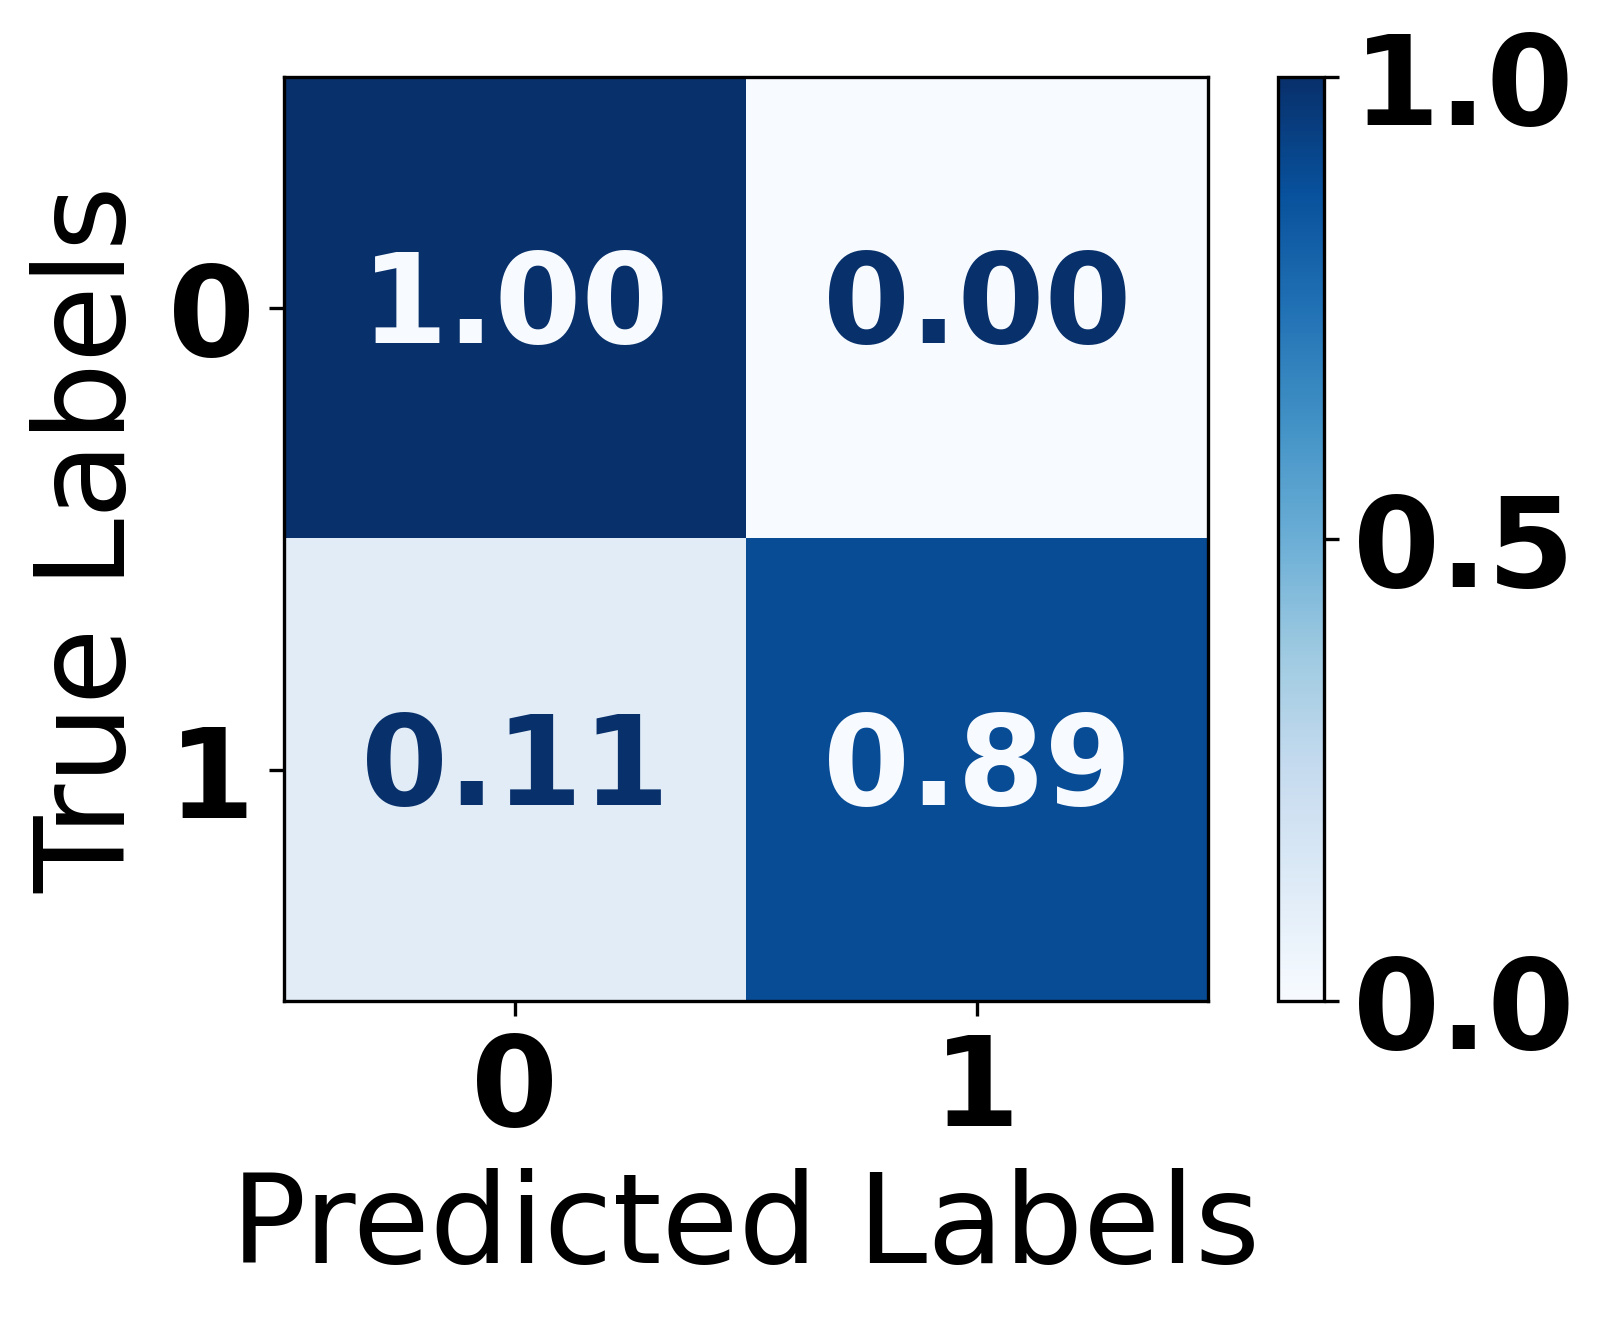

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


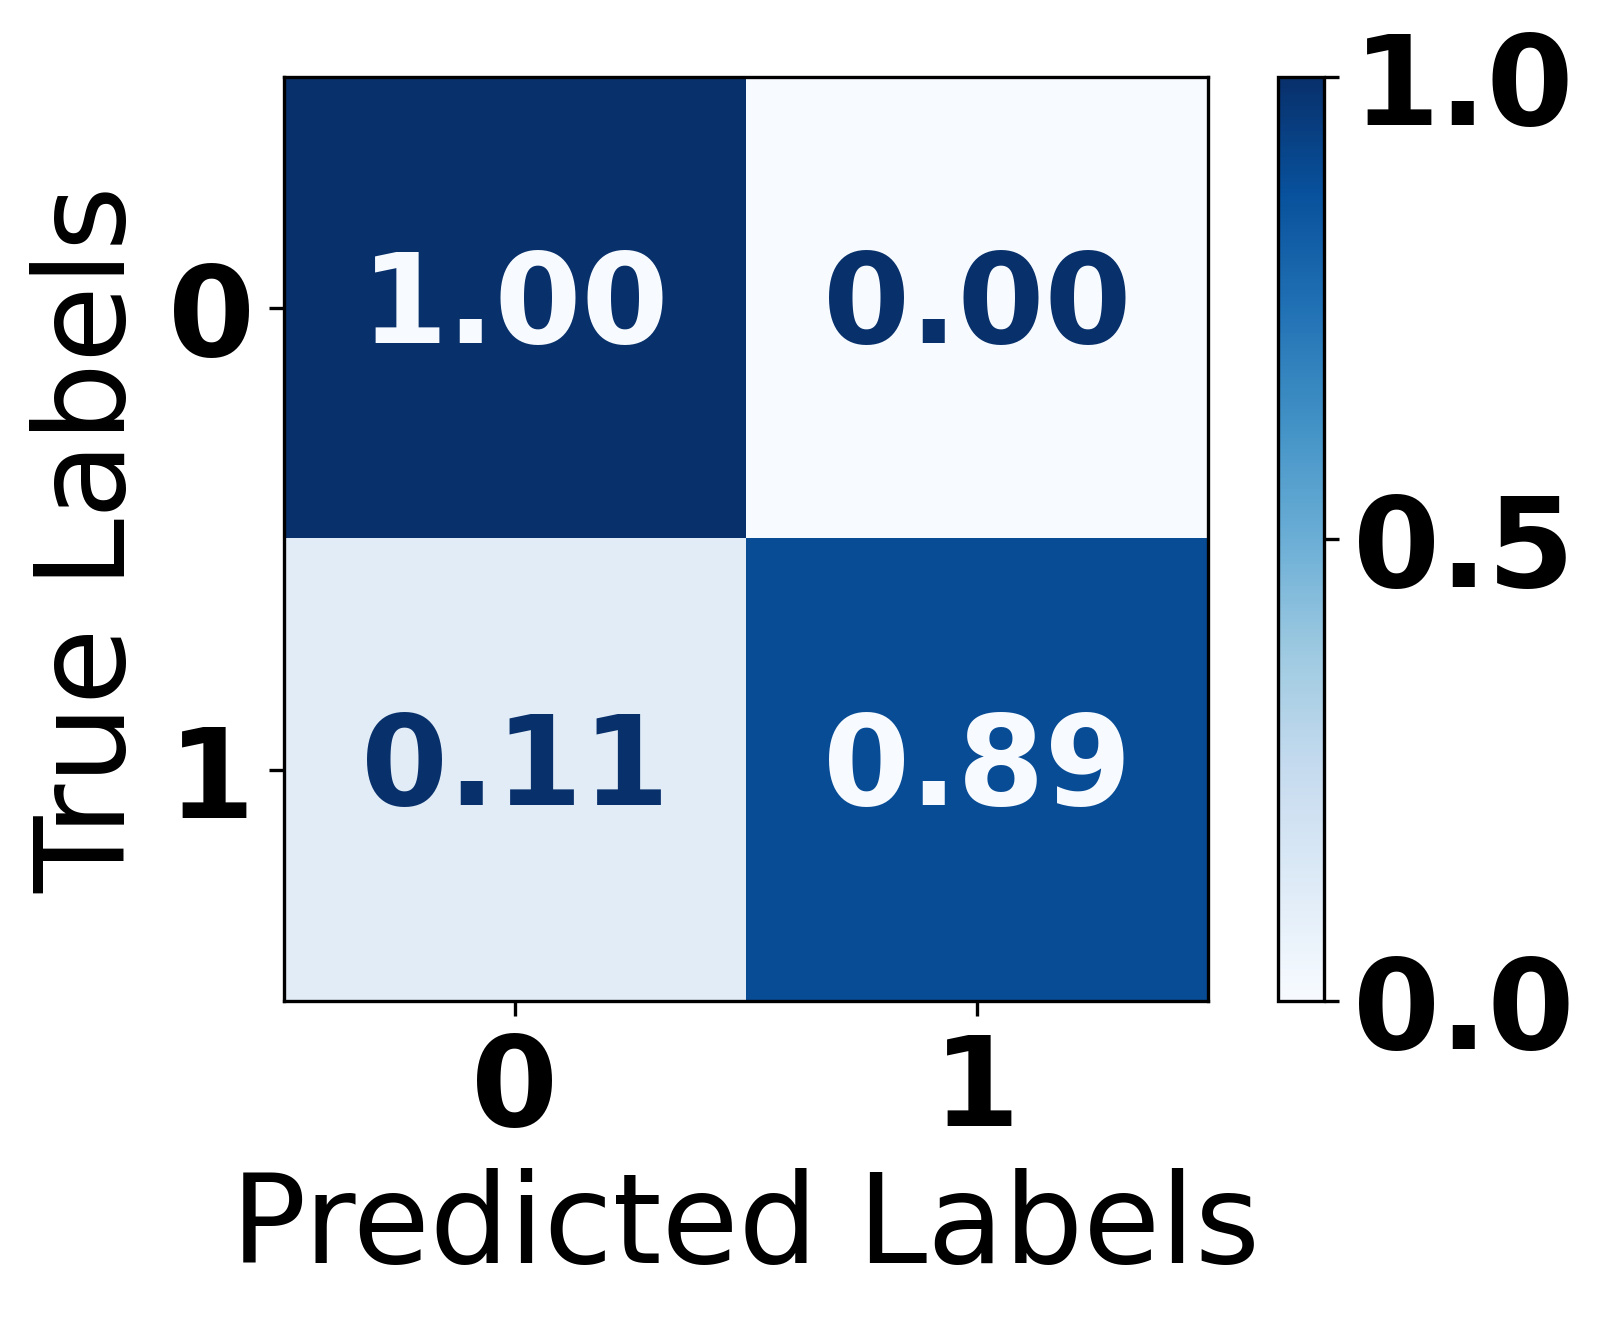

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


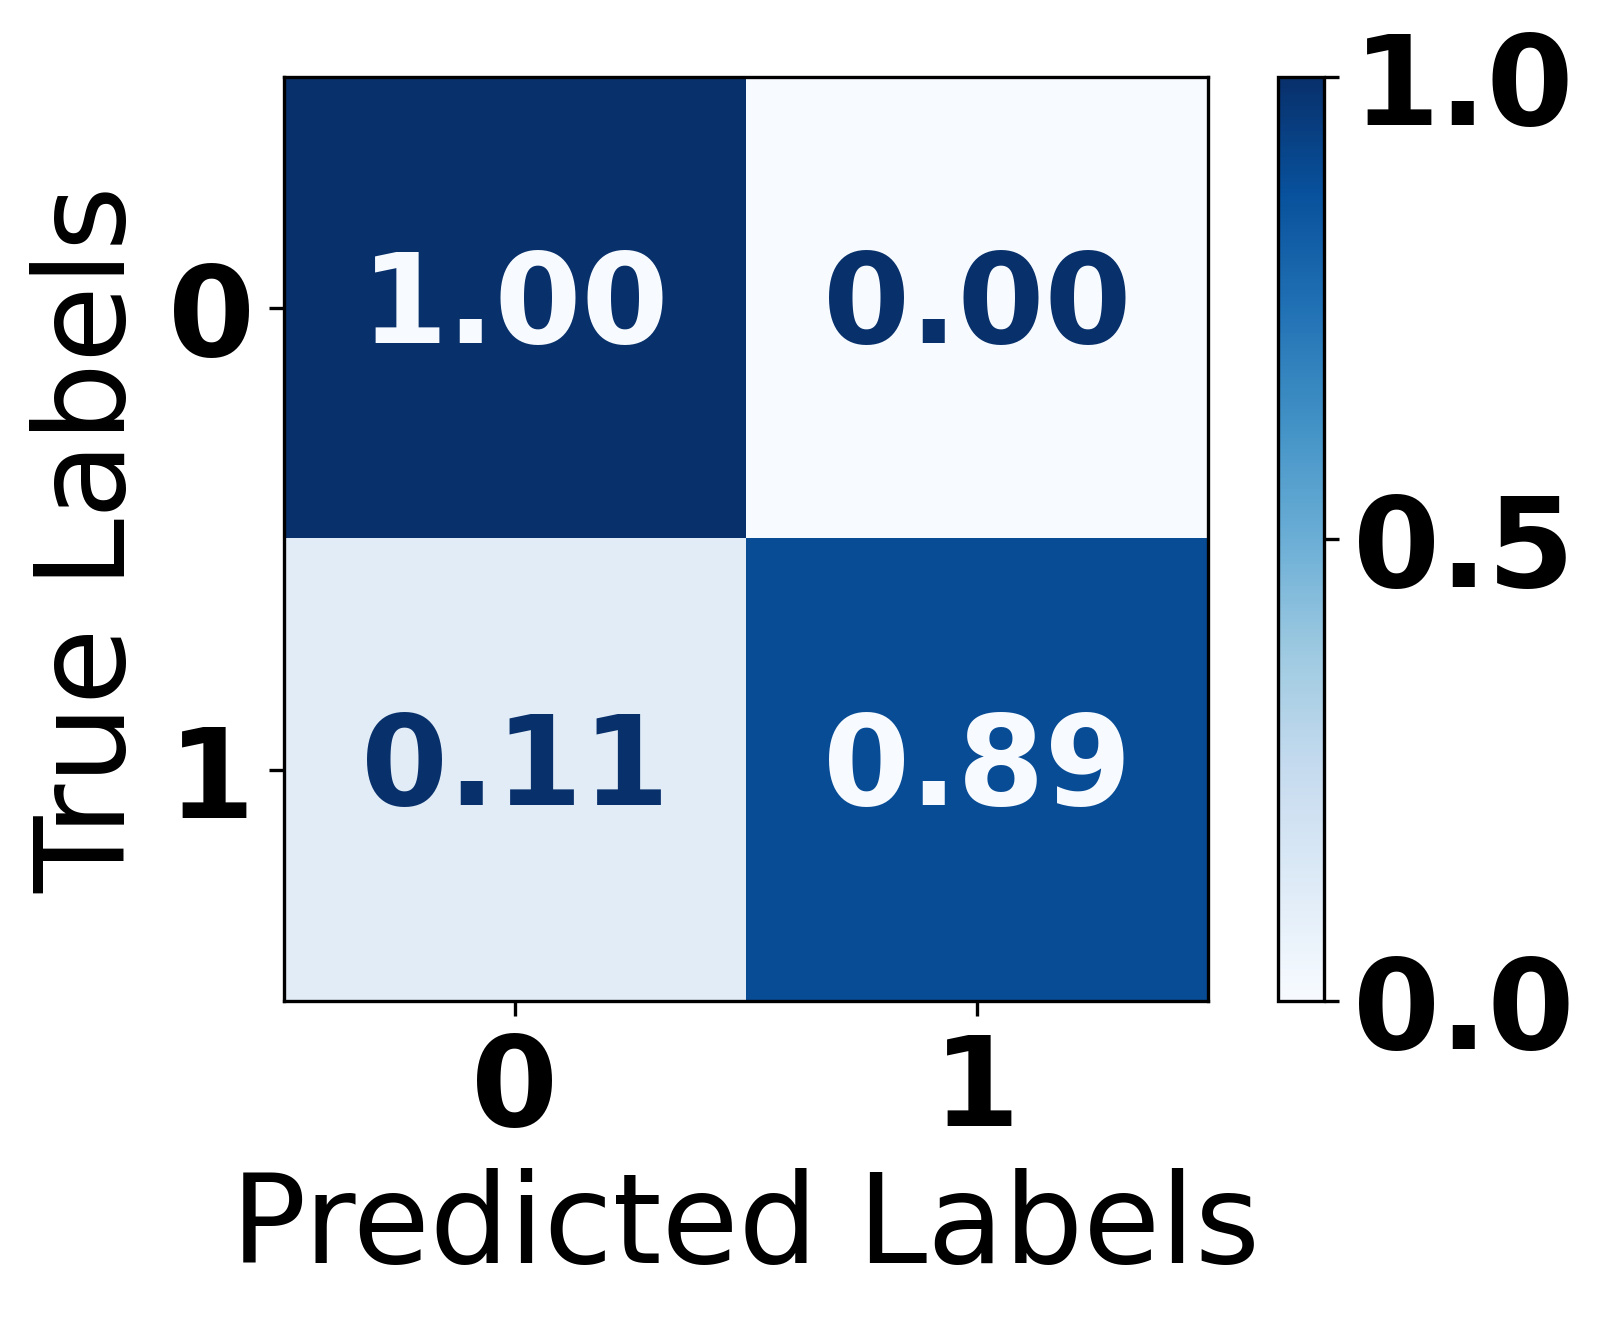

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 0.875
Test Accuracy: 0.96875


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=1,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=2, # Require lots of samples to split
    min_samples_leaf=1,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


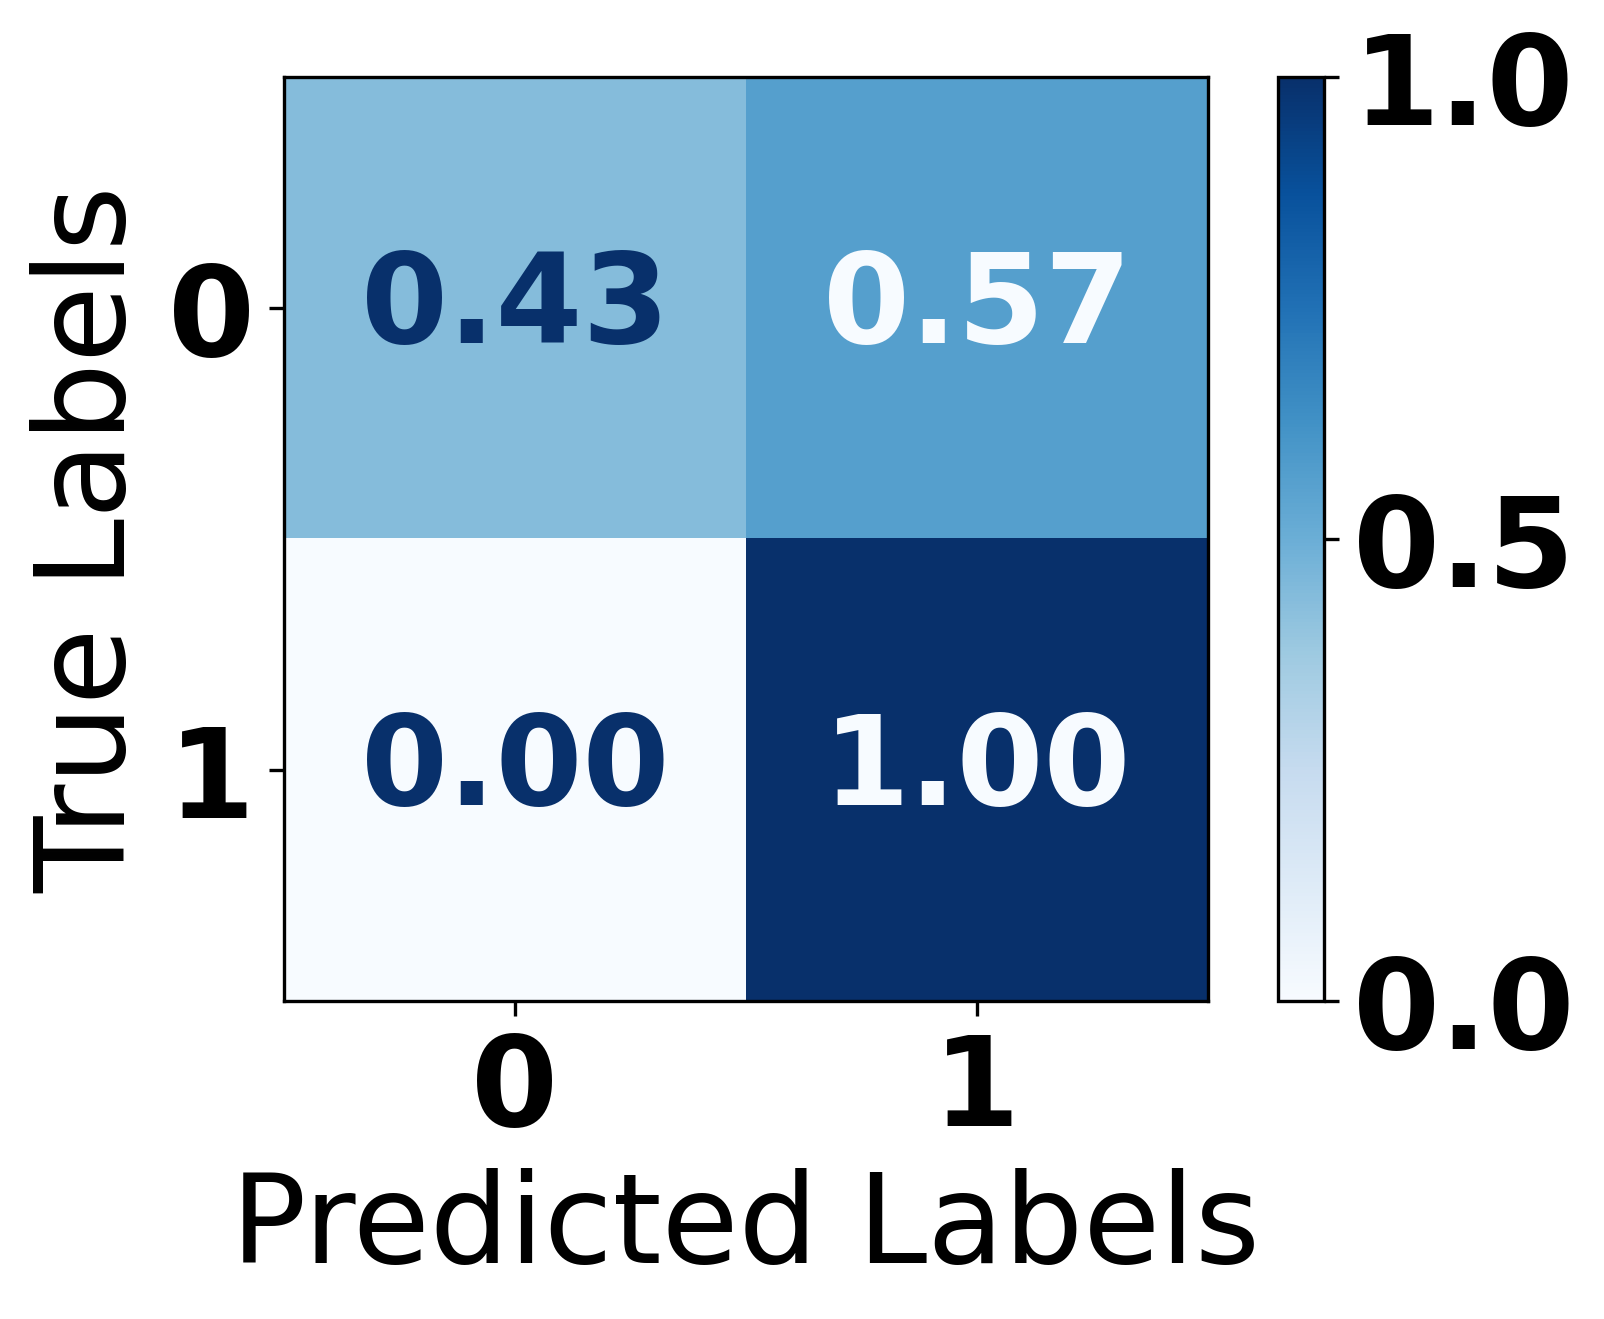

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.61        23
           1       0.41      1.00      0.58         9

    accuracy                           0.59        32
   macro avg       0.70      0.72      0.59        32
weighted avg       0.83      0.59      0.60        32

Train Accuracy: 0.8541666666666666
Test Accuracy: 0.59375


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


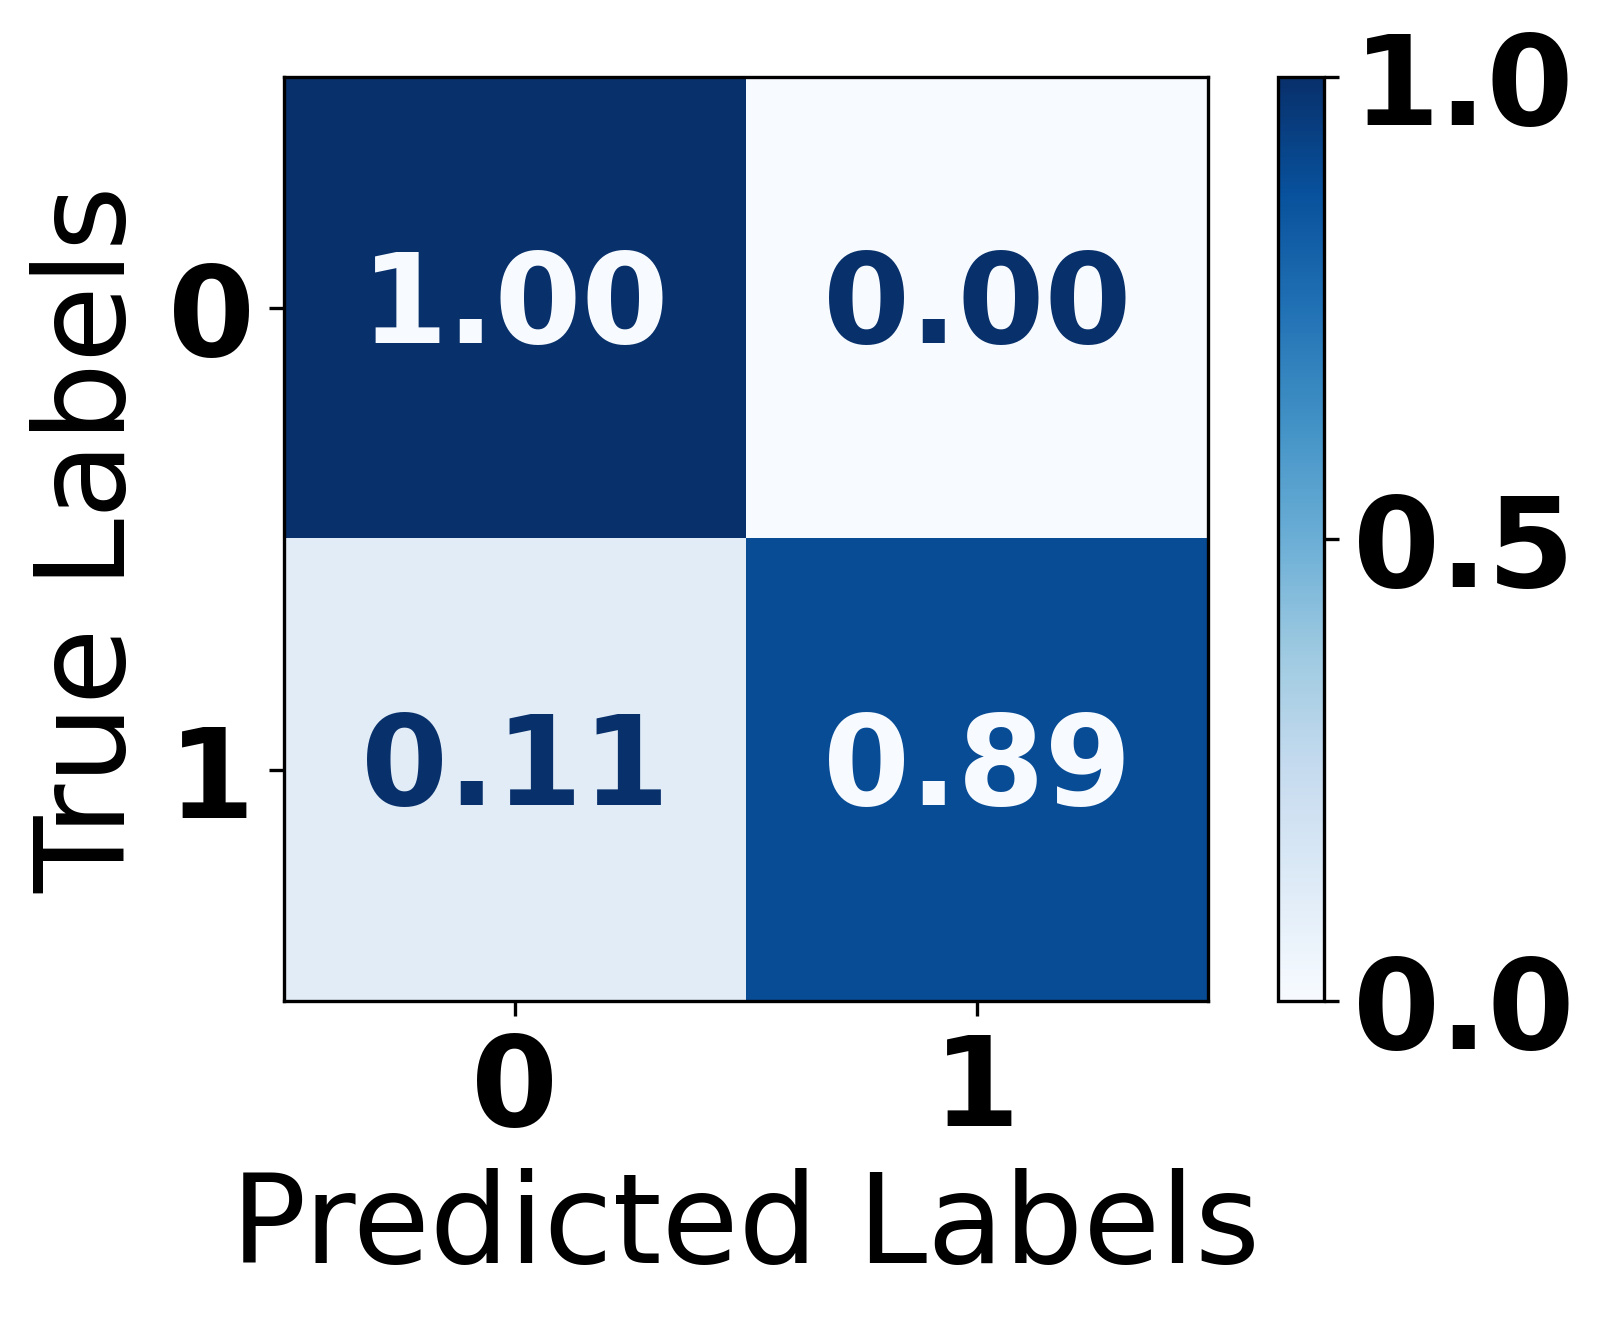

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=2, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.17391304 0.82608696]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.17      0.30        23
     Class 1       0.32      1.00      0.49         9

    accuracy                           0.41        32
   macro avg       0.66      0.59      0.39        32
weighted avg       0.81      0.41      0.35        32



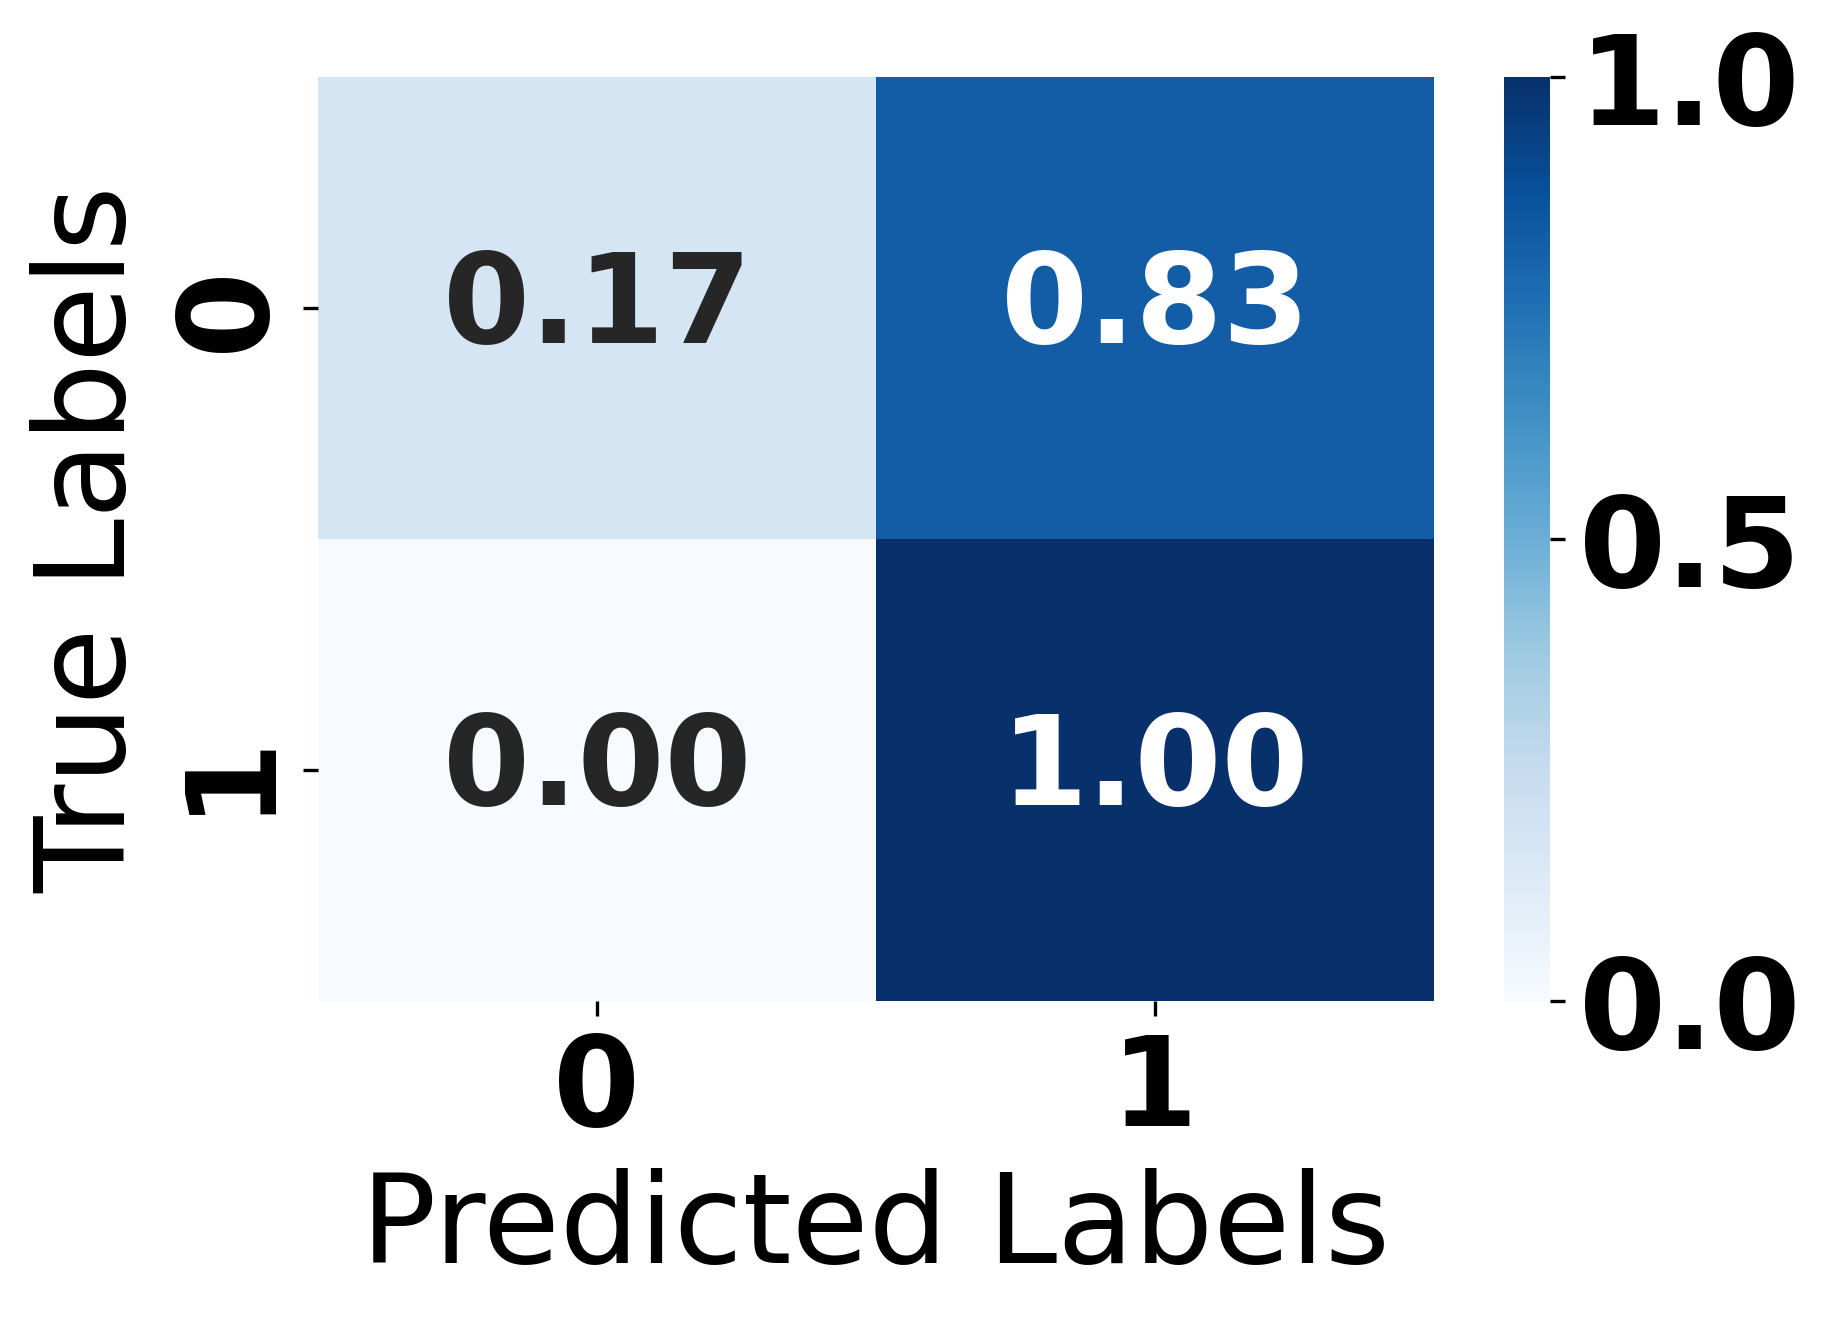

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 678ms/step - accuracy: 0.4567 - loss: 165.3769 - val_accuracy: 0.2812 - val_loss: 476.5110
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7699 - loss: 145.5284 - val_accuracy: 0.2812 - val_loss: 260.5055
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7728 - loss: 59.2344 - val_accuracy: 0.7188 - val_loss: 55.5401
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.3073 - loss: 86.6950 - val_accuracy: 0.2812 - val_loss: 116.9056
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7650 - loss: 45.7157 - val_accuracy: 0.2812 - val_loss: 133.7163
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7533 - loss: 39.6132 - val_accuracy: 0.4375 - val_loss: 1.7032
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5179 - loss: 27.8331 - val_accuracy: 0.2812 - val_loss: 25.7742
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7298 - loss: 16.6164 - val_accuracy: 0.2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      1.00      0.84        23
     Class 1       0.00      0.00      0.00         9

    accuracy                           0.72        32
   macro avg       0.36      0.50      0.42        32
weighted avg       0.52      0.72      0.60        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


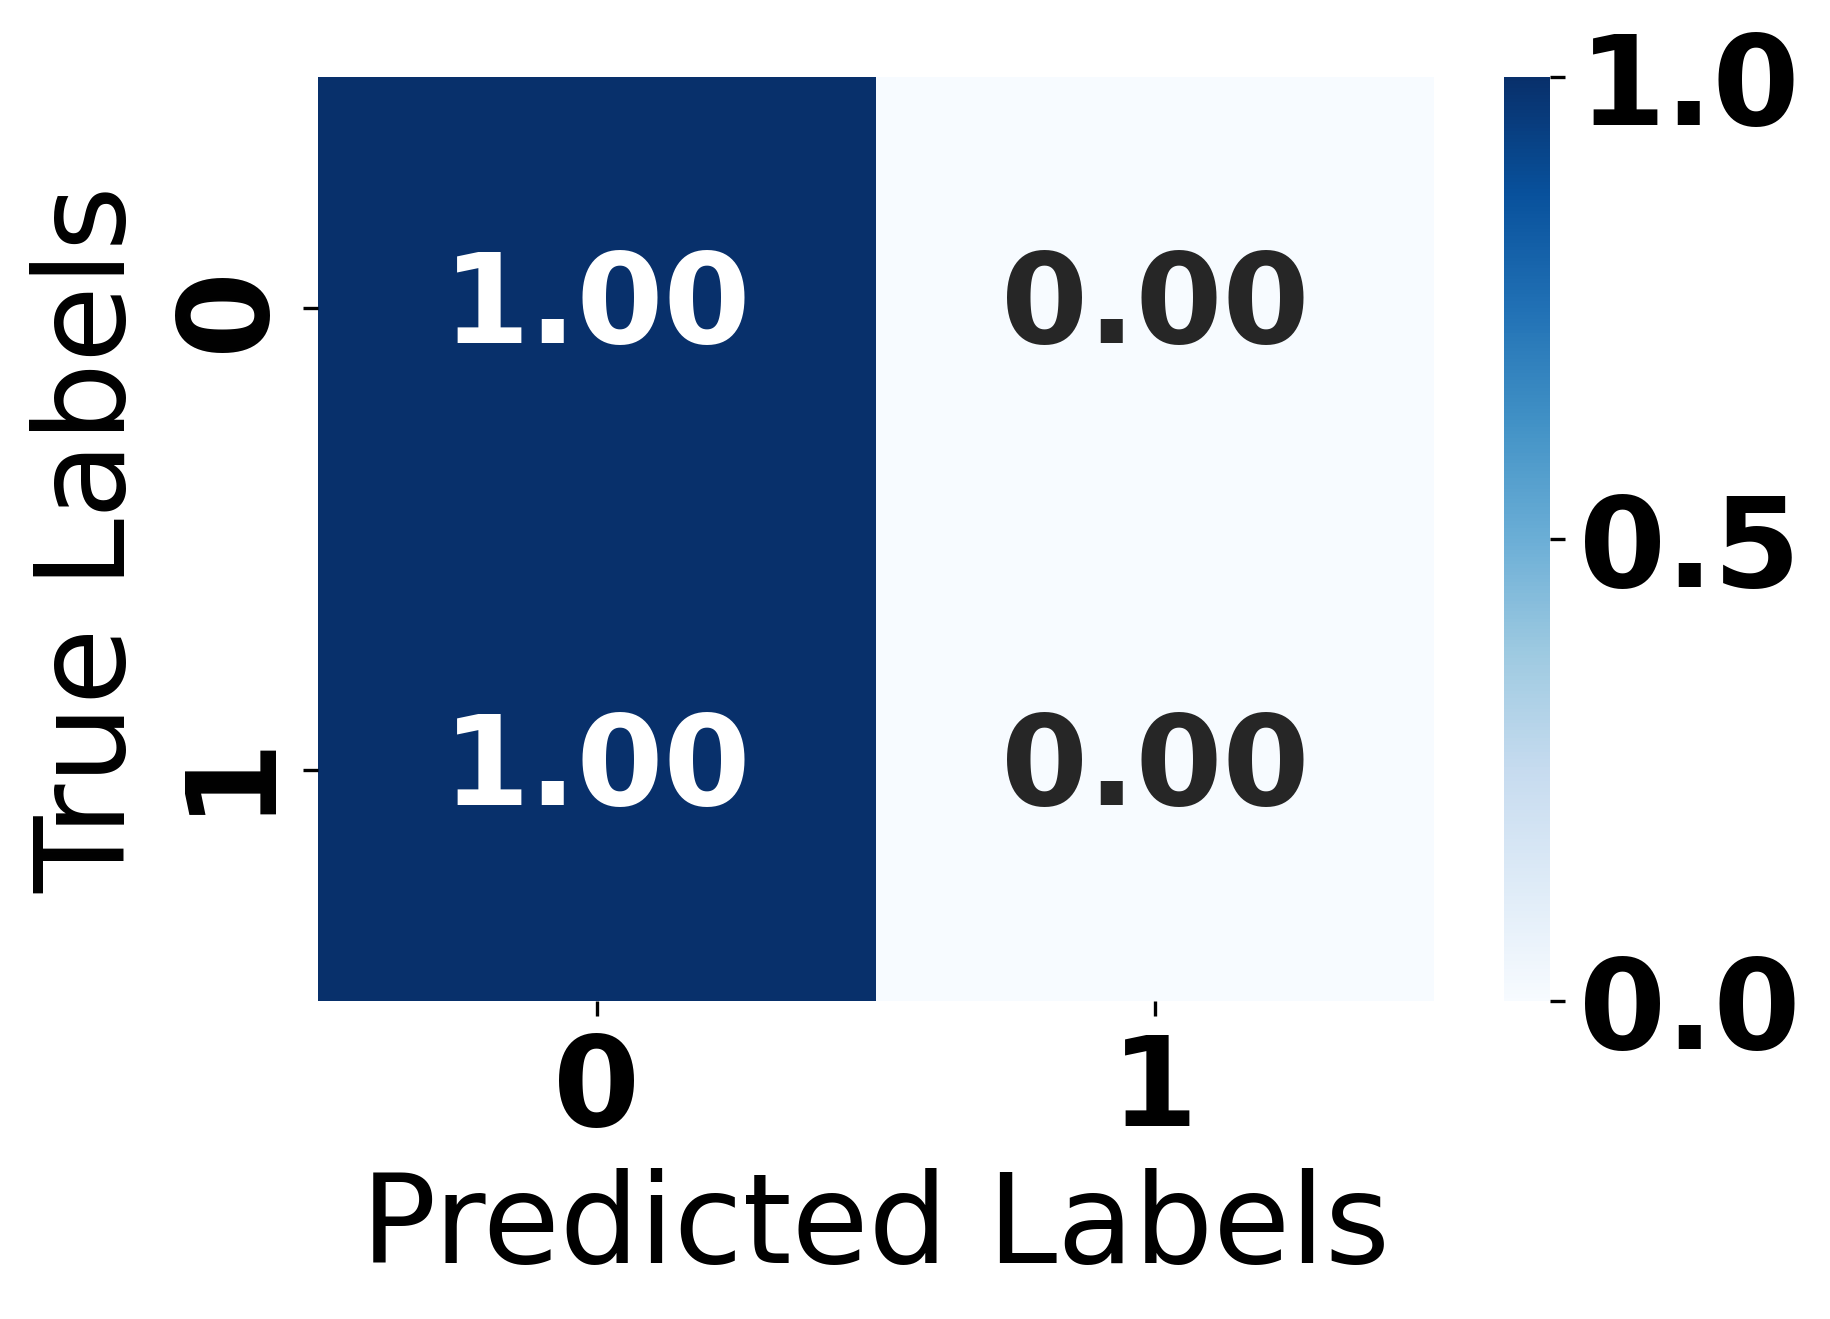

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.5075 - loss: 0.8002 - val_accuracy: 0.2812 - val_loss: 8.4483
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6133 - loss: 0.6889 - val_accuracy: 0.2812 - val_loss: 6.5041
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6227 - loss: 0.6870 - val_accuracy: 0.2812 - val_loss: 3.8551
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6829 - loss: 0.5916 - val_accuracy: 0.2812 - val_loss: 1.7878
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7214 - loss: 0.5576 - val_accuracy: 0.2812 - val_loss: 1.1152
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6999 - loss: 0.5746 - val_accuracy: 0.2812 - val_loss: 0.8763
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7383 - loss: 0.4947 - val_accuracy: 0.2812 - val_loss: 0.9623
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7878 - loss: 0.4532 - val_accuracy: 0.2812 - val_loss: 0.9747

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        23
     Class 1       0.28      1.00      0.44         9

    accuracy                           0.28        32
   macro avg       0.14      0.50      0.22        32
weighted avg       0.08      0.28      0.12        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


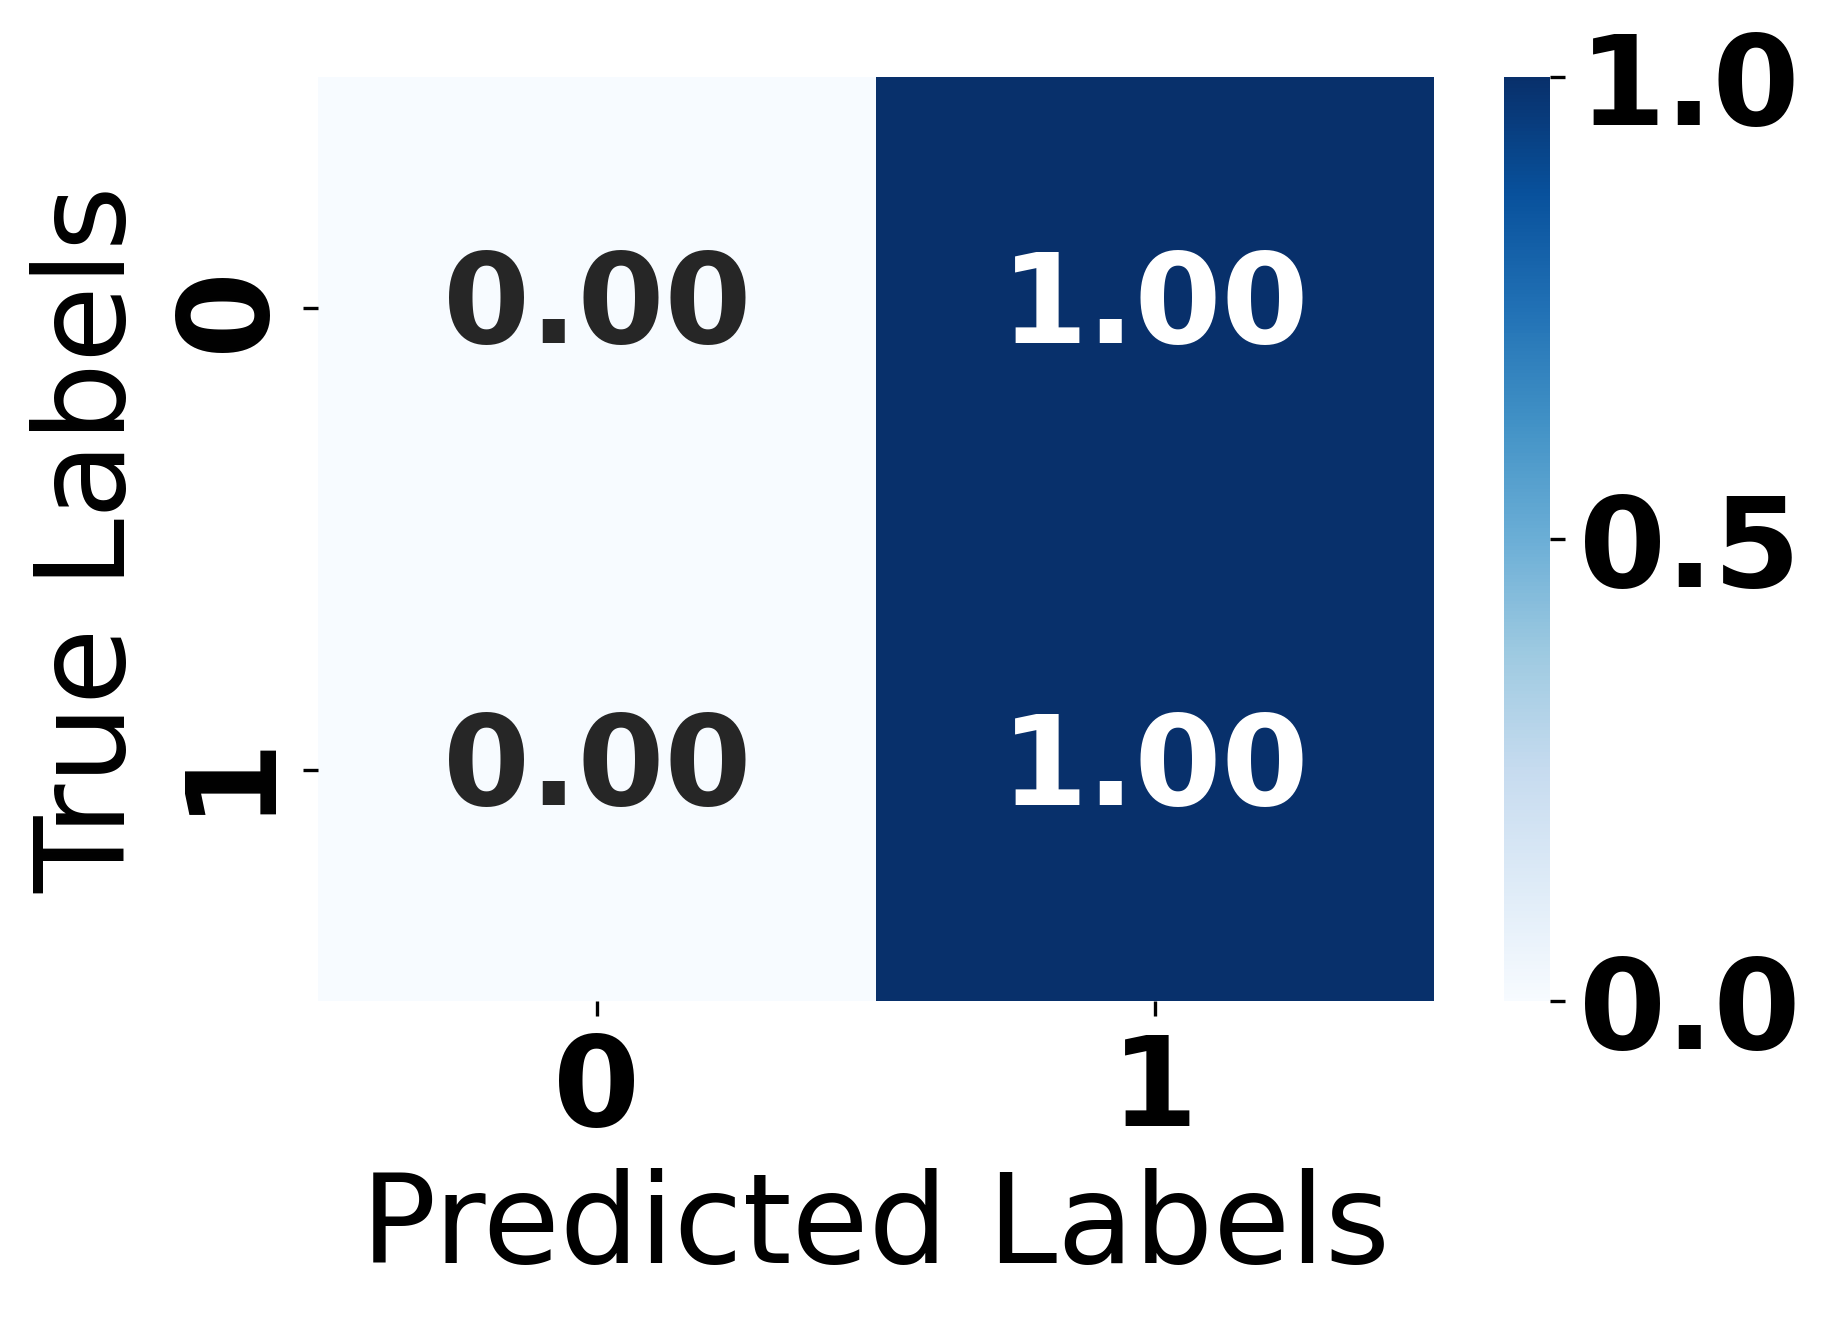

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/ANN.h5')

In [ ]:
import numpy as np
import time
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Automatically determine the vocab size from your data (ensure it's an integer)
vocab_size = int(max(np.max(x_train), np.max(x_test)) + 1)

# Optional: Clip values to enforce a max vocab size
# vocab_size = 20000
# x_train = np.where(x_train >= vocab_size, vocab_size - 1, x_train)
# x_test = np.where(x_test >= vocab_size, vocab_size - 1, x_test)

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Example: (100,)

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer (without deprecated input_length)
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim)(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Model configuration
embed_dim = 128
ff_dim = 128

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
end_time = time.time()
print("Training Time:", end_time - start_time)

# Evaluate the model
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
end_time = time.time()
print("Test Time:", end_time - start_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5551 - loss: 0.6827

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.5661 - loss: 0.6791 - val_accuracy: 0.2812 - val_loss: 0.8289
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7148 - loss: 0.6221 - val_accuracy: 0.2812 - val_loss: 0.8977
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7464 - loss: 0.5778 - val_accuracy: 0.2812 - val_loss: 0.9360
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.7484 - loss: 0.5779 - val_accuracy: 0.2812 - val_loss: 0.9646
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.7640 - loss: 0.5408 - val_accuracy: 0.2812 - val_loss: 0.9780
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7435 - loss: 0.5462 - val_accuracy: 0.2812 - val_loss: 0.9672
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.7643 - loss: 0.5155 - val_accuracy: 0.2812 - val_loss: 0.9480
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7673 - loss: 0.4971 - val_accuracy: 0.2812 - val_loss: 0.9174
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
Normalized Confusion Matrix:
[[0.69565217 0.30434783]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.70      0.82        23
     Class 1       0.56      1.00      0.72         9

    accuracy                           0.78        32
   macro avg       0.78      0.85      0.77        32
weighted avg       0.88      0.78      0.79        32



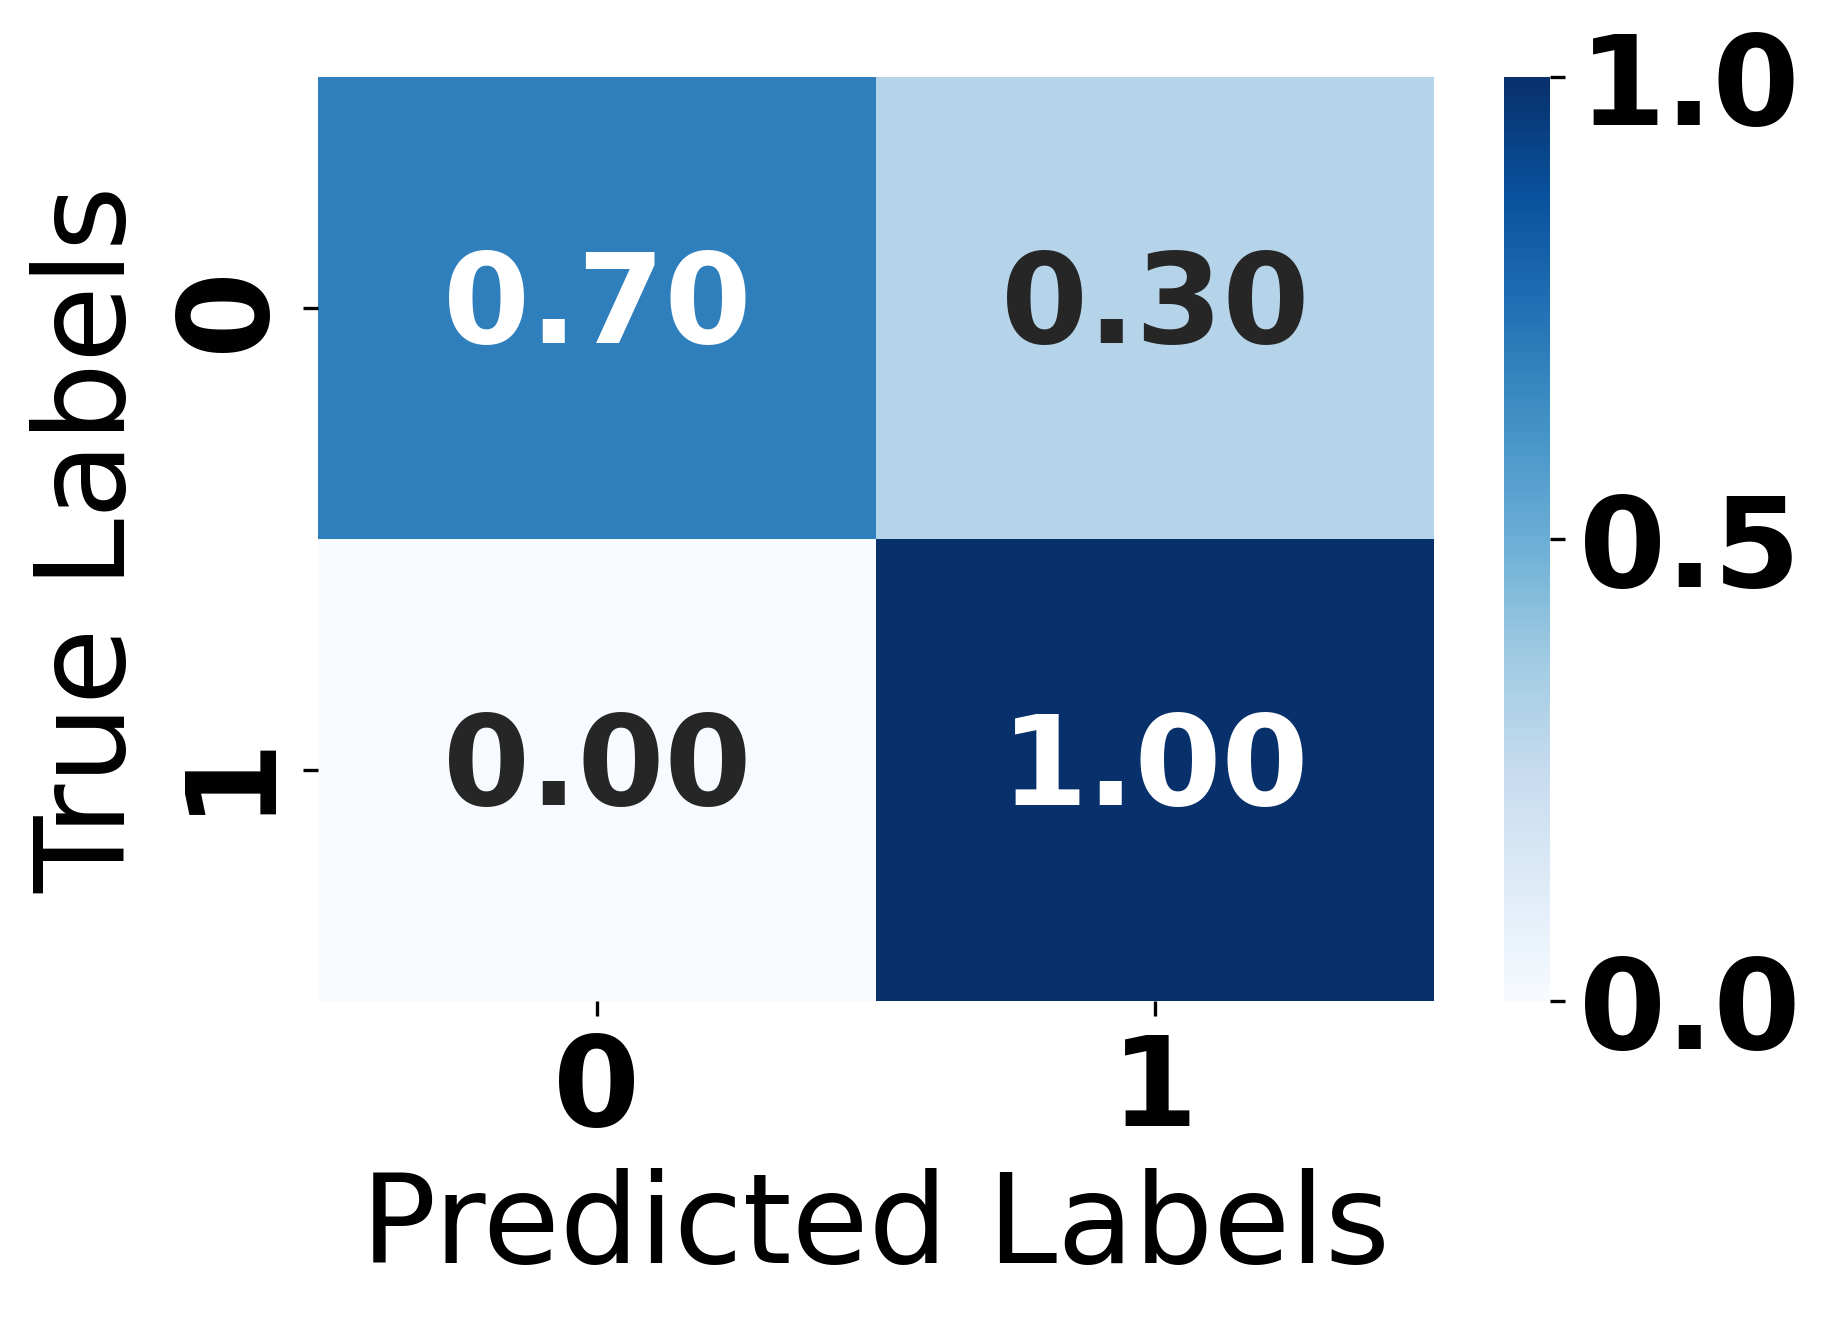

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/transformer_model.h5')

### GPT

In [ ]:
pip install --upgrade transformers

In [ ]:
import transformers
print(transformers.__version__)

4.51.3


In [ ]:
pip install transformers datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is 

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sbakter48 (sbakter48-northern-university-bangladesh) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


TrainOutput(global_step=96, training_loss=0.3285095391371821, metrics={'train_runtime': 698.2864, 'train_samples_per_second': 0.55, 'train_steps_per_second': 0.137, 'total_flos': 0.0, 'train_loss': 0.3285095391371821, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.1304    0.2308        23
           1     0.3103    1.0000    0.4737         9

    accuracy                         0.3750        32
   macro avg     0.6552    0.5652    0.3522        32
weighted avg     0.8060    0.3750    0.2991        32

Confusion Matrix:
 [[ 3 20]
 [ 0  9]]


### CTGAN for Synthetic Data Generation

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664

In [ ]:
!pip install sdv --upgrade

In [ ]:
!pip install sdv==0.16.0

ERROR: Ignored the following yanked versions: 1.13.0
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6,<3.9; 0.10.0.dev0 Requires-Python >=3.6,<3.9; 0.10.1 Requires-Python >=3.6,<3.9; 0.10.1.dev0 Requires-Python >=3.6,<3.9; 0.11.0 Requires-Python >=3.6,<3.9; 0.11.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0 Requires-Python >=3.6,<3.9; 0.12.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0.dev1 Requires-Python >=3.6,<3.9; 0.12.1 Requires-Python >=3.6,<3.9; 0.12.1.dev0 Requires-Python >=3.6,<3.9; 0.13.0 Requires-Python >=3.6,<3.10; 0.13.0.dev0 Requires-Python >=3.6,<3.10; 0.13.1 Requires-Python >=3.6,<3.10; 0.13.1.dev0 Requires-Python >=3.6,<3.10; 0.14.0 Requires-Python >=3.6,<3.10; 0.14.0.dev0 Requires-Python >=3.6,<3.10; 0.14.0.dev1 Requires-Python >=3.6,<3.10; 0.14.0.dev2 Requires-Python >=3.6,<3.10; 0.14.1 Requires-Python >=3.6,<3.10; 0.14.1.dev0 Requires-Python >=3.6,<3.10; 0.15.0 Requires-Python >=3.6,<3.10; 0.15.0.dev0 Requires-Python

In [ ]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 608.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
from ctgan import CTGAN
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices (BEFORE adding 'target')
categorical_features = [3, 4, 5, 6, 7, 8, 9, 19, 20, 21, 22, 23, 24]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Fix: Make sure all indices are within x_train's column range
valid_cat_indices = [i for i in categorical_features if i < x_train.shape[1]]

# Add target to the DataFrame
x_train['target'] = y_train

# Print original distribution
print("Before CTGAN:", Counter(y_train))

# Separate minority class (1)
minority_df = x_train[x_train['target'] == 1]

# Estimate how many synthetic samples you want
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get categorical column names from valid indices
categorical_columns = x_train.columns[valid_cat_indices].tolist() + ['target']

# Fit CTGAN on minority class
ctgan = CTGAN(epochs=300)
ctgan.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic samples
synthetic_minority = ctgan.sample(samples_to_generate)

# Ensure only class 1 is included
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and target
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final distribution
print("After CTGAN:", Counter(y_resampled_df))

Before CTGAN: Counter({np.int64(0): 92, np.int64(1): 34})
After CTGAN: Counter({1: 292, 0: 92})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
55.000000    7
48.000000    6
60.000000    6
59.000000    5
47.000000    4
            ..
50.572365    1
75.125441    1
87.911166    1
52.707636    1
71.948659    1
Name: count, Length: 312, dtype: int64

Counts for bp:
bp
80.000000     46
60.000000     35
70.000000     31
90.000000      8
100.000000     5
              ..
69.698564      1
85.818152      1
83.561883      1
68.345095      1
106.808922     1
Name: count, Length: 264, dtype: int64

Counts for sg:
sg
1.025000    49
1.020000    48
1.010000    20
1.015000     8
1.004518     1
            ..
1.005481     1
1.008912     1
1.009261     1
1.009071     1
1.004600     1
Name: count, Length: 263, dtype: int64

Counts for al:
al
3.0    106
4.0     94
0.0     92
2.0     69
1.0     23
Name: count, dtype: int64

Counts for su:
su
0.0    230
1.0     57
2.0     55
3.0     21
5.0     15
4.0      6
Name: count, dtype: int64

Counts for rbc:
rbc
1    260
0    124
Name: count, dtype: int64

Counts for pc:
pc
0    214
1   

In [ ]:
x_resampled_df.head()

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo   pcv  \
0  48.0  80.0  1.025  0.0  0.0    1   1    0   0   75.0  ...  16.8  51.0   
1  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...  15.7  47.0   
2  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...  14.2  51.0   
3  64.0  70.0  1.020  0.0  0.0    1   1    0   0   97.0  ...  13.8  49.0   
4  40.0  70.0  1.015  3.0  4.0    1   1    0   0  253.0  ...  10.9  31.0   

     wbcc  rbcc  htn  dm  cad  appet  pe  ane  
0  6000.0   6.5    0   0    0      1   0    0  
1  6700.0   4.9    0   0    0      1   0    0  
2  7200.0   5.9    0   0    0      1   0    0  
3  6400.0   4.8    0   0    0      1   0    0  
4  8800.0   3.4    1   1    0      0   1    0  

[5 rows x 24 columns]

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
55.000000    7
48.000000    6
60.000000    6
59.000000    5
47.000000    4
            ..
50.572365    1
75.125441    1
87.911166    1
52.707636    1
71.948659    1
Name: count, Length: 312, dtype: int64

Counts for bp:
bp
80.000000     46
60.000000     35
70.000000     31
90.000000      8
100.000000     5
              ..
69.698564      1
85.818152      1
83.561883      1
68.345095      1
106.808922     1
Name: count, Length: 264, dtype: int64

Counts for sg:
sg
1.025000    49
1.020000    48
1.010000    20
1.015000     8
1.004518     1
            ..
1.005481     1
1.008912     1
1.009261     1
1.009071     1
1.004600     1
Name: count, Length: 263, dtype: int64

Counts for al:
al
3.0    106
4.0     94
0.0     92
2.0     69
1.0     23
Name: count, dtype: int64

Counts for su:
su
0.0    230
1.0     57
2.0     55
3.0     21
5.0     15
4.0      6
Name: count, dtype: int64

Counts for rbc:
rbc
1    260
0    124
Name: count, dtype: int64

Counts for pc:
pc
0    214
1   

### Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
x_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/x_test")
y_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/y_test")

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

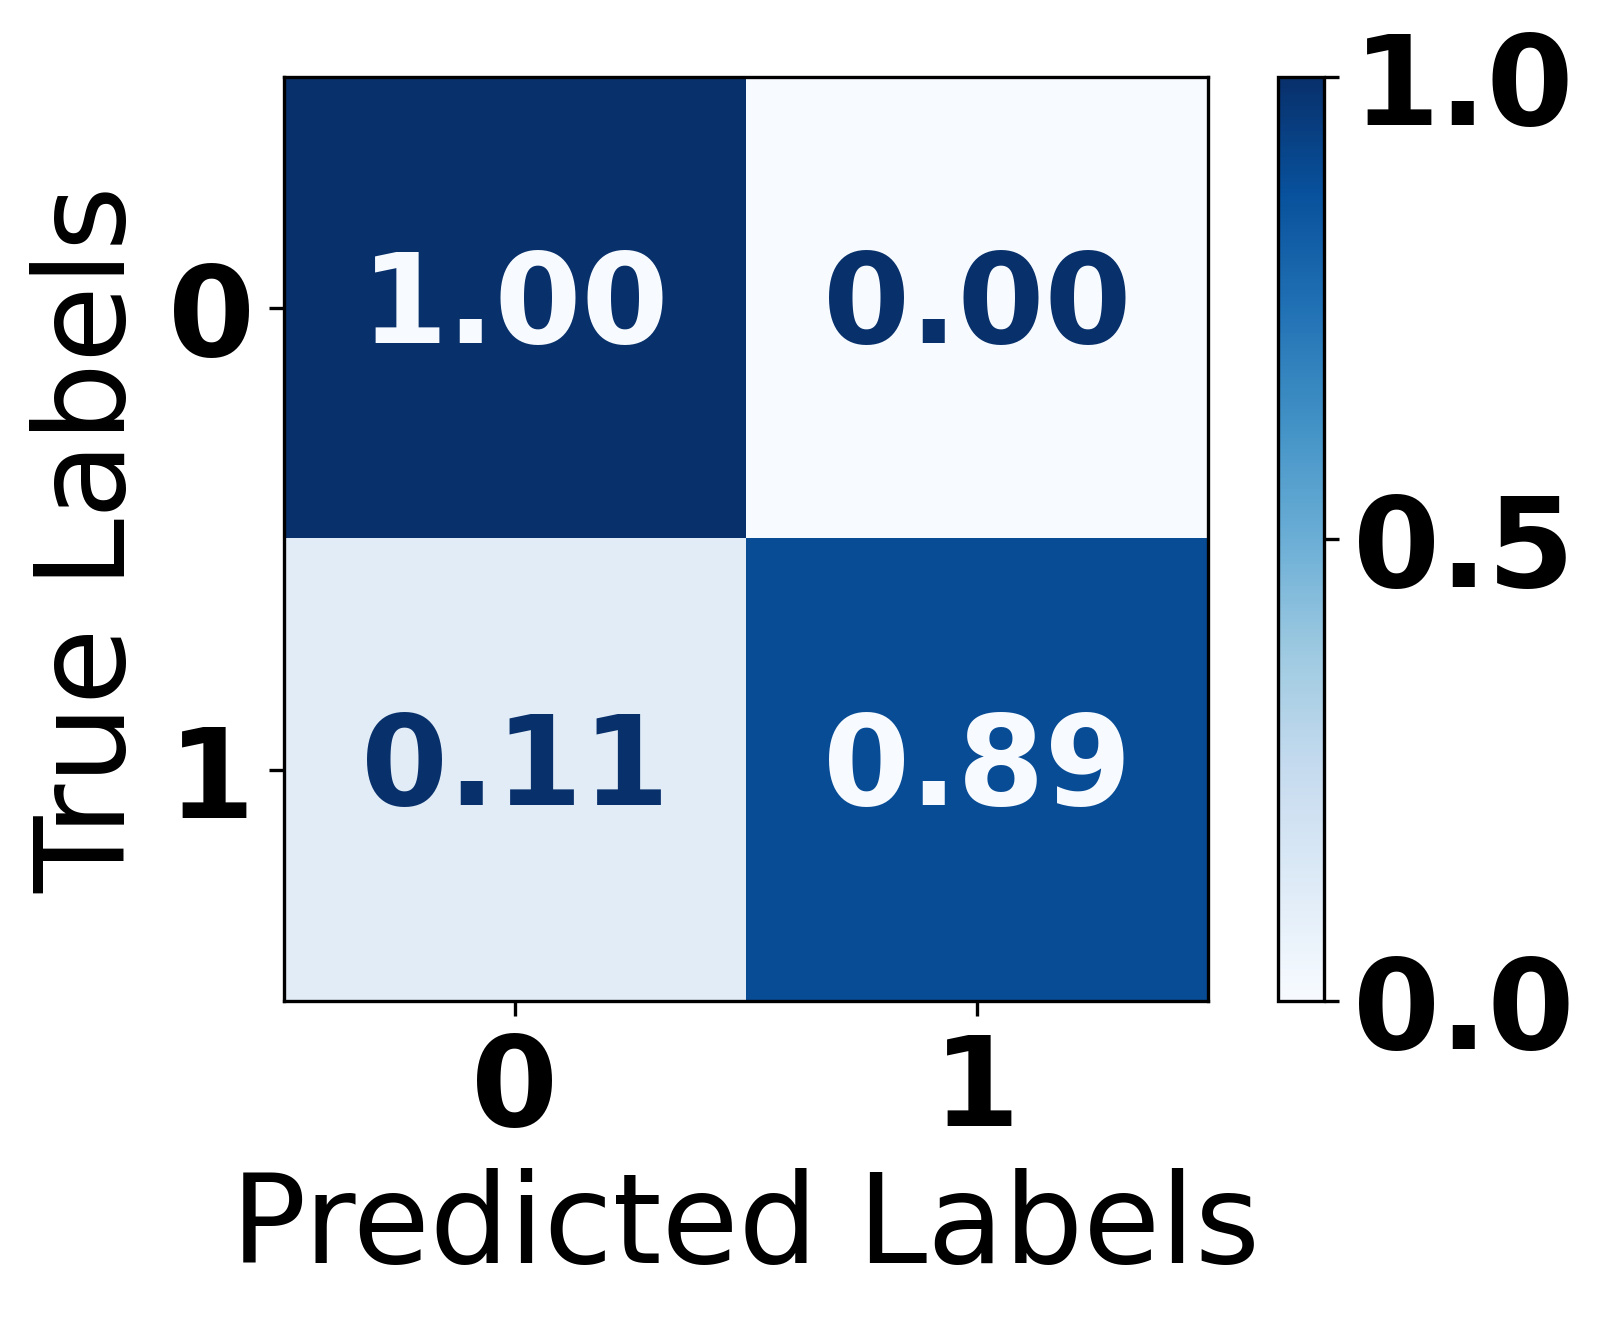

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


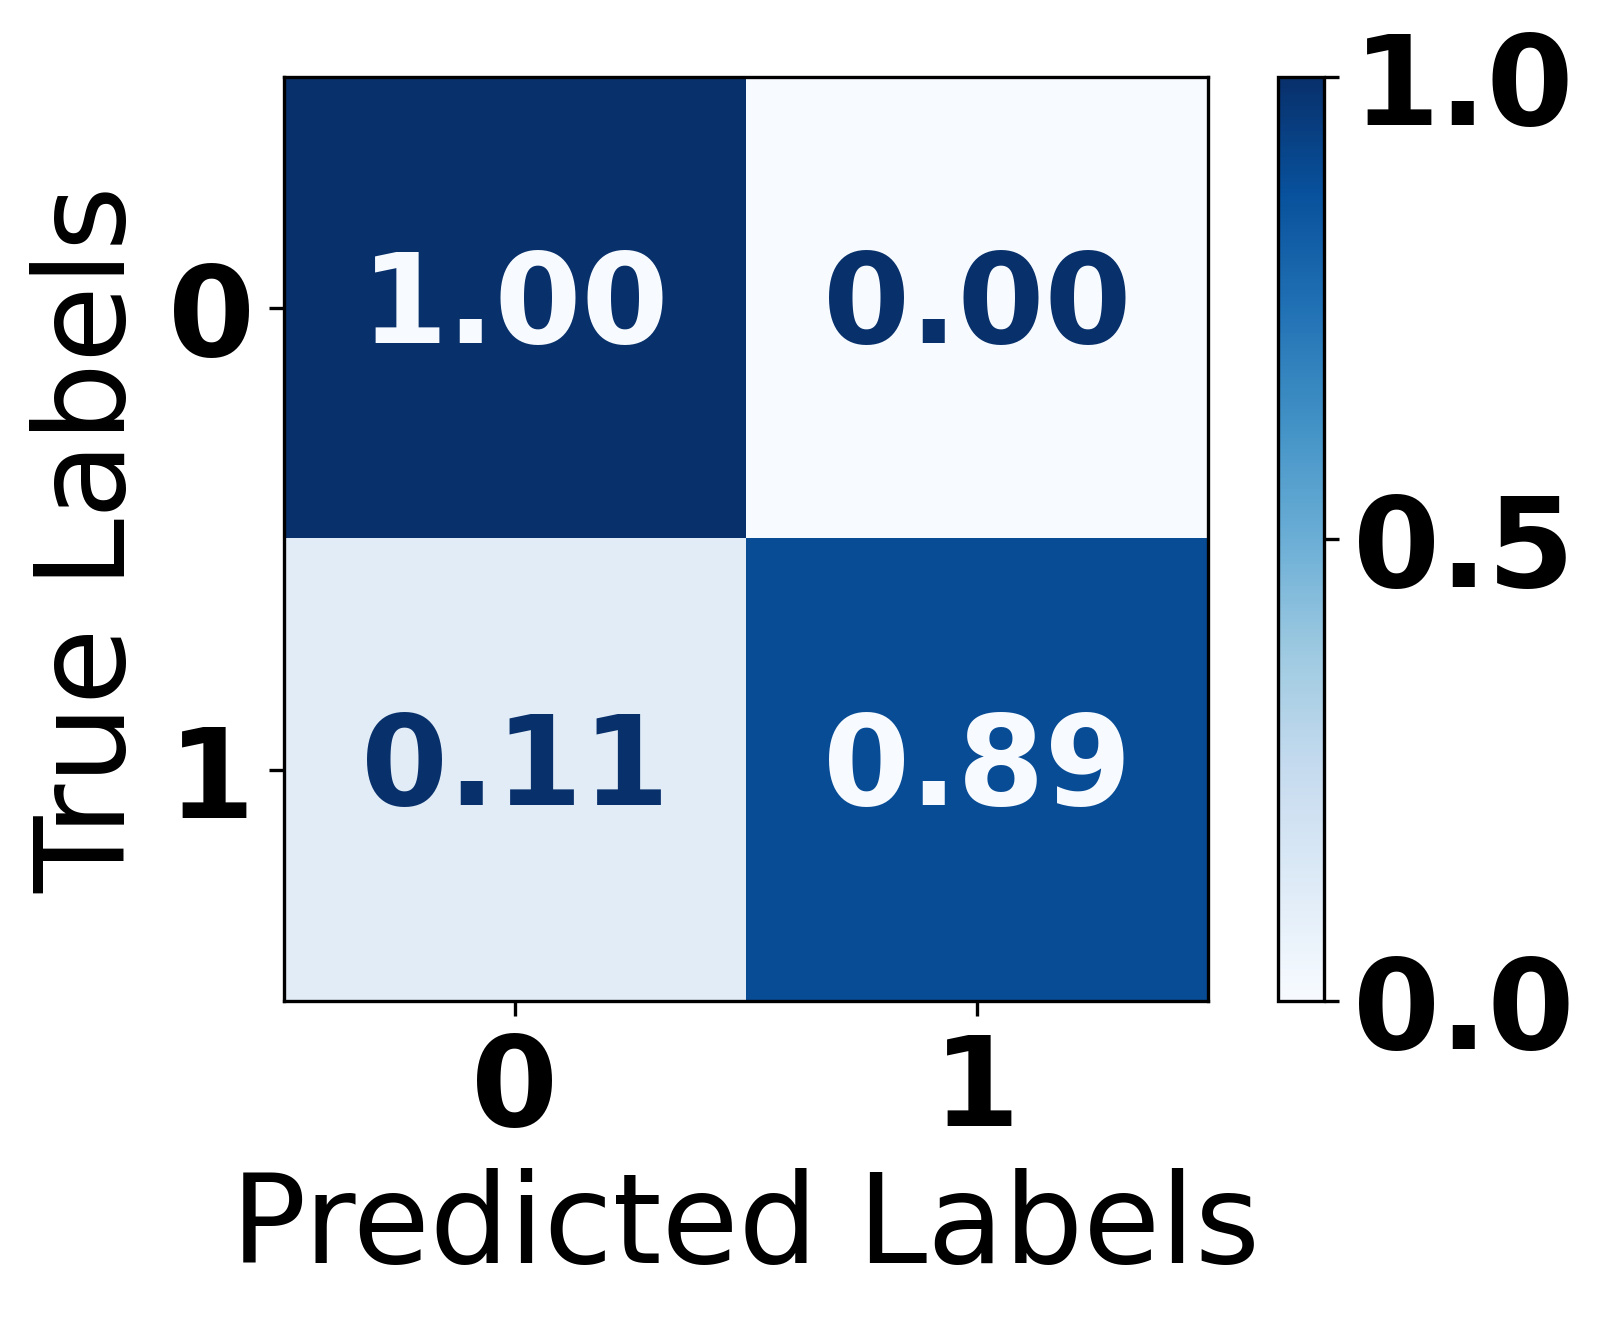

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


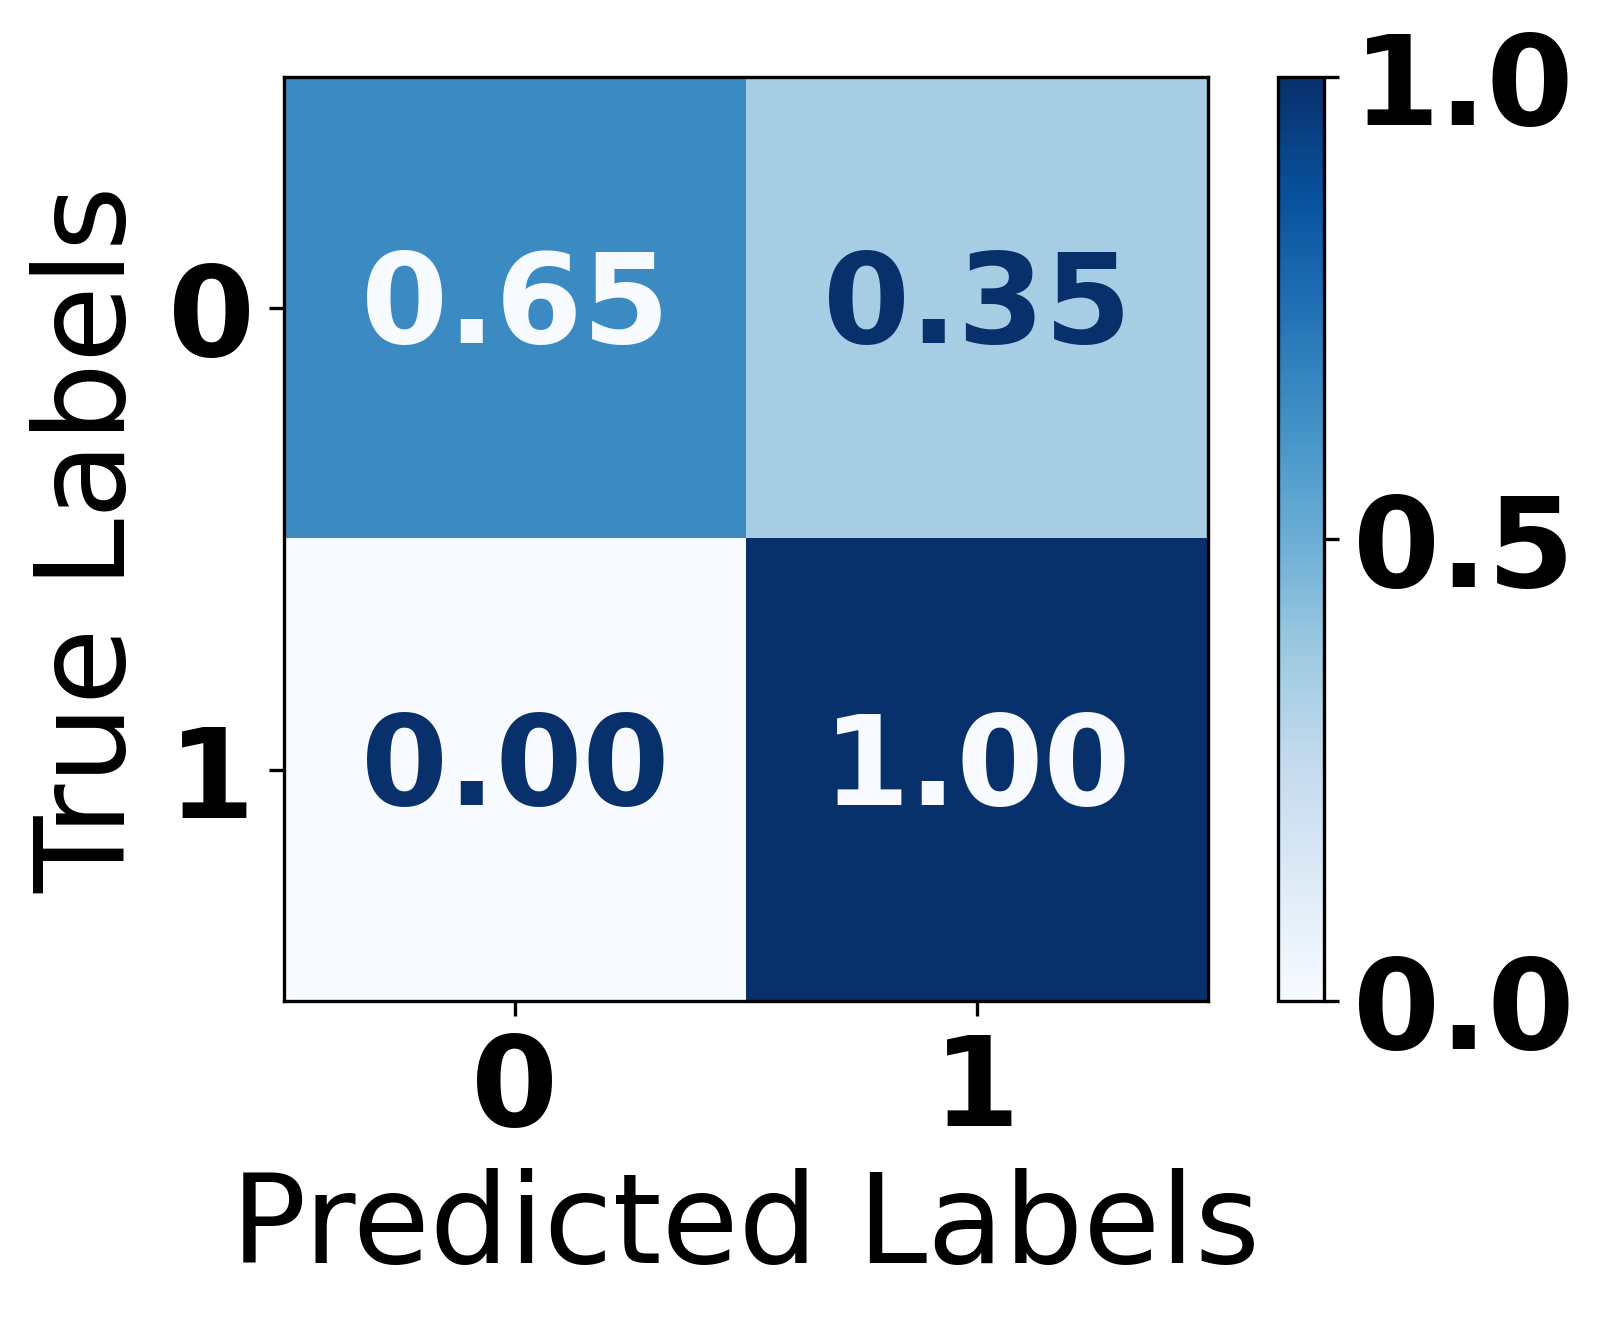

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        23
           1       0.53      1.00      0.69         9

    accuracy                           0.75        32
   macro avg       0.76      0.83      0.74        32
weighted avg       0.87      0.75      0.76        32

Train Accuracy: 0.8671875
Test Accuracy: 0.75


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=1,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=2, # Require lots of samples to split
    min_samples_leaf=1,  # Each leaf must have many samples
    random_state=25
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


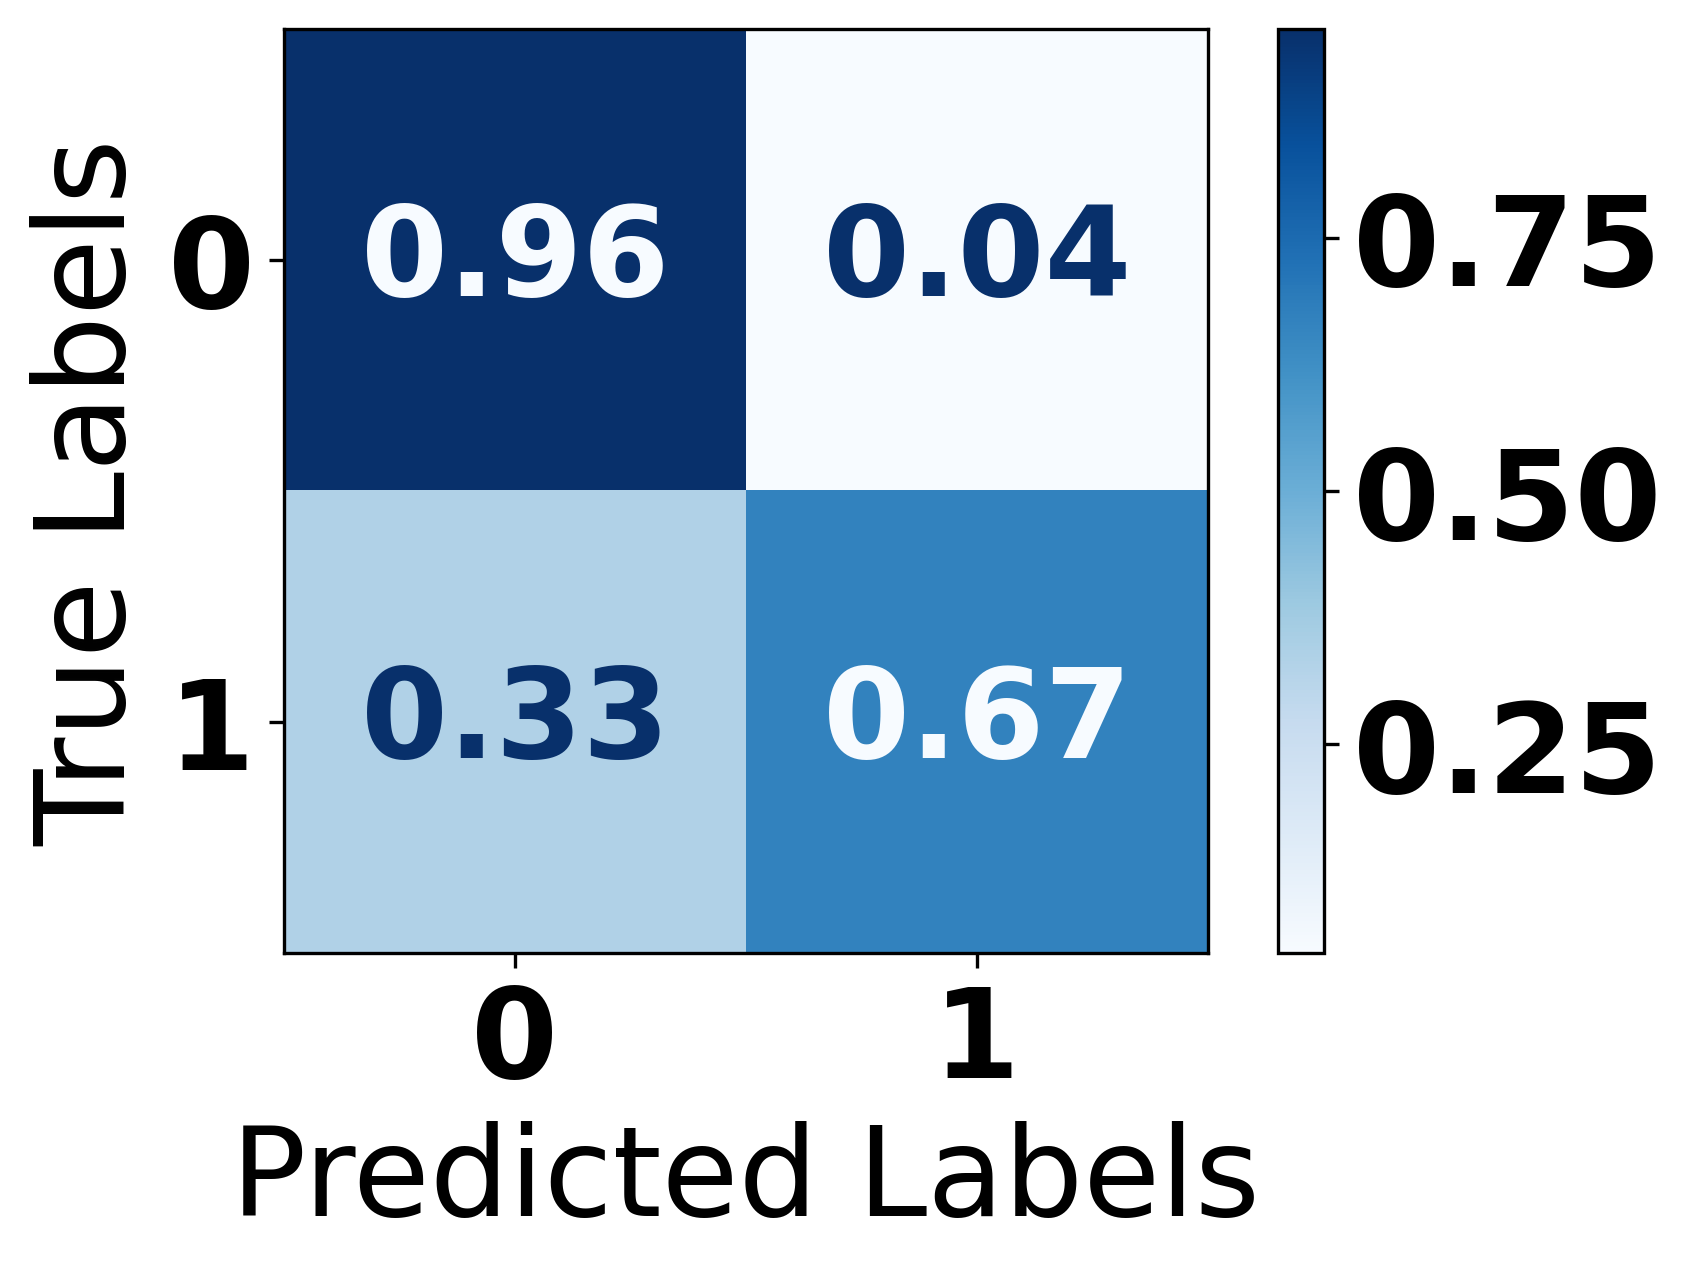

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.86      0.67      0.75         9

    accuracy                           0.88        32
   macro avg       0.87      0.81      0.83        32
weighted avg       0.87      0.88      0.87        32

Train Accuracy: 0.9088541666666666
Test Accuracy: 0.875


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.0004)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


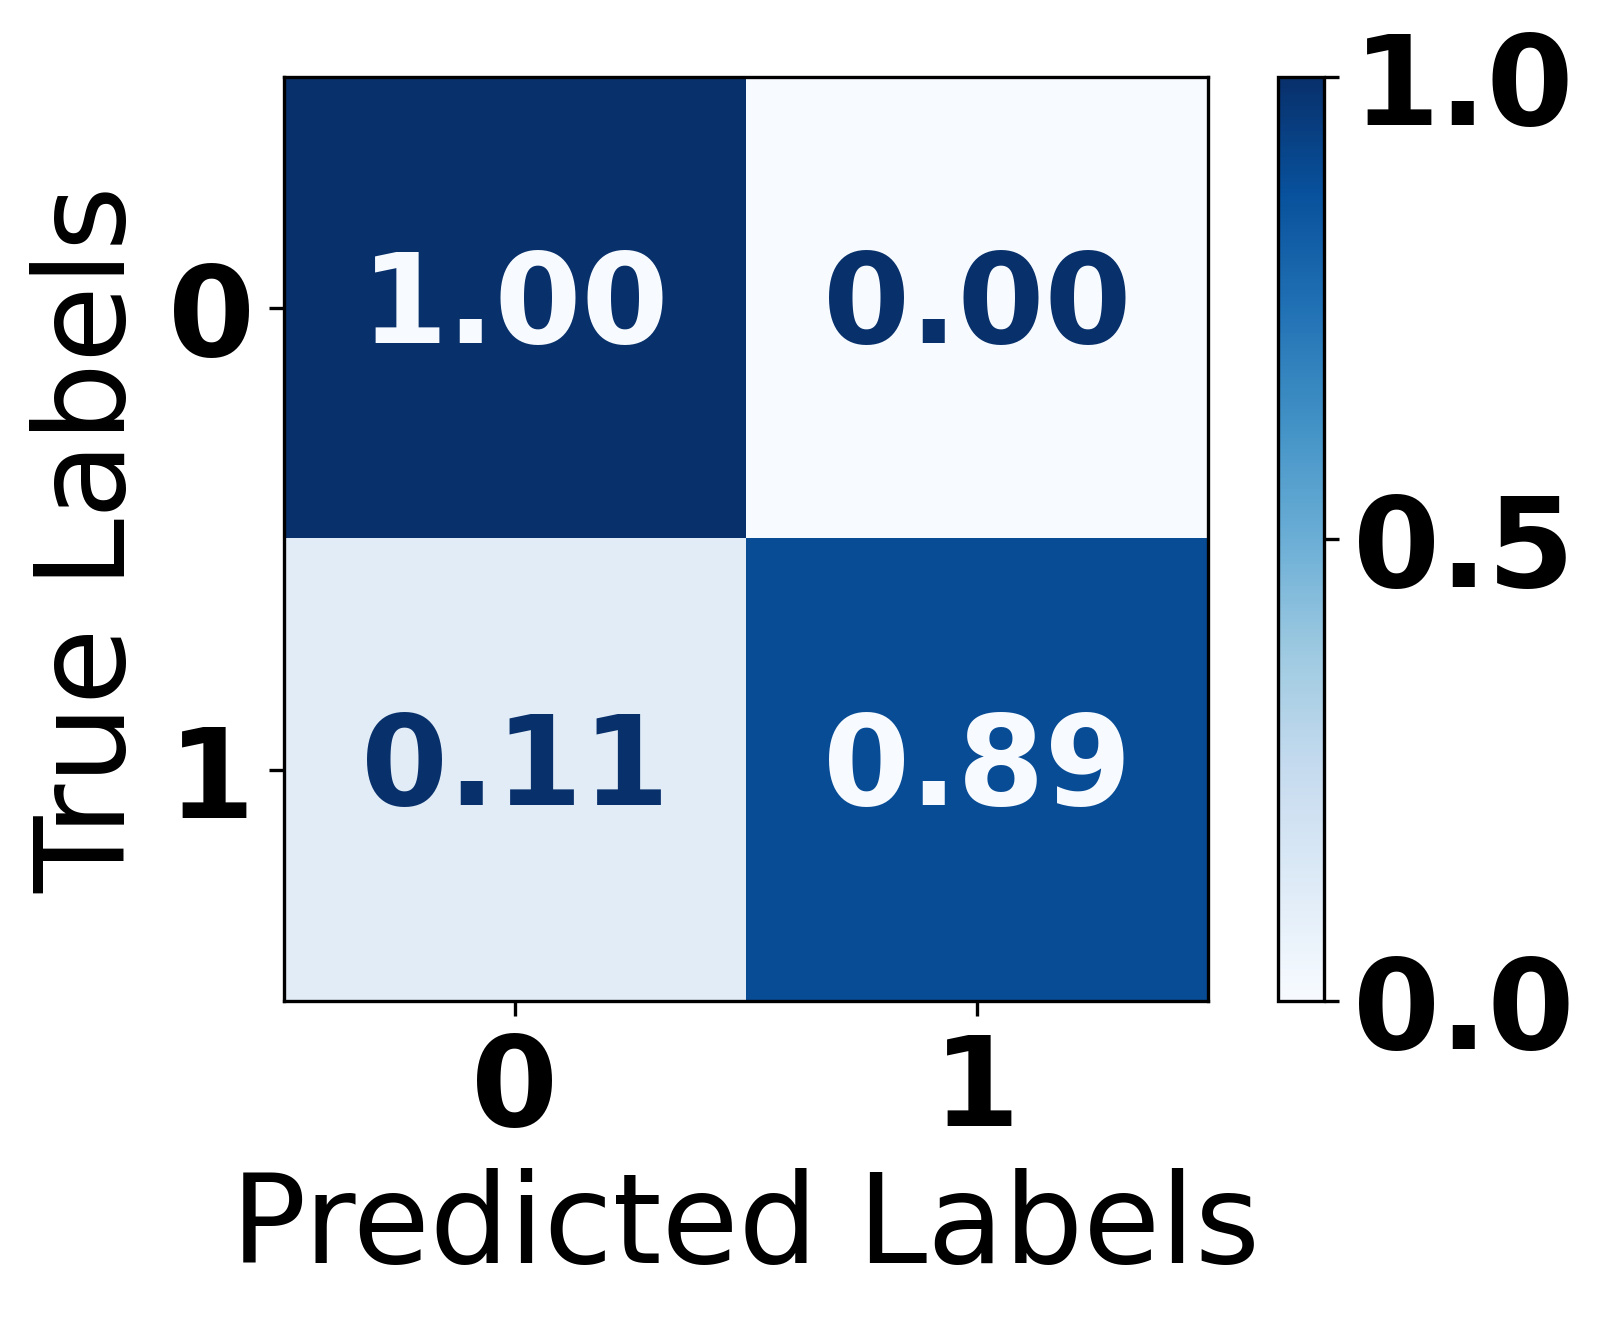

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=1.0, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=2, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.47826087 0.52173913]
 [0.11111111 0.88888889]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.48      0.63        23
     Class 1       0.40      0.89      0.55         9

    accuracy                           0.59        32
   macro avg       0.66      0.68      0.59        32
weighted avg       0.77      0.59      0.61        32



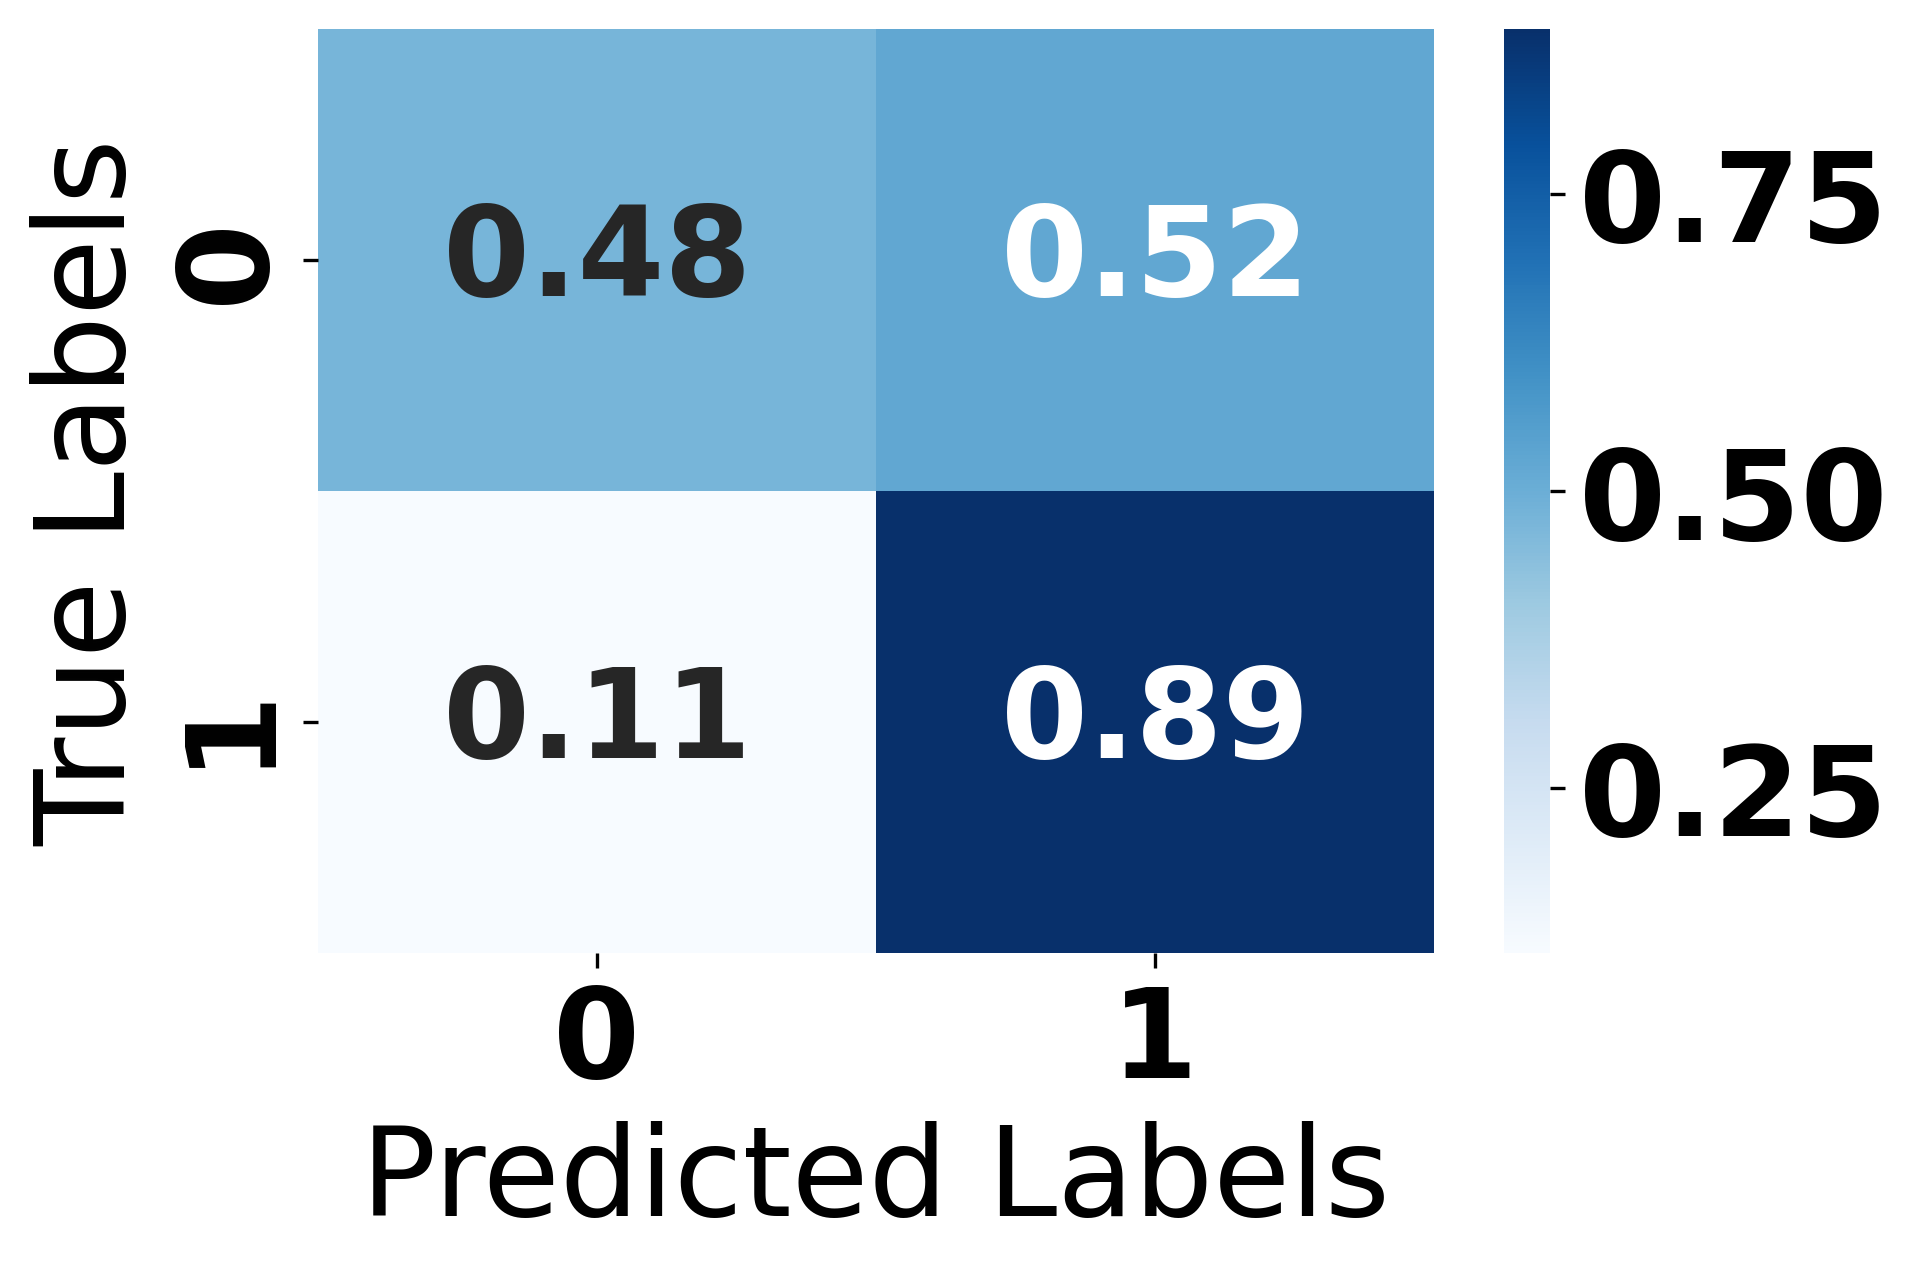

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/MLP.pkl')

In [ ]:
import numpy as np

# Convert to NumPy arrays if not already
x_train = np.array(x_train)
x_test = np.array(x_test)

# Reshape to (samples, timesteps, features=1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.4723 - loss: 305.2841 - val_accuracy: 0.2812 - val_loss: 166.2832
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7601 - loss: 44.2336 - val_accuracy: 0.7188 - val_loss: 28.3437
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4723 - loss: 55.9428 - val_accuracy: 0.2812 - val_loss: 69.6736
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7601 - loss: 23.3508 - val_accuracy: 0.2812 - val_loss: 32.3365
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6507 - loss: 8.2831 - val_accuracy: 0.2812 - val_loss: 37.7763
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7601 - loss: 13.4133 - val_accuracy: 0.2812 - val_loss: 24.2598
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6689 - loss: 11.5949 - val_accuracy: 0.2812 - val_loss: 5.8478
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7601 - loss: 4.1569 - val_accuracy: 0.2812 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        23
     Class 1       0.28      1.00      0.44         9

    accuracy                           0.28        32
   macro avg       0.14      0.50      0.22        32
weighted avg       0.08      0.28      0.12        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


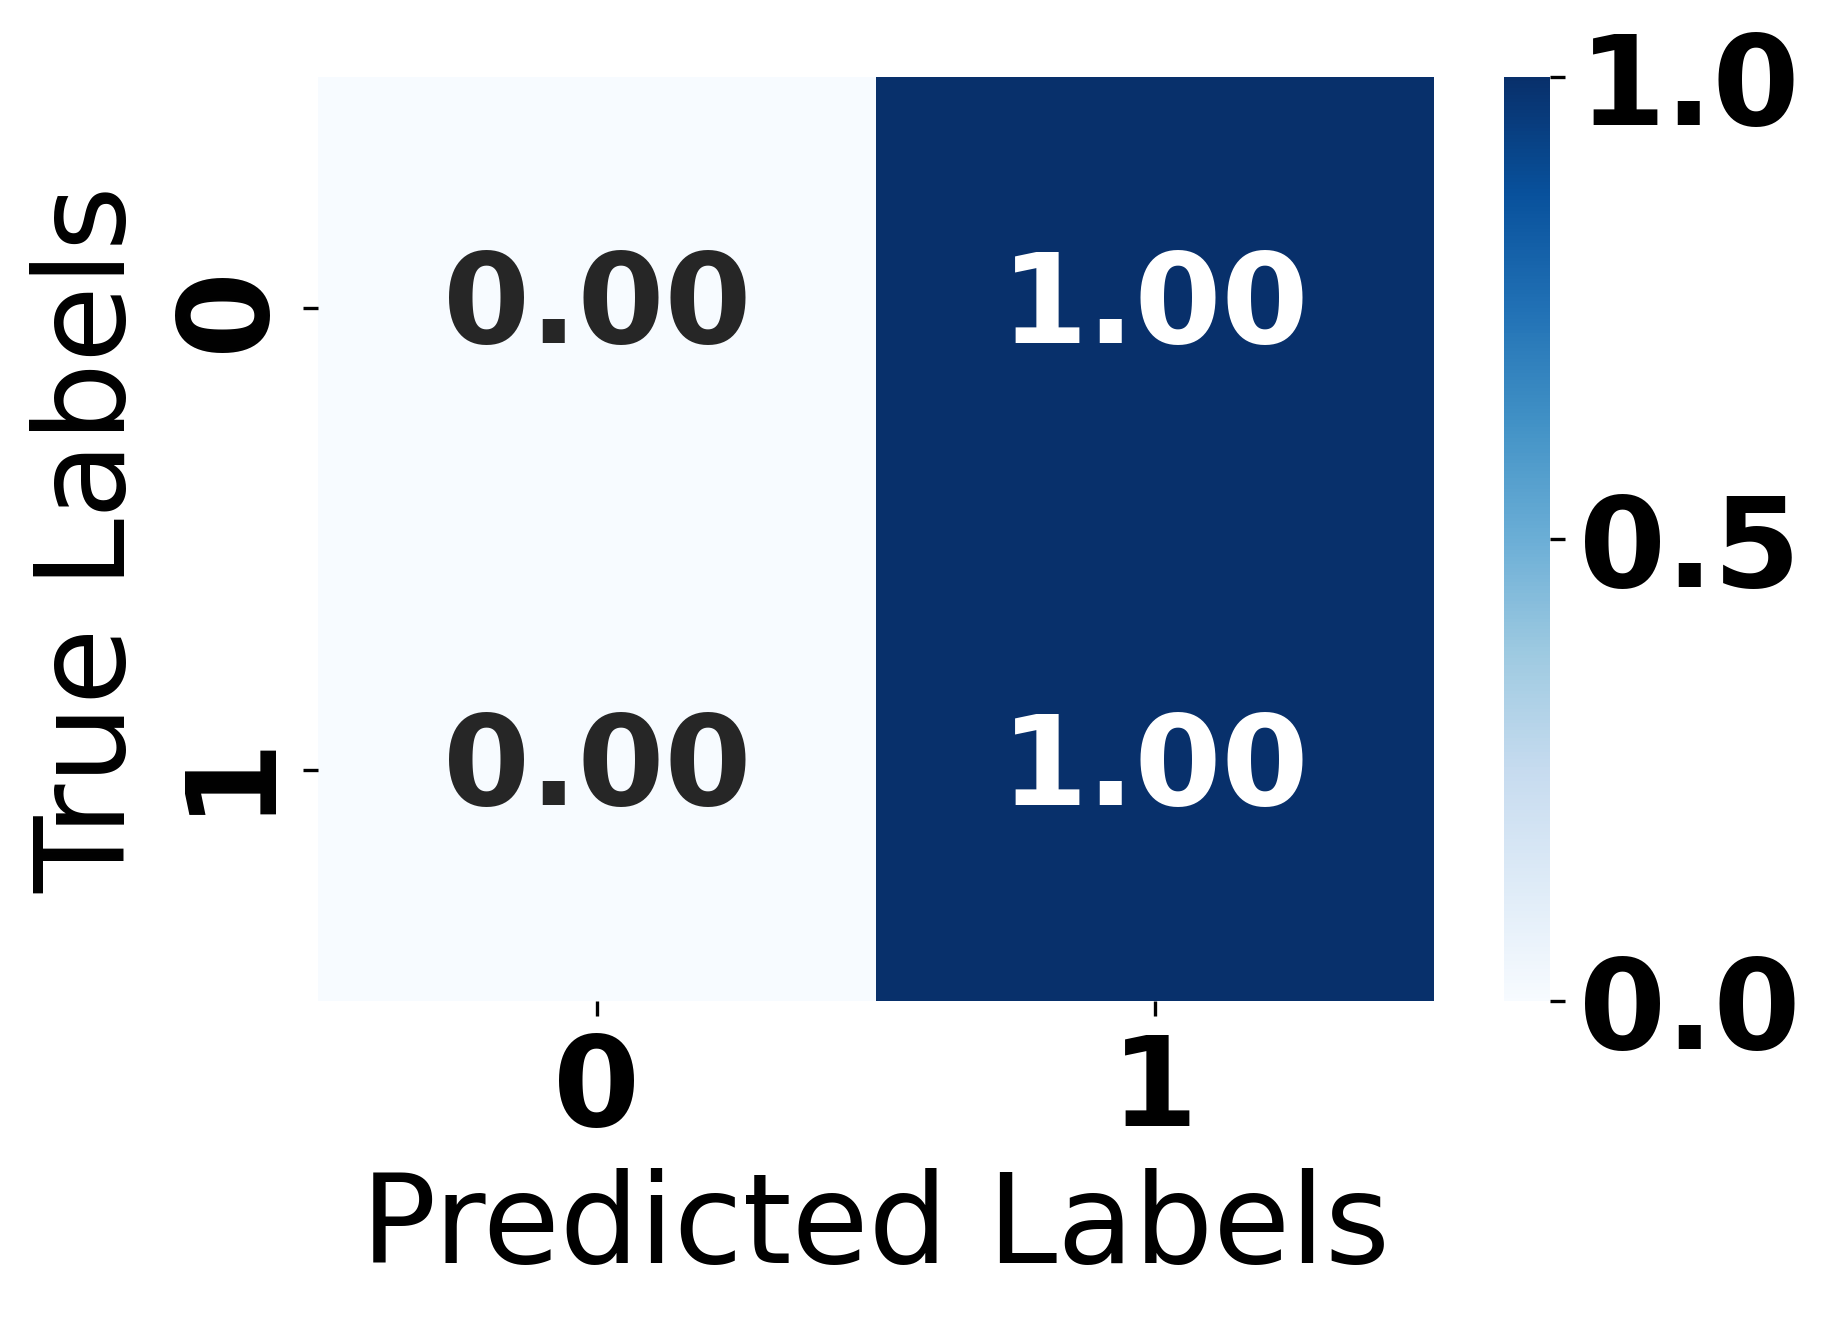

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.4785 - loss: 0.9006 - val_accuracy: 0.2812 - val_loss: 9.4037
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6872 - loss: 0.6729 - val_accuracy: 0.2812 - val_loss: 6.8590
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7321 - loss: 0.6243 - val_accuracy: 0.2812 - val_loss: 4.1606
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7894 - loss: 0.5947 - val_accuracy: 0.2812 - val_loss: 2.4851
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7939 - loss: 0.5155 - val_accuracy: 0.2812 - val_loss: 1.6148
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7992 - loss: 0.5353 - val_accuracy: 0.2812 - val_loss: 1.4831
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8356 - loss: 0.4724 - val_accuracy: 0.2812 - val_loss: 1.5029
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8333 - loss: 0.4756 - val_accuracy: 0.2812 - val_loss: 1.6118

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Normalized Confusion Matrix:
[[0.52173913 0.47826087]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.52      0.69        23
     Class 1       0.45      1.00      0.62         9

    accuracy                           0.66        32
   macro avg       0.72      0.76      0.65        32
weighted avg       0.85      0.66      0.67        32



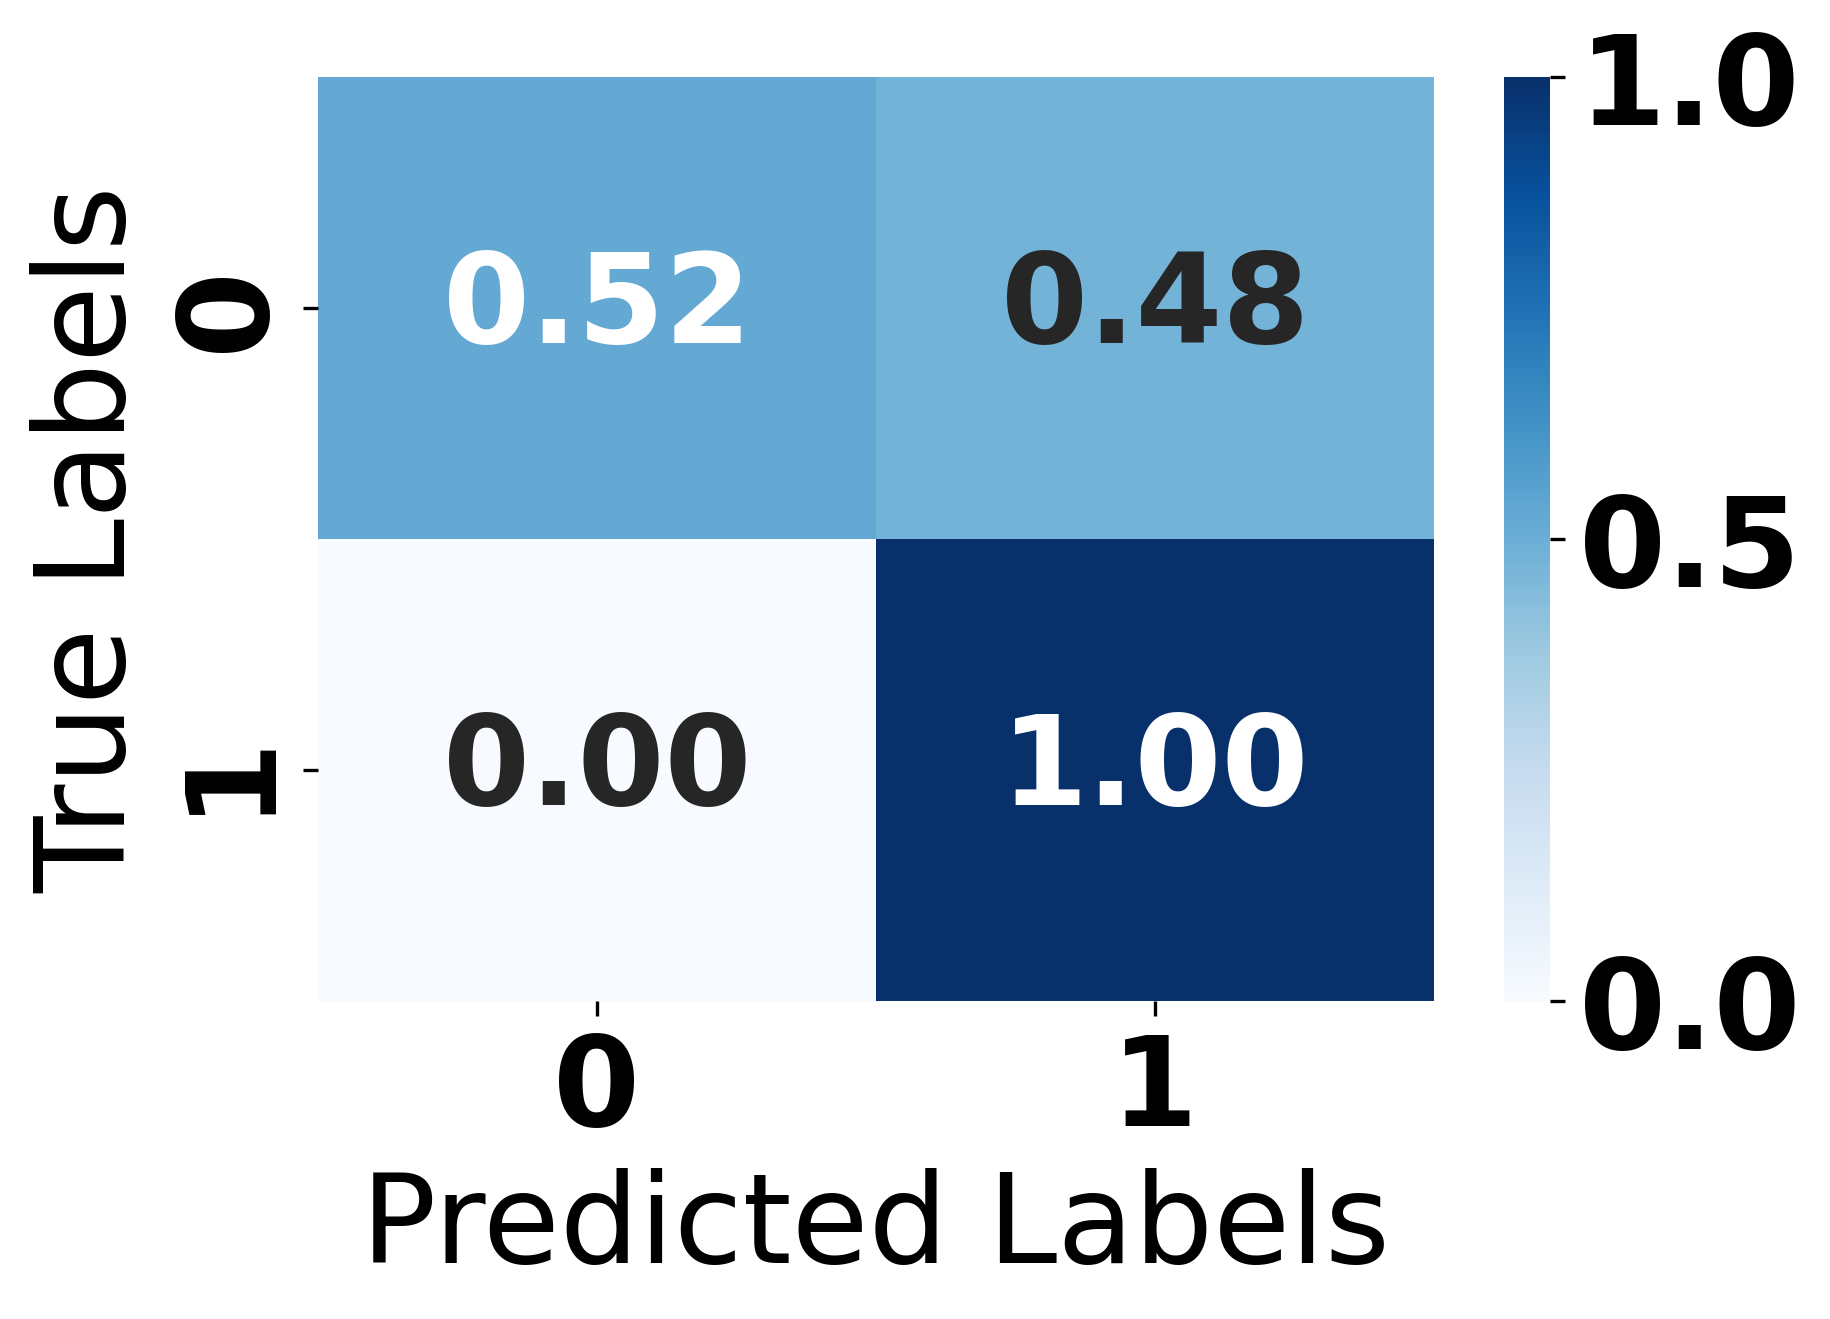

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/ANN.h5')

In [ ]:
import numpy as np
import time
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Automatically determine the vocab size from your data (ensure it's an integer)
vocab_size = int(max(np.max(x_train), np.max(x_test)) + 1)

# Optional: Clip values to enforce a max vocab size
# vocab_size = 20000
# x_train = np.where(x_train >= vocab_size, vocab_size - 1, x_train)
# x_test = np.where(x_test >= vocab_size, vocab_size - 1, x_test)

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Example: (100,)

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer (without deprecated input_length)
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim)(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Model configuration
embed_dim = 128
ff_dim = 128

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
end_time = time.time()
print("Training Time:", end_time - start_time)

# Evaluate the model
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
end_time = time.time()
print("Test Time:", end_time - start_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.7396 - loss: 0.6253 - val_accuracy: 0.2812 - val_loss: 0.8225
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7604 - loss: 0.6021 - val_accuracy: 0.2812 - val_loss: 0.8722
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7614 - loss: 0.5694 - val_accuracy: 0.2812 - val_loss: 0.9049
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7581 - loss: 0.5776 - val_accuracy: 0.2812 - val_loss: 0.9174
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.7572 - loss: 0.5603 - val_accuracy: 0.2812 - val_loss: 0.9088
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7614 - loss: 0.5325 - val_accuracy: 0.2812 - val_loss: 0.8904
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7721 - loss: 0.5002 - val_accuracy: 0.2812 - val_loss: 0.8684
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.7601 - loss: 0.5131 - val_accuracy: 0.2812 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Normalized Confusion Matrix:
[[0.47826087 0.52173913]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.48      0.65        23
     Class 1       0.43      1.00      0.60         9

    accuracy                           0.62        32
   macro avg       0.71      0.74      0.62        32
weighted avg       0.84      0.62      0.63        32



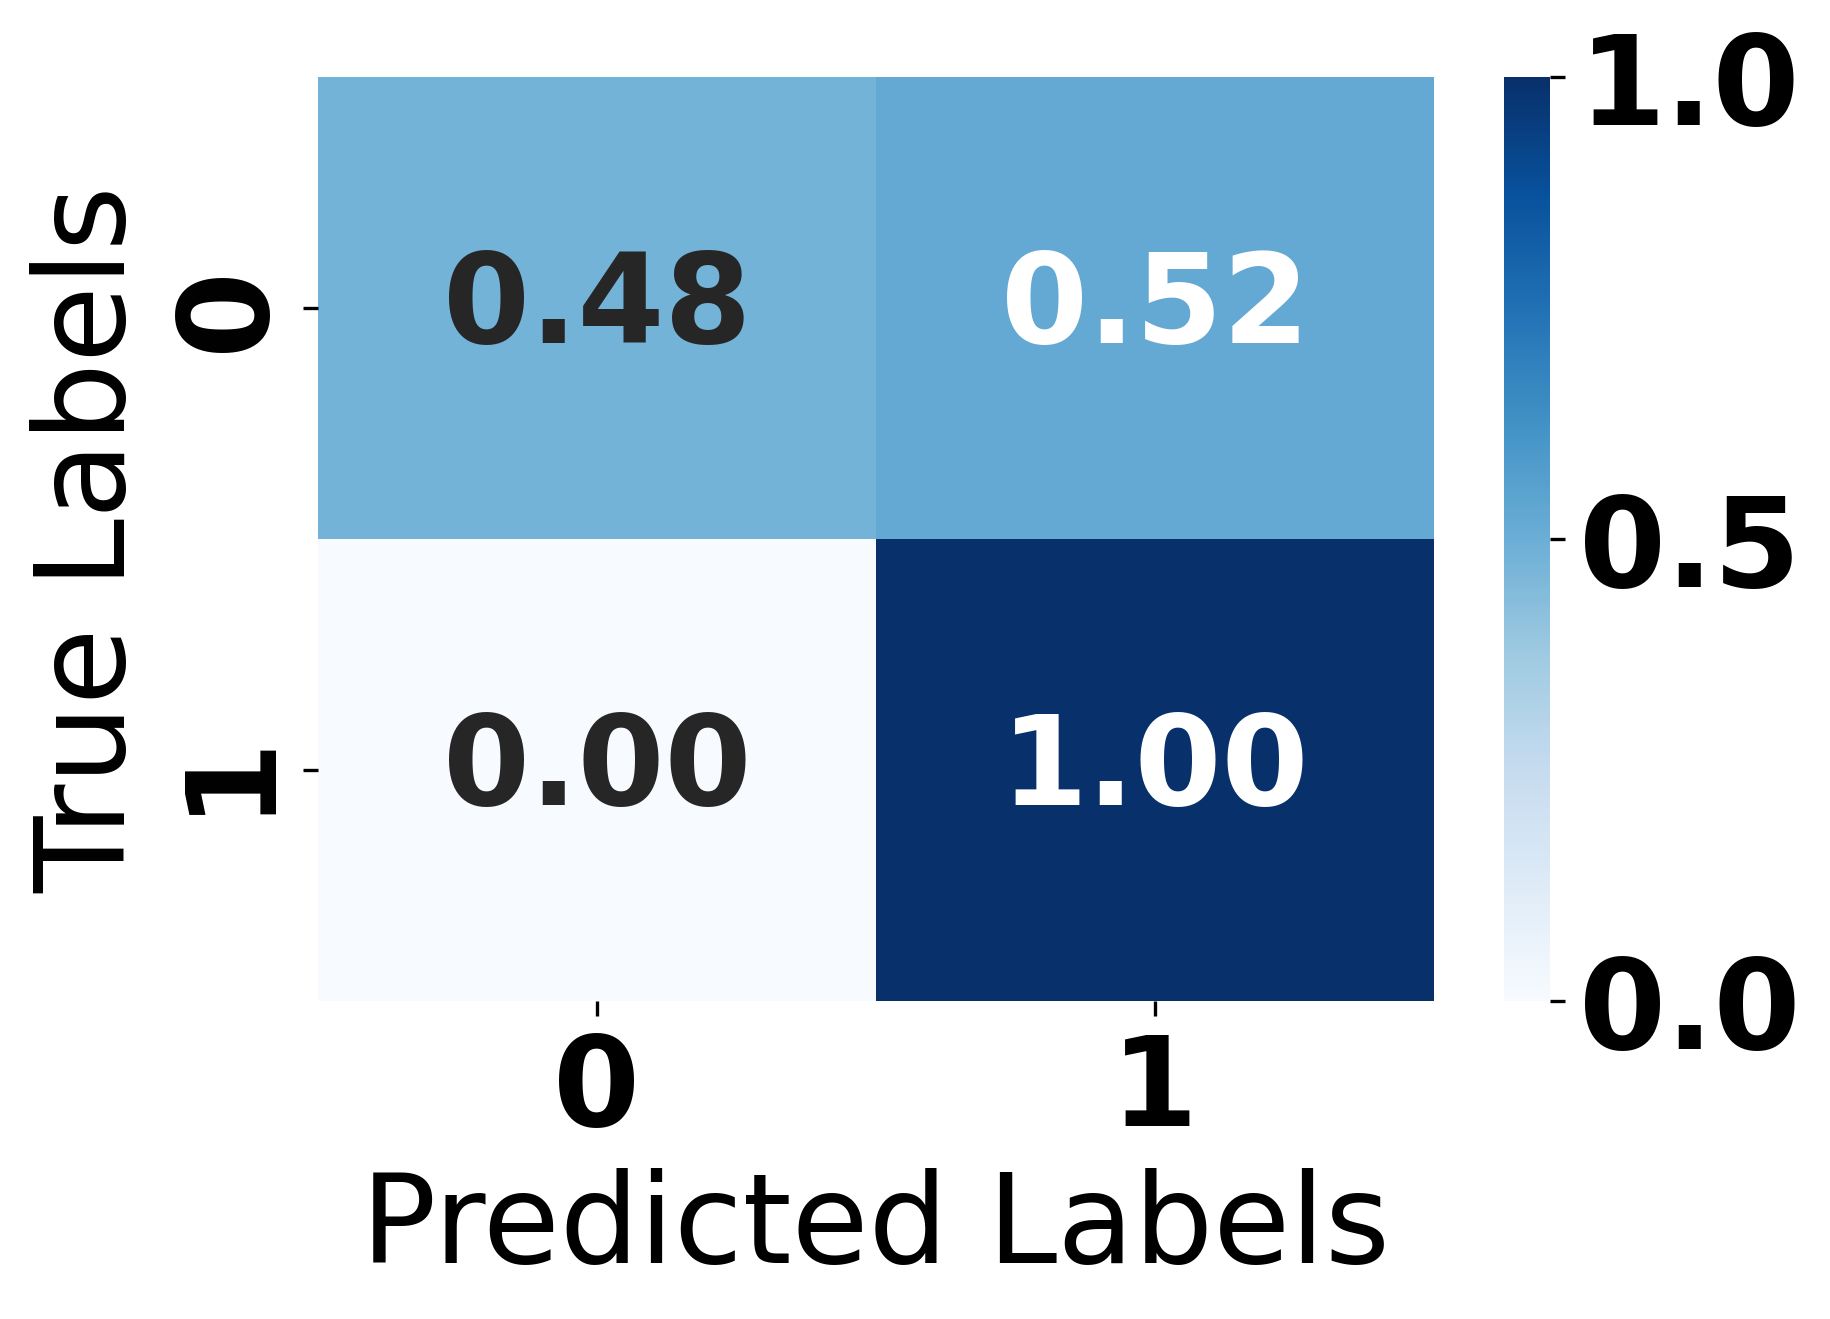

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/CTGAN/Model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=96, training_loss=0.4309860405373911, metrics={'train_runtime': 735.9145, 'train_samples_per_second': 0.522, 'train_steps_per_second': 0.13, 'total_flos': 0.0, 'train_loss': 0.4309860405373911, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.7188    1.0000    0.8364        23
           1     0.0000    0.0000    0.0000         9

    accuracy                         0.7188        32
   macro avg     0.3594    0.5000    0.4182        32
weighted avg     0.5166    0.7188    0.6011        32

Confusion Matrix:
 [[23  0]
 [ 9  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### TVAE (Tabular Variational Autoencoder)

In [ ]:
!pip install ctgan

In [ ]:
from ctgan import TVAE
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices for CKD dataset
categorical_features = [3, 4, 5, 6, 7, 8, 9, 19, 20, 21, 22, 23, 24]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Ensure categorical feature indices are within bounds
valid_cat_indices = [i for i in categorical_features if i < x_train.shape[1]]

# Add target column to x_train
x_train['target'] = y_train

# Print original class distribution
print("Before TVAE:", Counter(y_train))

# Get only minority class samples
minority_df = x_train[x_train['target'] == 1]

# Determine how many synthetic samples are needed
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get valid categorical column names
categorical_columns = x_train.columns[valid_cat_indices].tolist() + ['target']

# Train TVAE on minority class
tvae = TVAE(epochs=300)
tvae.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic data
synthetic_minority = tvae.sample(samples_to_generate)

# Keep only target = 1 samples
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and labels
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic samples
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Show updated class distribution
print("After TVAE:", Counter(y_resampled_df))

Before TVAE: Counter({np.int64(0): 92, np.int64(1): 34})
After TVAE: Counter({1: 292, 0: 92})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
55.000000    7
48.000000    6
60.000000    6
59.000000    5
47.000000    4
            ..
58.757532    1
69.917362    1
56.842254    1
66.538935    1
64.876611    1
Name: count, Length: 312, dtype: int64

Counts for bp:
bp
80.000000     46
60.000000     35
70.000000     31
90.000000      8
100.000000     5
              ..
70.037310      1
61.266233      1
89.955502      1
68.400779      1
77.242472      1
Name: count, Length: 264, dtype: int64

Counts for sg:
sg
1.025000    49
1.020000    48
1.010000    20
1.015000     8
1.012507     1
            ..
1.009887     1
1.010377     1
1.010825     1
1.009619     1
1.013200     1
Name: count, Length: 263, dtype: int64

Counts for al:
al
3.0    154
4.0    104
0.0     92
2.0     31
1.0      3
Name: count, dtype: int64

Counts for su:
su
0.0    367
1.0      8
2.0      4
3.0      3
4.0      1
5.0      1
Name: count, dtype: int64

Counts for rbc:
rbc
1    268
0    116
Name: count, dtype: int64

Counts for pc:
pc
0    267
1   

## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

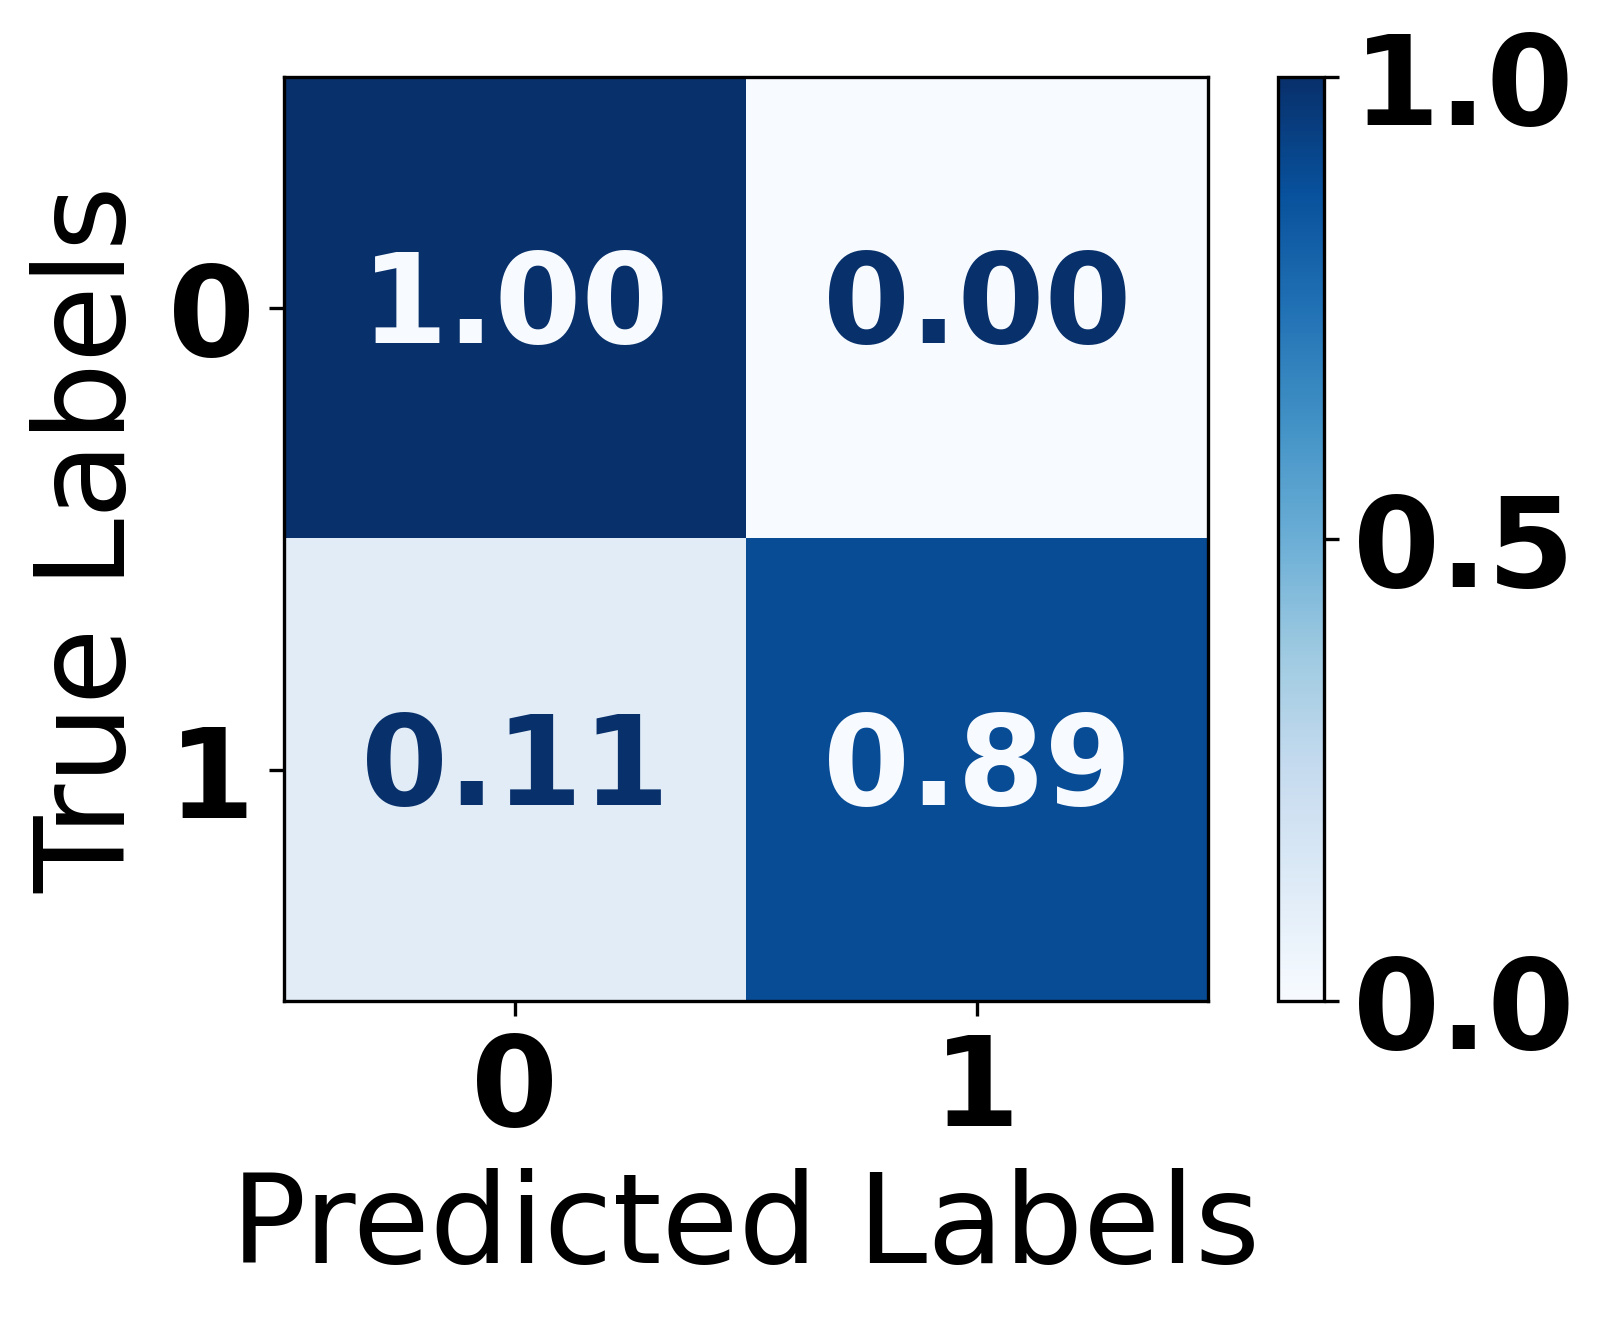

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


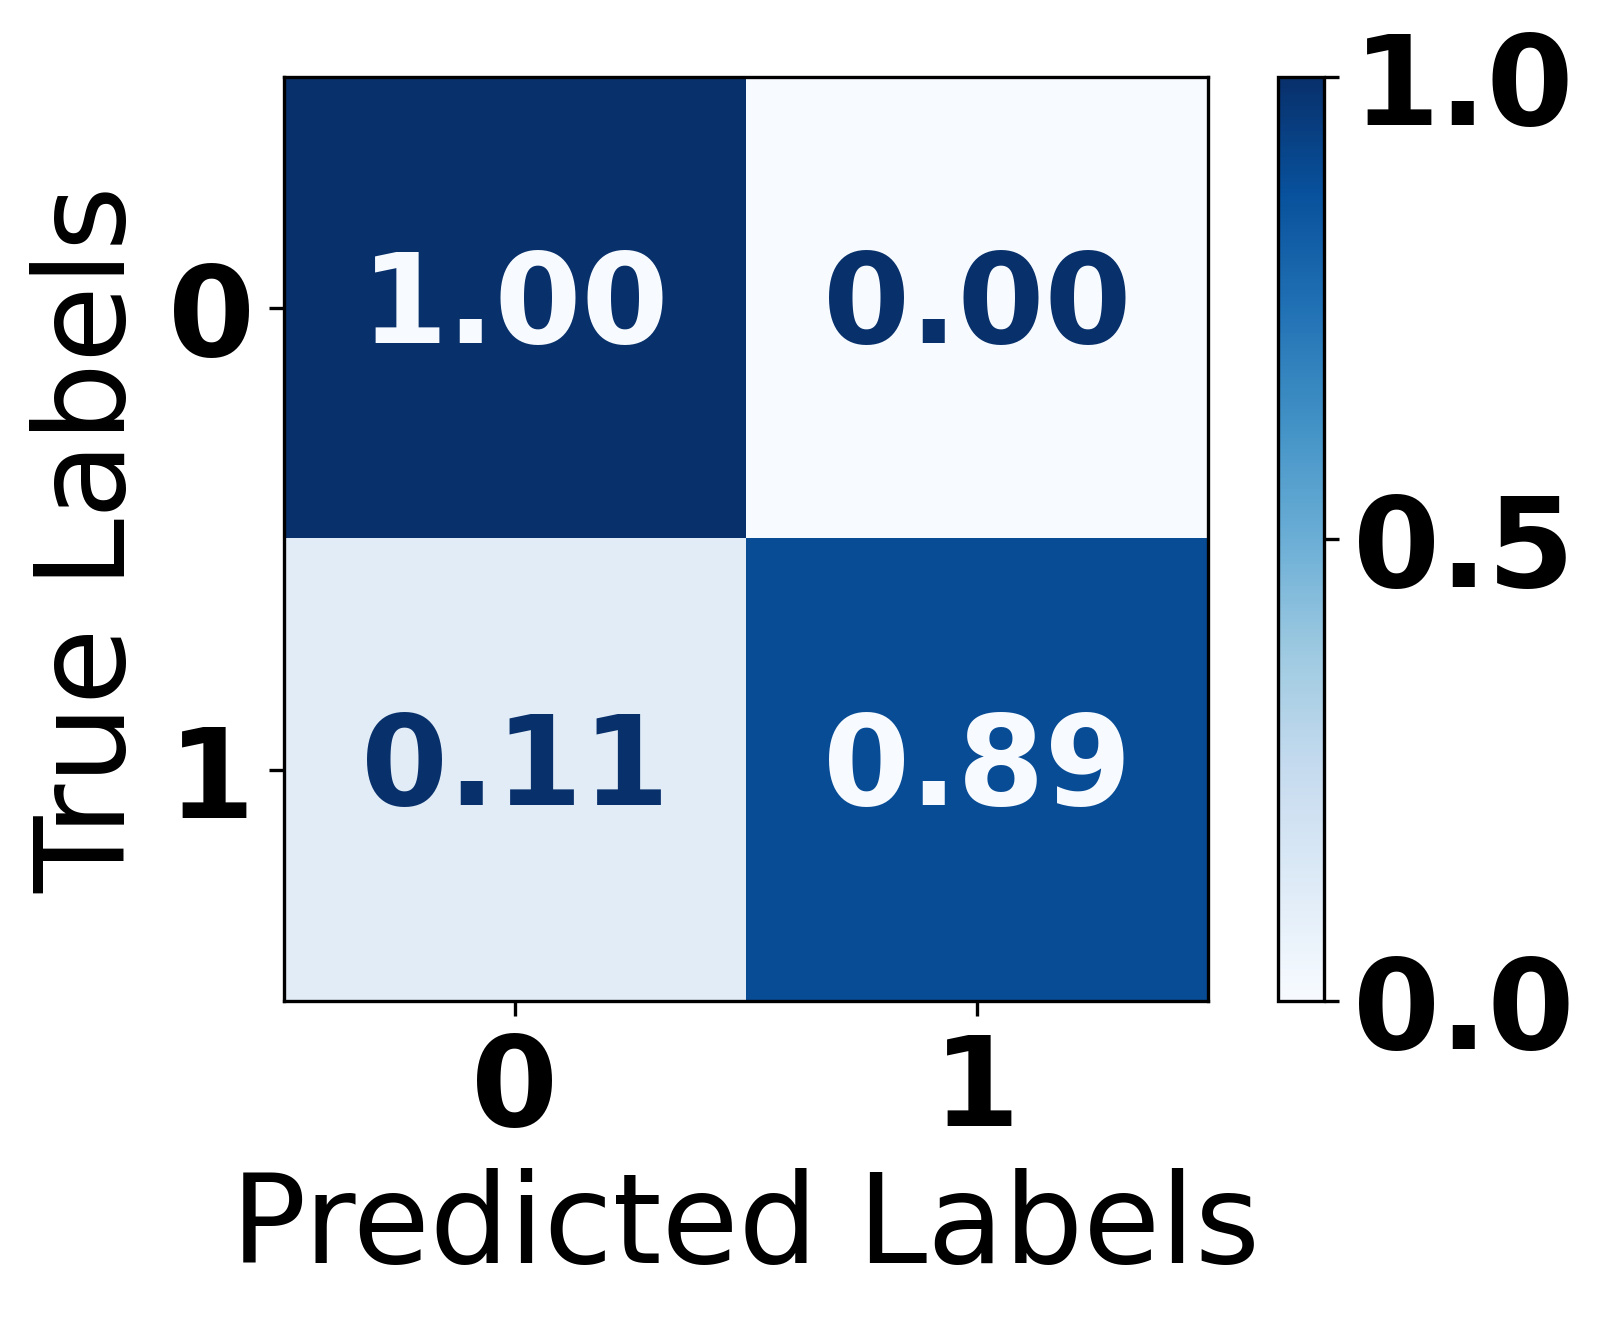

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=1, random_state=25)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


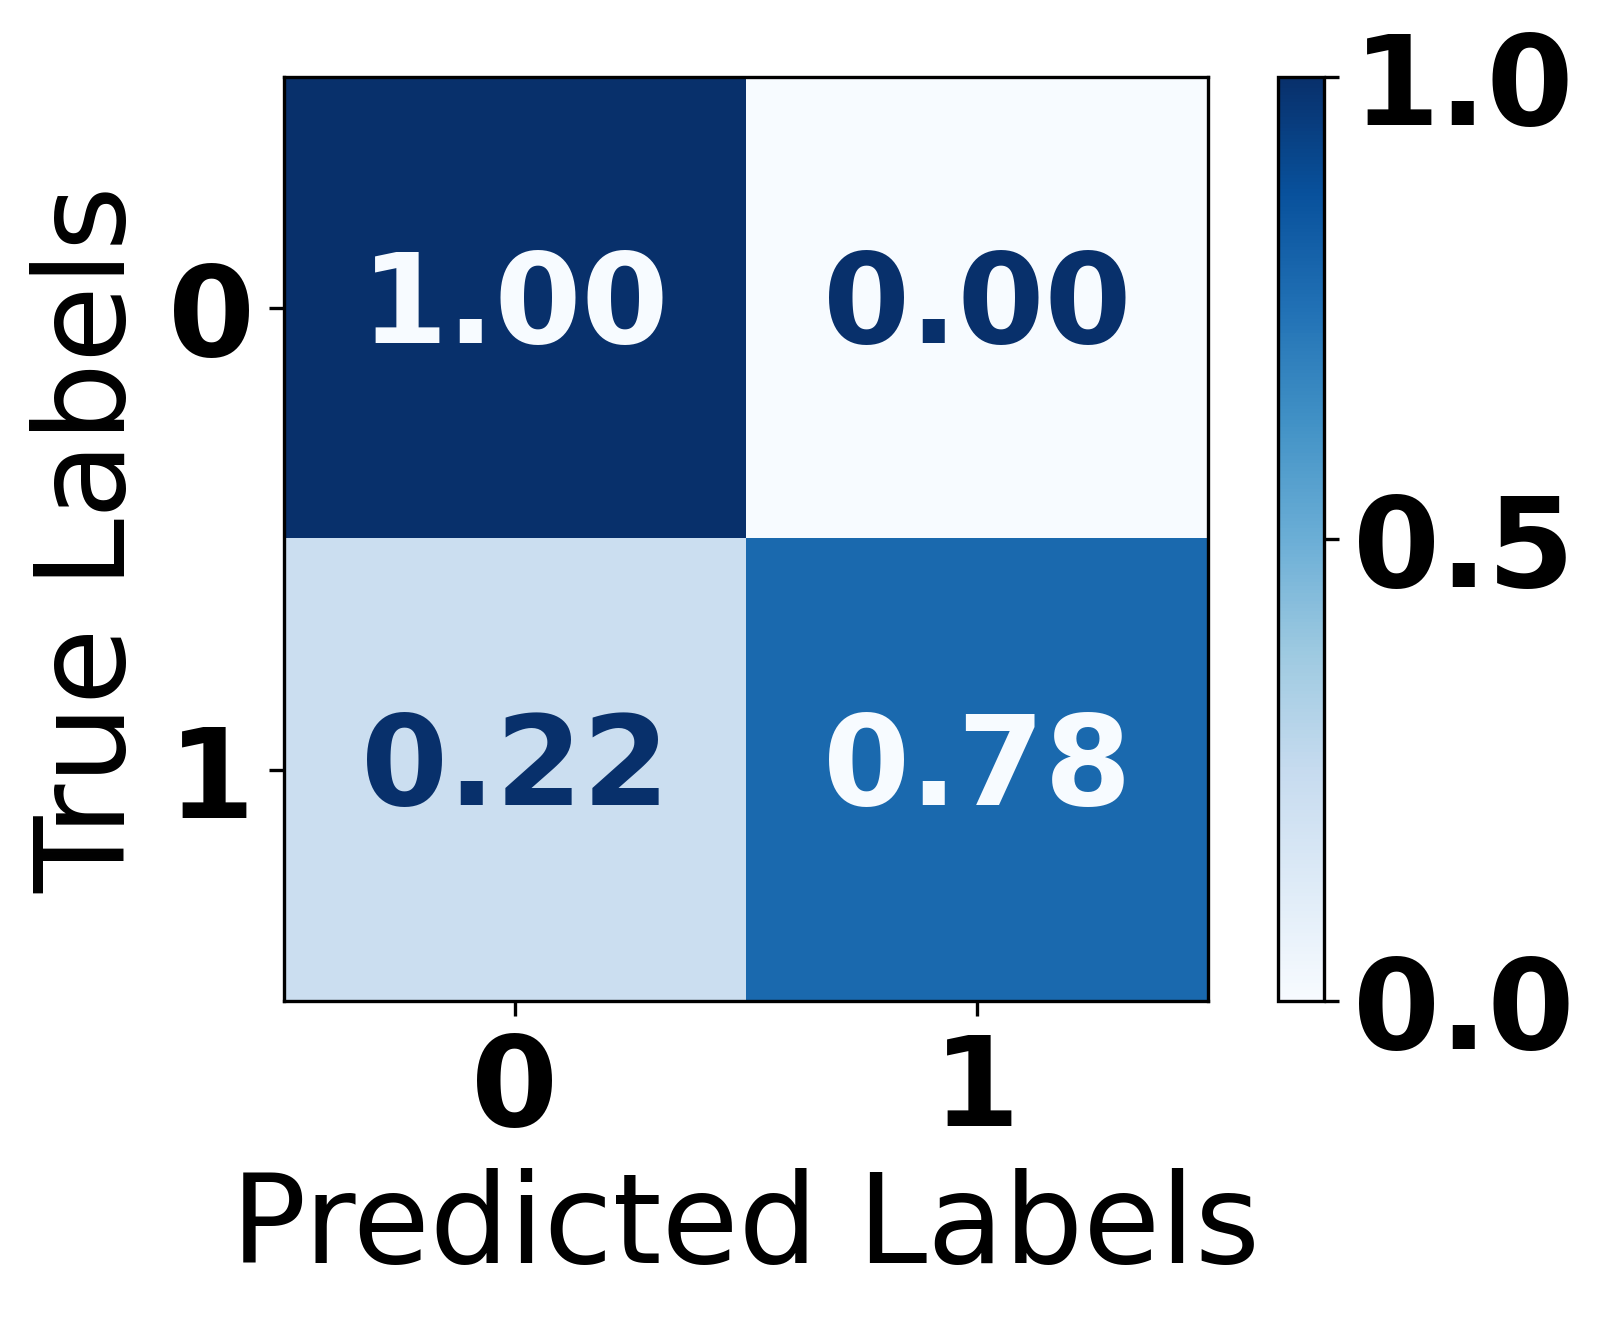

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.96      0.89      0.92        32
weighted avg       0.94      0.94      0.93        32

Train Accuracy: 0.9635416666666666
Test Accuracy: 0.9375


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=2, # Require lots of samples to split
    min_samples_leaf=1,  # Each leaf must have many samples
    random_state=1
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


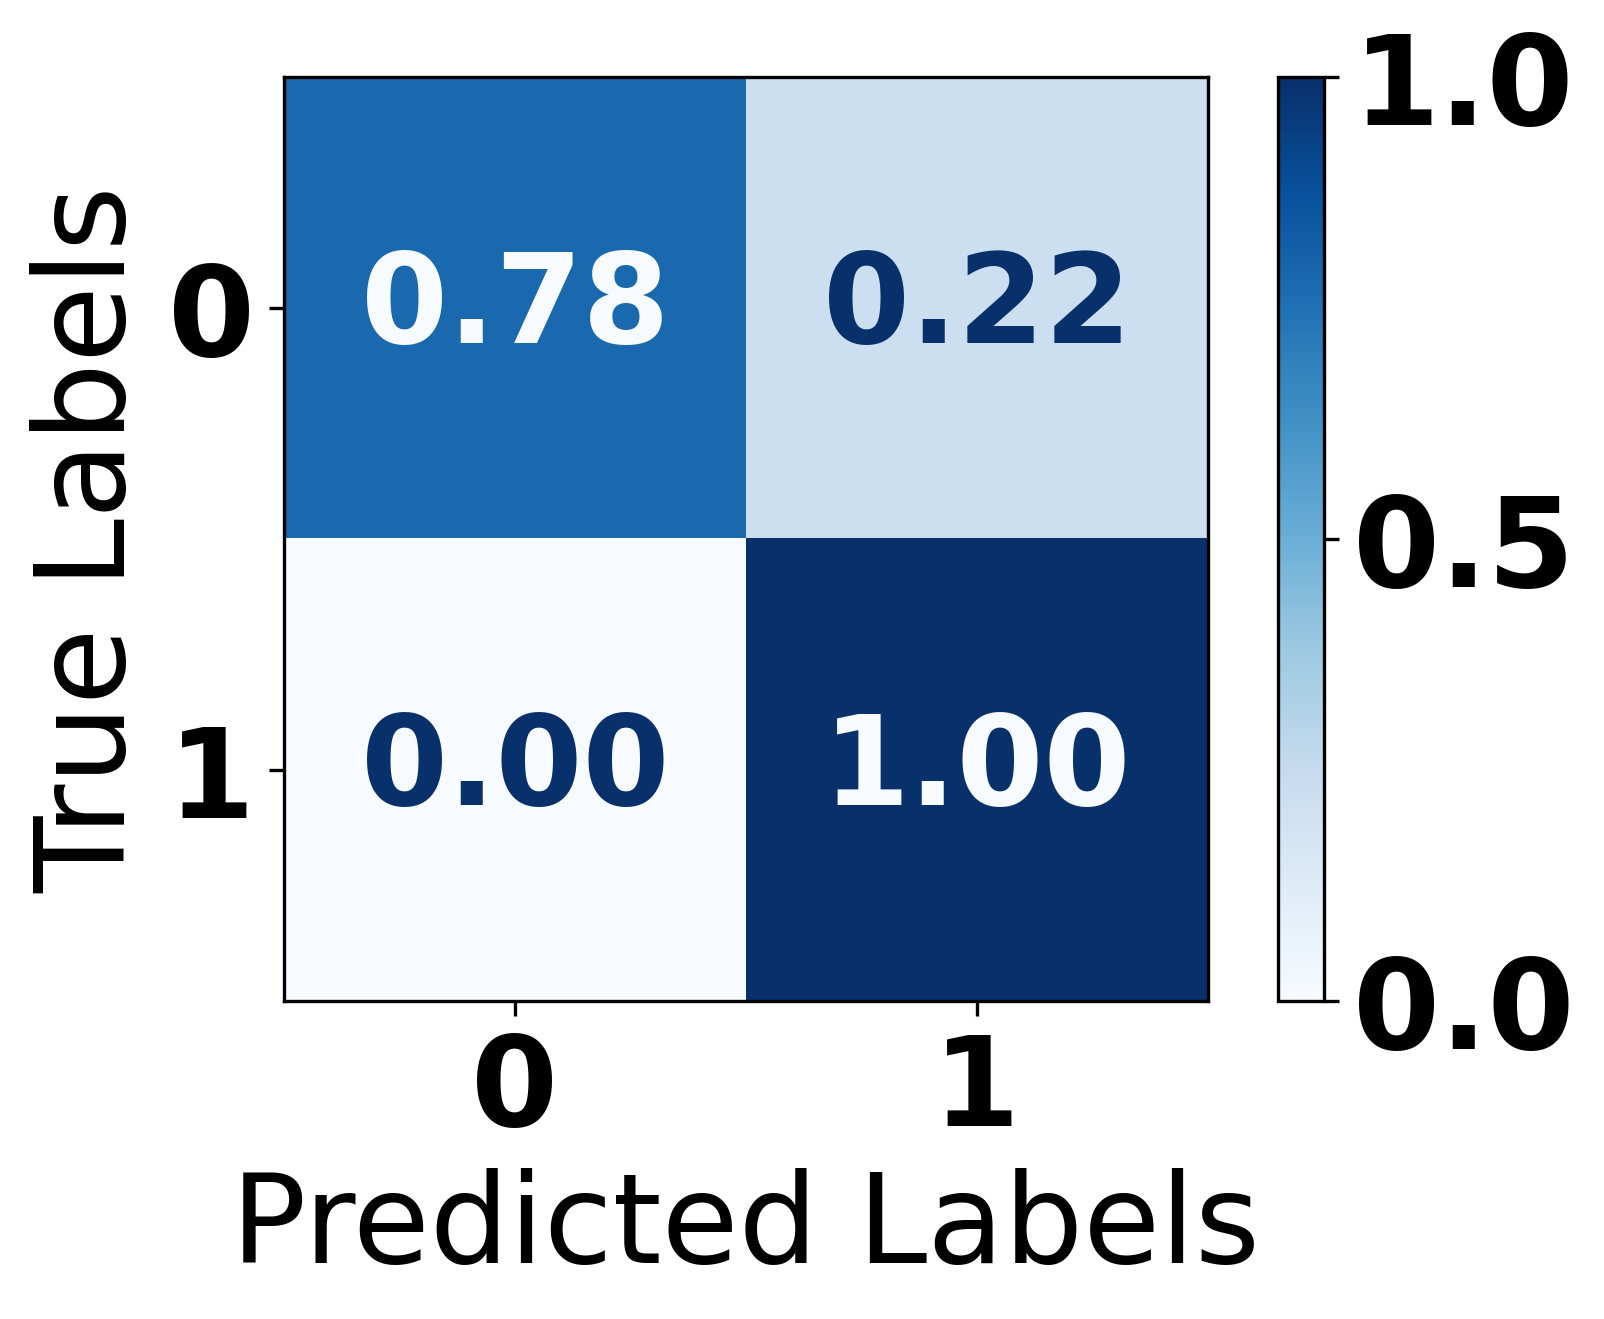

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.64      1.00      0.78         9

    accuracy                           0.84        32
   macro avg       0.82      0.89      0.83        32
weighted avg       0.90      0.84      0.85        32

Train Accuracy: 0.8958333333333334
Test Accuracy: 0.84375


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.0006)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


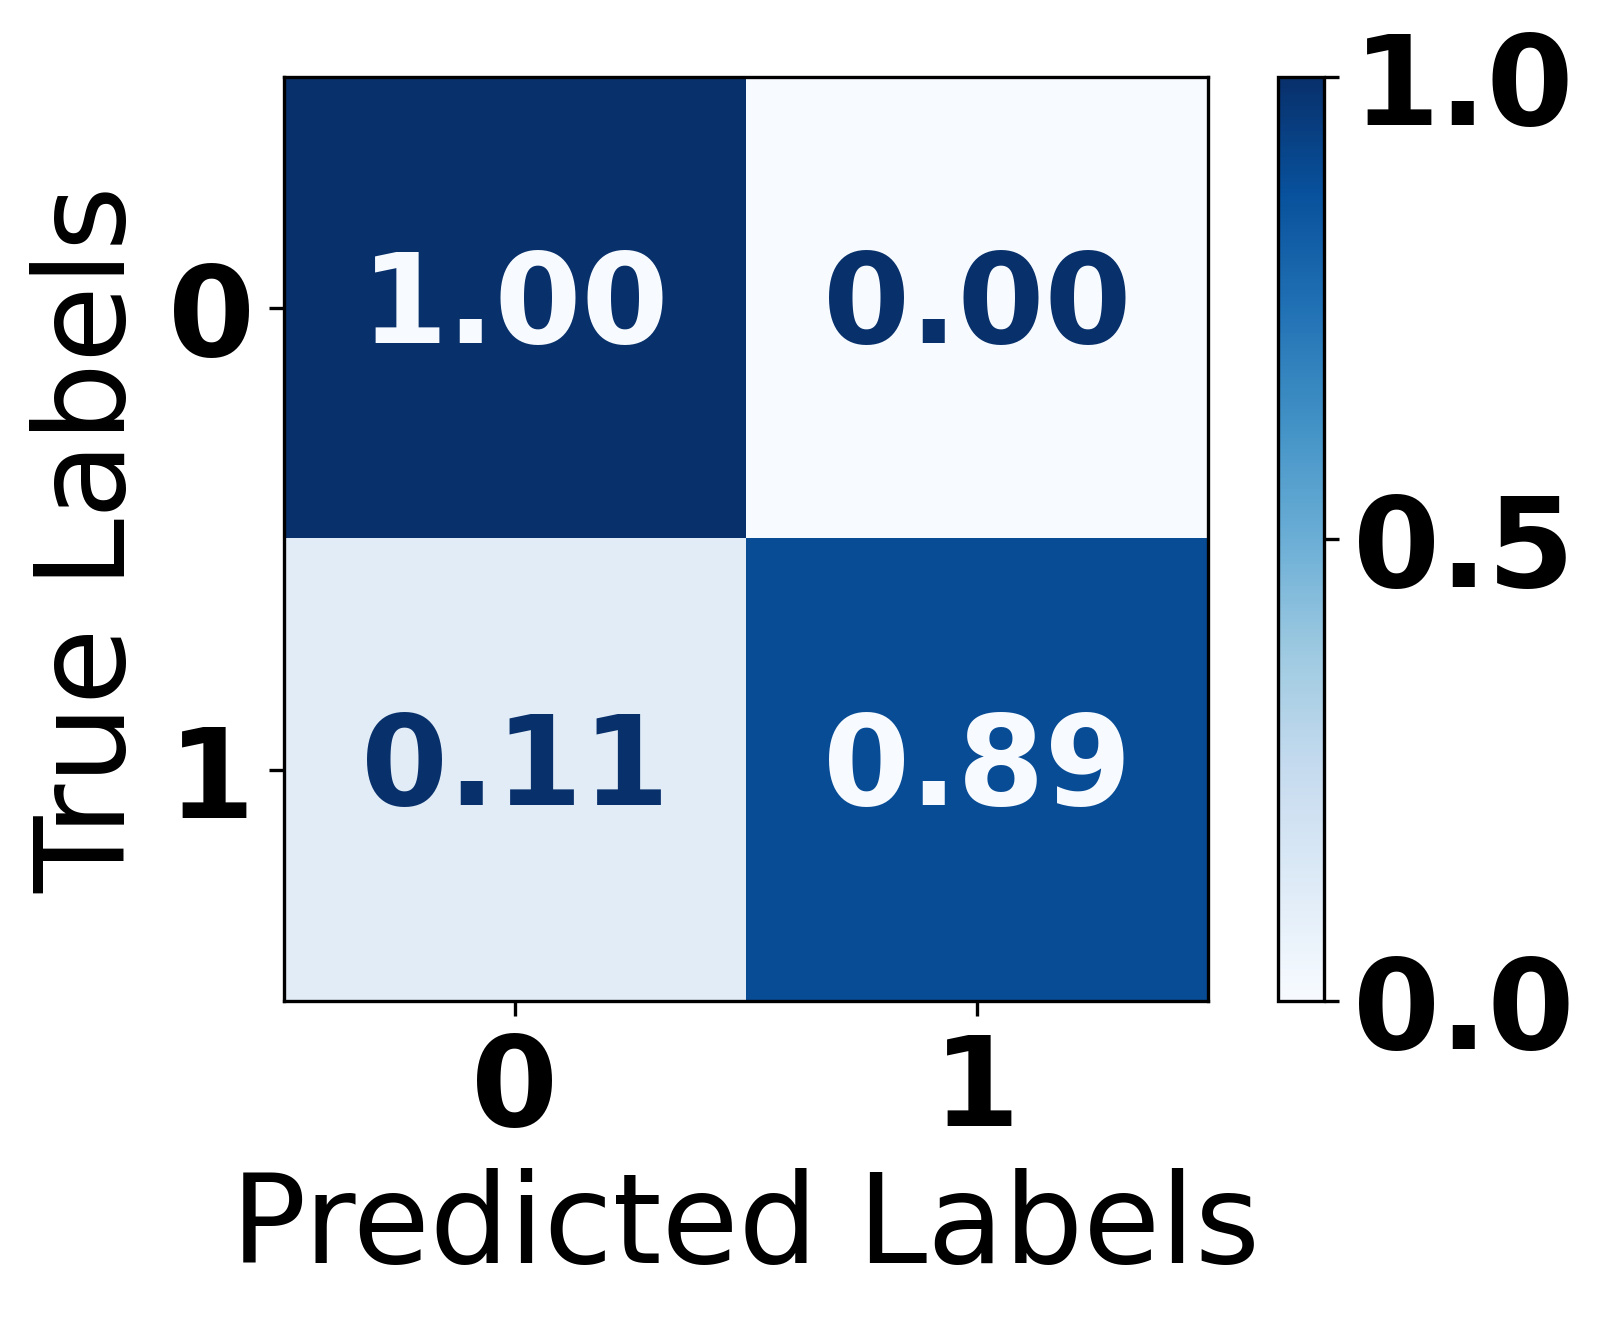

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=2, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.17391304 0.82608696]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.17      0.30        23
     Class 1       0.32      1.00      0.49         9

    accuracy                           0.41        32
   macro avg       0.66      0.59      0.39        32
weighted avg       0.81      0.41      0.35        32



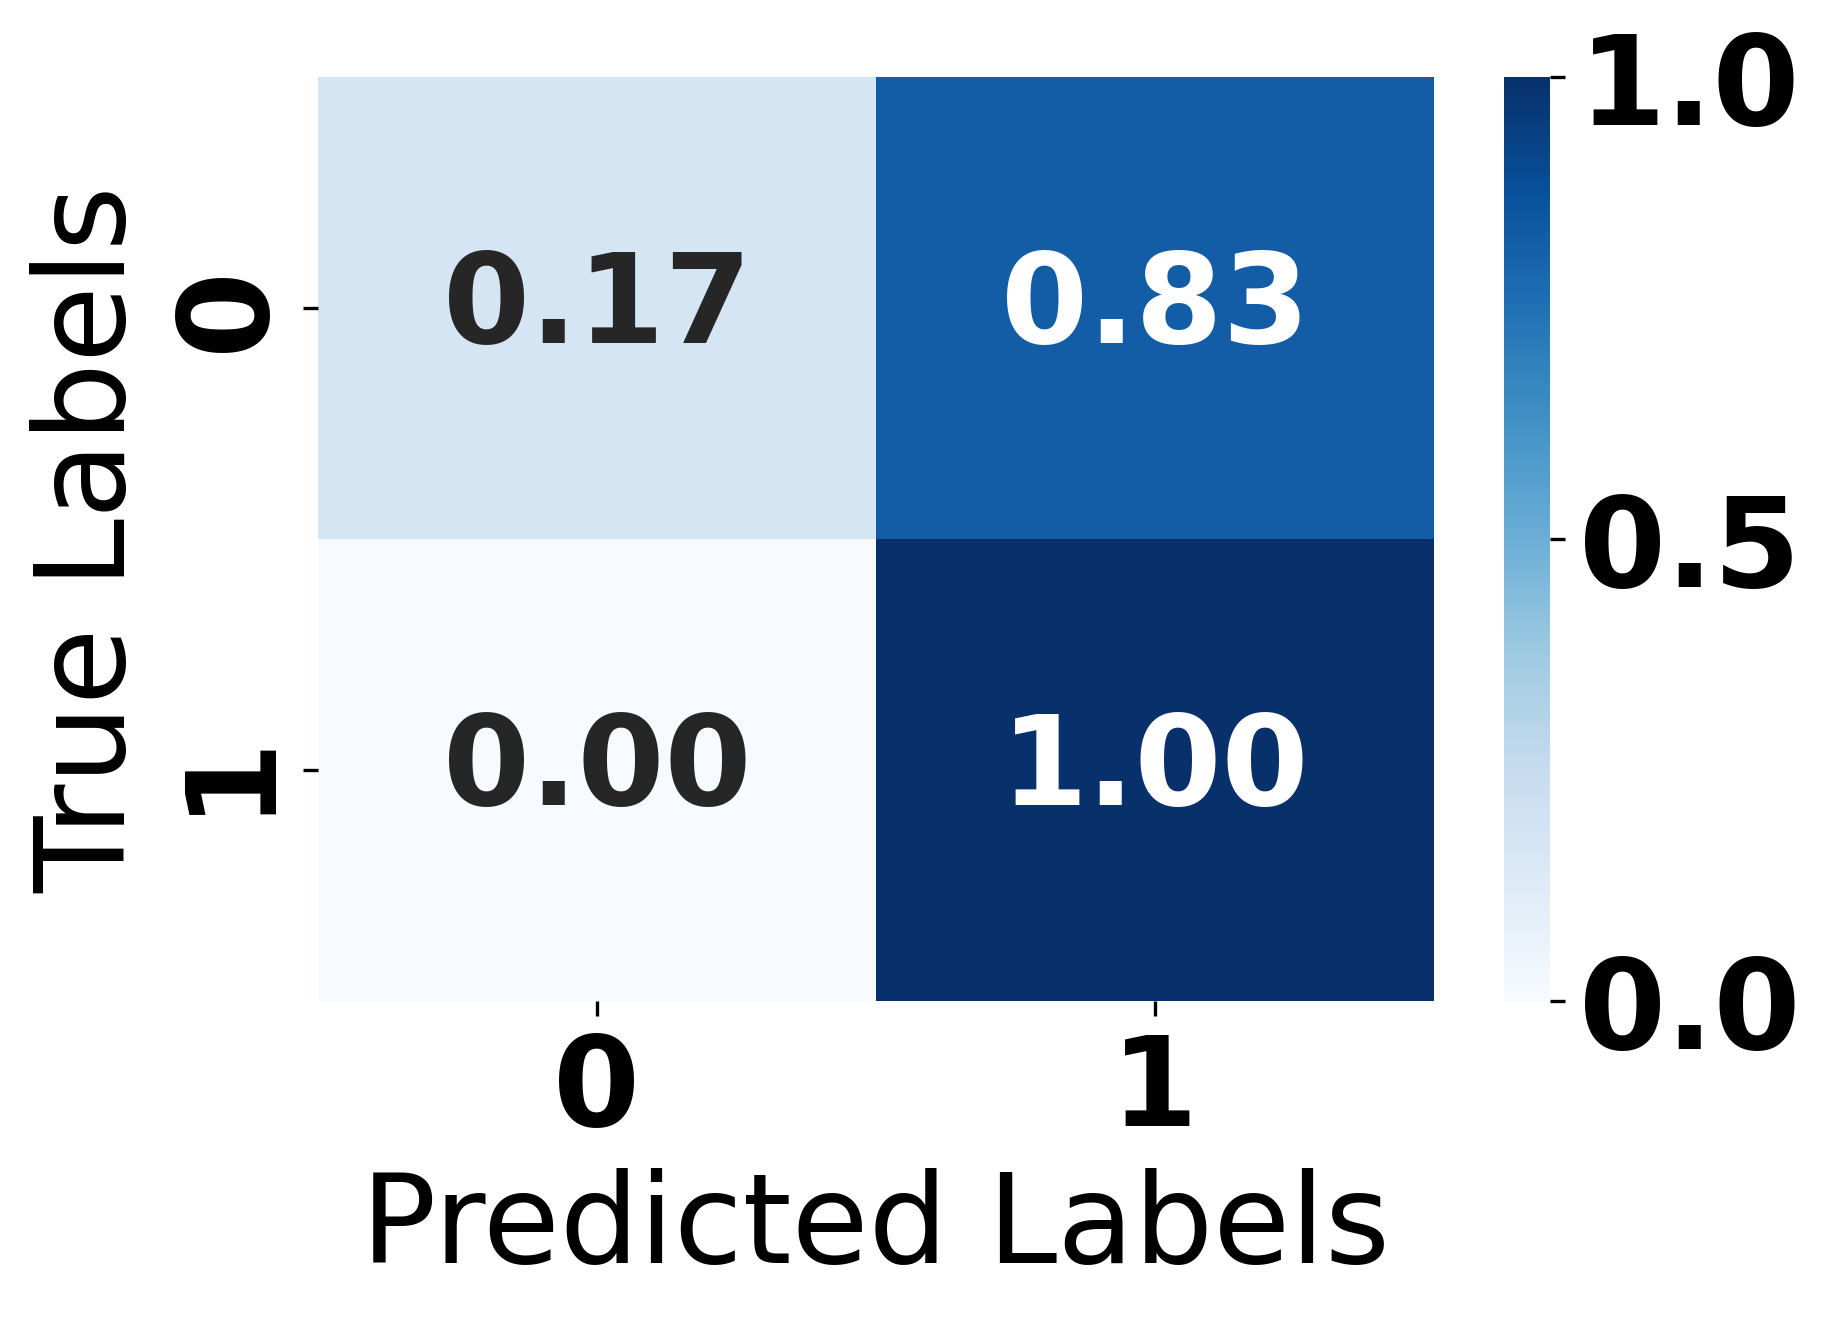

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.6211 - loss: 91.4213 - val_accuracy: 0.2812 - val_loss: 209.2045
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7601 - loss: 69.8107 - val_accuracy: 0.2812 - val_loss: 100.7456
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6689 - loss: 33.7911 - val_accuracy: 0.7188 - val_loss: 14.0494
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4766 - loss: 26.5424 - val_accuracy: 0.2812 - val_loss: 132.7647
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7601 - loss: 44.0203 - val_accuracy: 0.2812 - val_loss: 64.4379
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6689 - loss: 27.7119 - val_accuracy: 0.7188 - val_loss: 26.3780
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4723 - loss: 33.6472 - val_accuracy: 0.2812 - val_loss: 92.5828
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7601 - loss: 33.1545 - val_accuracy: 0.2812

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        23
     Class 1       0.28      1.00      0.44         9

    accuracy                           0.28        32
   macro avg       0.14      0.50      0.22        32
weighted avg       0.08      0.28      0.12        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


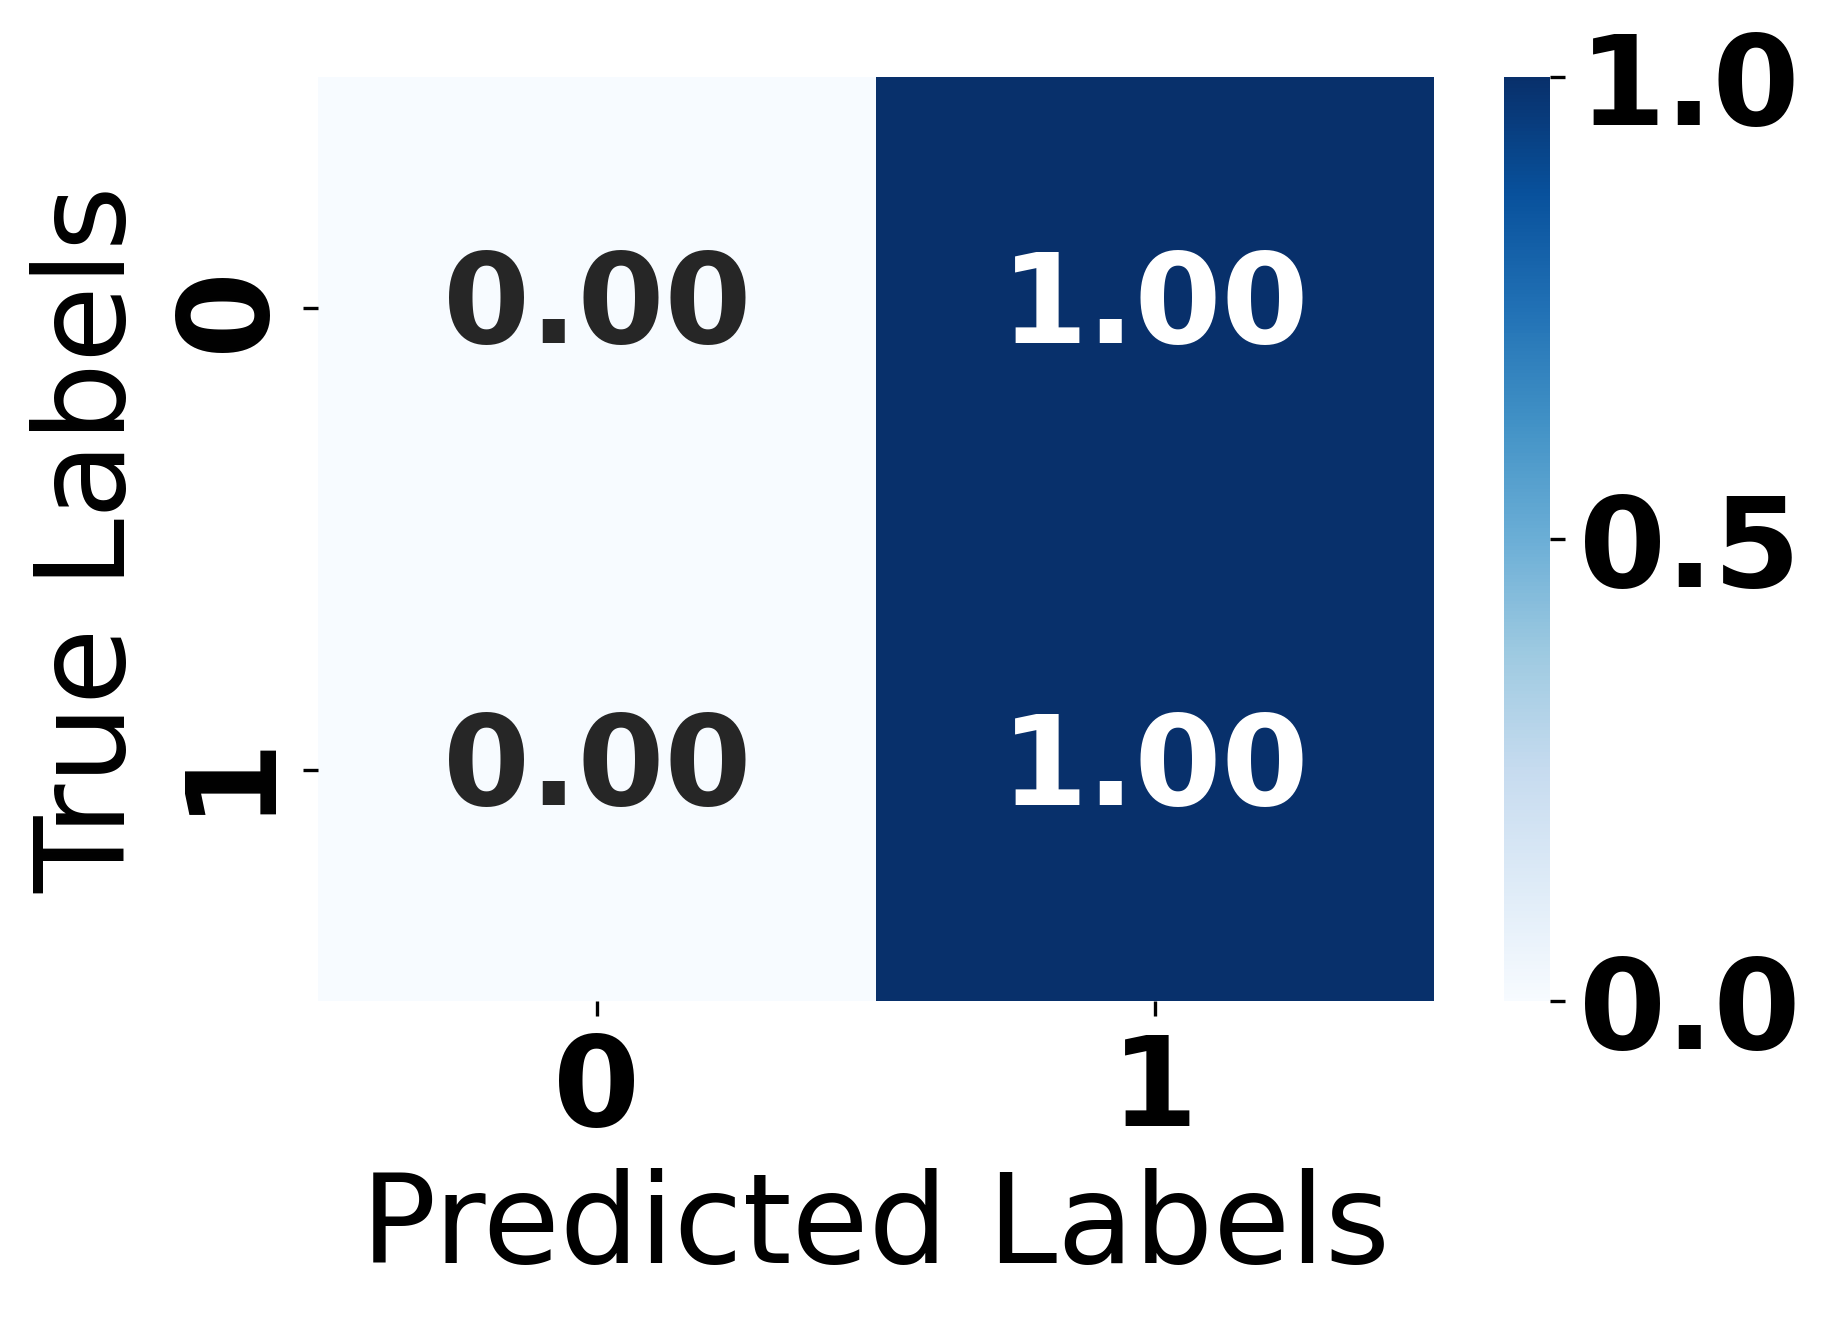

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - accuracy: 0.5417 - loss: 0.8442 - val_accuracy: 0.2812 - val_loss: 10.2228
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5876 - loss: 0.7752 - val_accuracy: 0.2812 - val_loss: 7.3899
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6234 - loss: 0.7028 - val_accuracy: 0.2812 - val_loss: 6.1827
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6344 - loss: 0.6543 - val_accuracy: 0.2812 - val_loss: 5.7853
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6816 - loss: 0.5928 - val_accuracy: 0.2812 - val_loss: 5.2867
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7350 - loss: 0.5733 - val_accuracy: 0.2812 - val_loss: 4.3271
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.7305 - loss: 0.5507 - val_accuracy: 0.2812 - val_loss: 3.4685
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7666 - loss: 0.4879 - val_accuracy: 0.2812 - val_loss: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Normalized Confusion Matrix:
[[0.04347826 0.95652174]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.04      0.08        23
     Class 1       0.29      1.00      0.45         9

    accuracy                           0.31        32
   macro avg       0.65      0.52      0.27        32
weighted avg       0.80      0.31      0.19        32



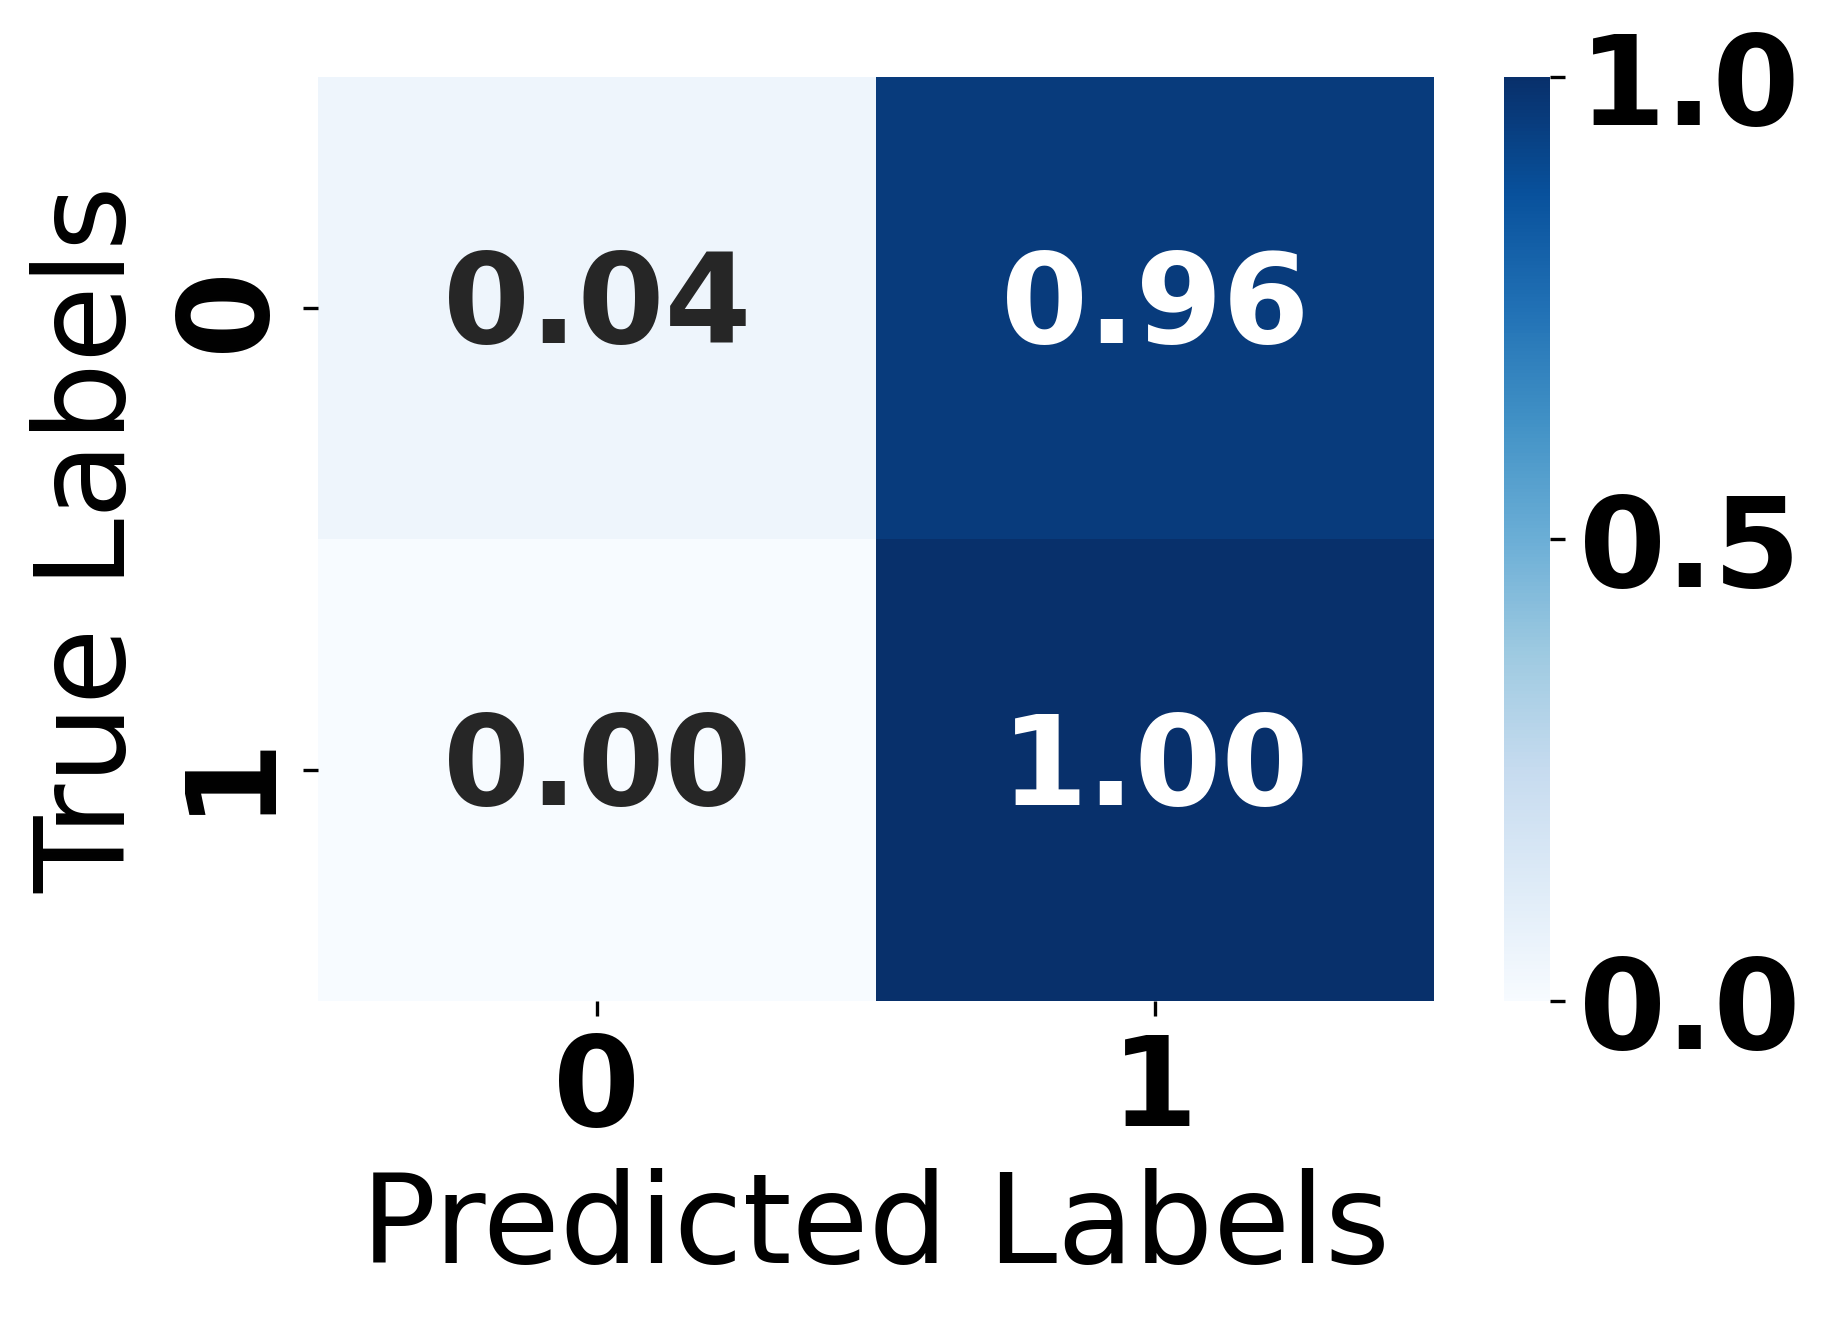

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import time

# Define model parameters
vocab_size = 27000  # Increased to accommodate max token index in your data
embed_dim = 128
ff_dim = 128

# Clip tokens to avoid out-of-bound indices
x_train = np.clip(x_train, 0, vocab_size - 1)
x_test = np.clip(x_test, 0, vocab_size - 1)

# Define the input shape
input_shape = (x_train.shape[1],)

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    inputs = Input(shape=input_shape)

    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    x = GlobalAveragePooling1D()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
training_time = time.time() - start_time
print("Training Time:", training_time)

# Evaluate the model
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
test_time = time.time() - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 779ms/step - accuracy: 0.6465 - loss: 0.6566 - val_accuracy: 0.2812 - val_loss: 0.7958
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 0.7487 - loss: 0.6065 - val_accuracy: 0.2812 - val_loss: 0.8494
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.7653 - loss: 0.5729 - val_accuracy: 0.2812 - val_loss: 0.8936
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7572 - loss: 0.5413 - val_accuracy: 0.2812 - val_loss: 0.9300
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7614 - loss: 0.5382 - val_accuracy: 0.2812 - val_loss: 0.9475
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.7588 - loss: 0.5094 - val_accuracy: 0.2812 - val_loss: 0.9338
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.7588 - loss: 0.5111 - val_accuracy: 0.2812 - val_loss: 0.9032
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7650 - loss: 0.4914 - val_accuracy: 0.2812 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Normalized Confusion Matrix:
[[0.82608696 0.17391304]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.83      0.90        23
     Class 1       0.69      1.00      0.82         9

    accuracy                           0.88        32
   macro avg       0.85      0.91      0.86        32
weighted avg       0.91      0.88      0.88        32



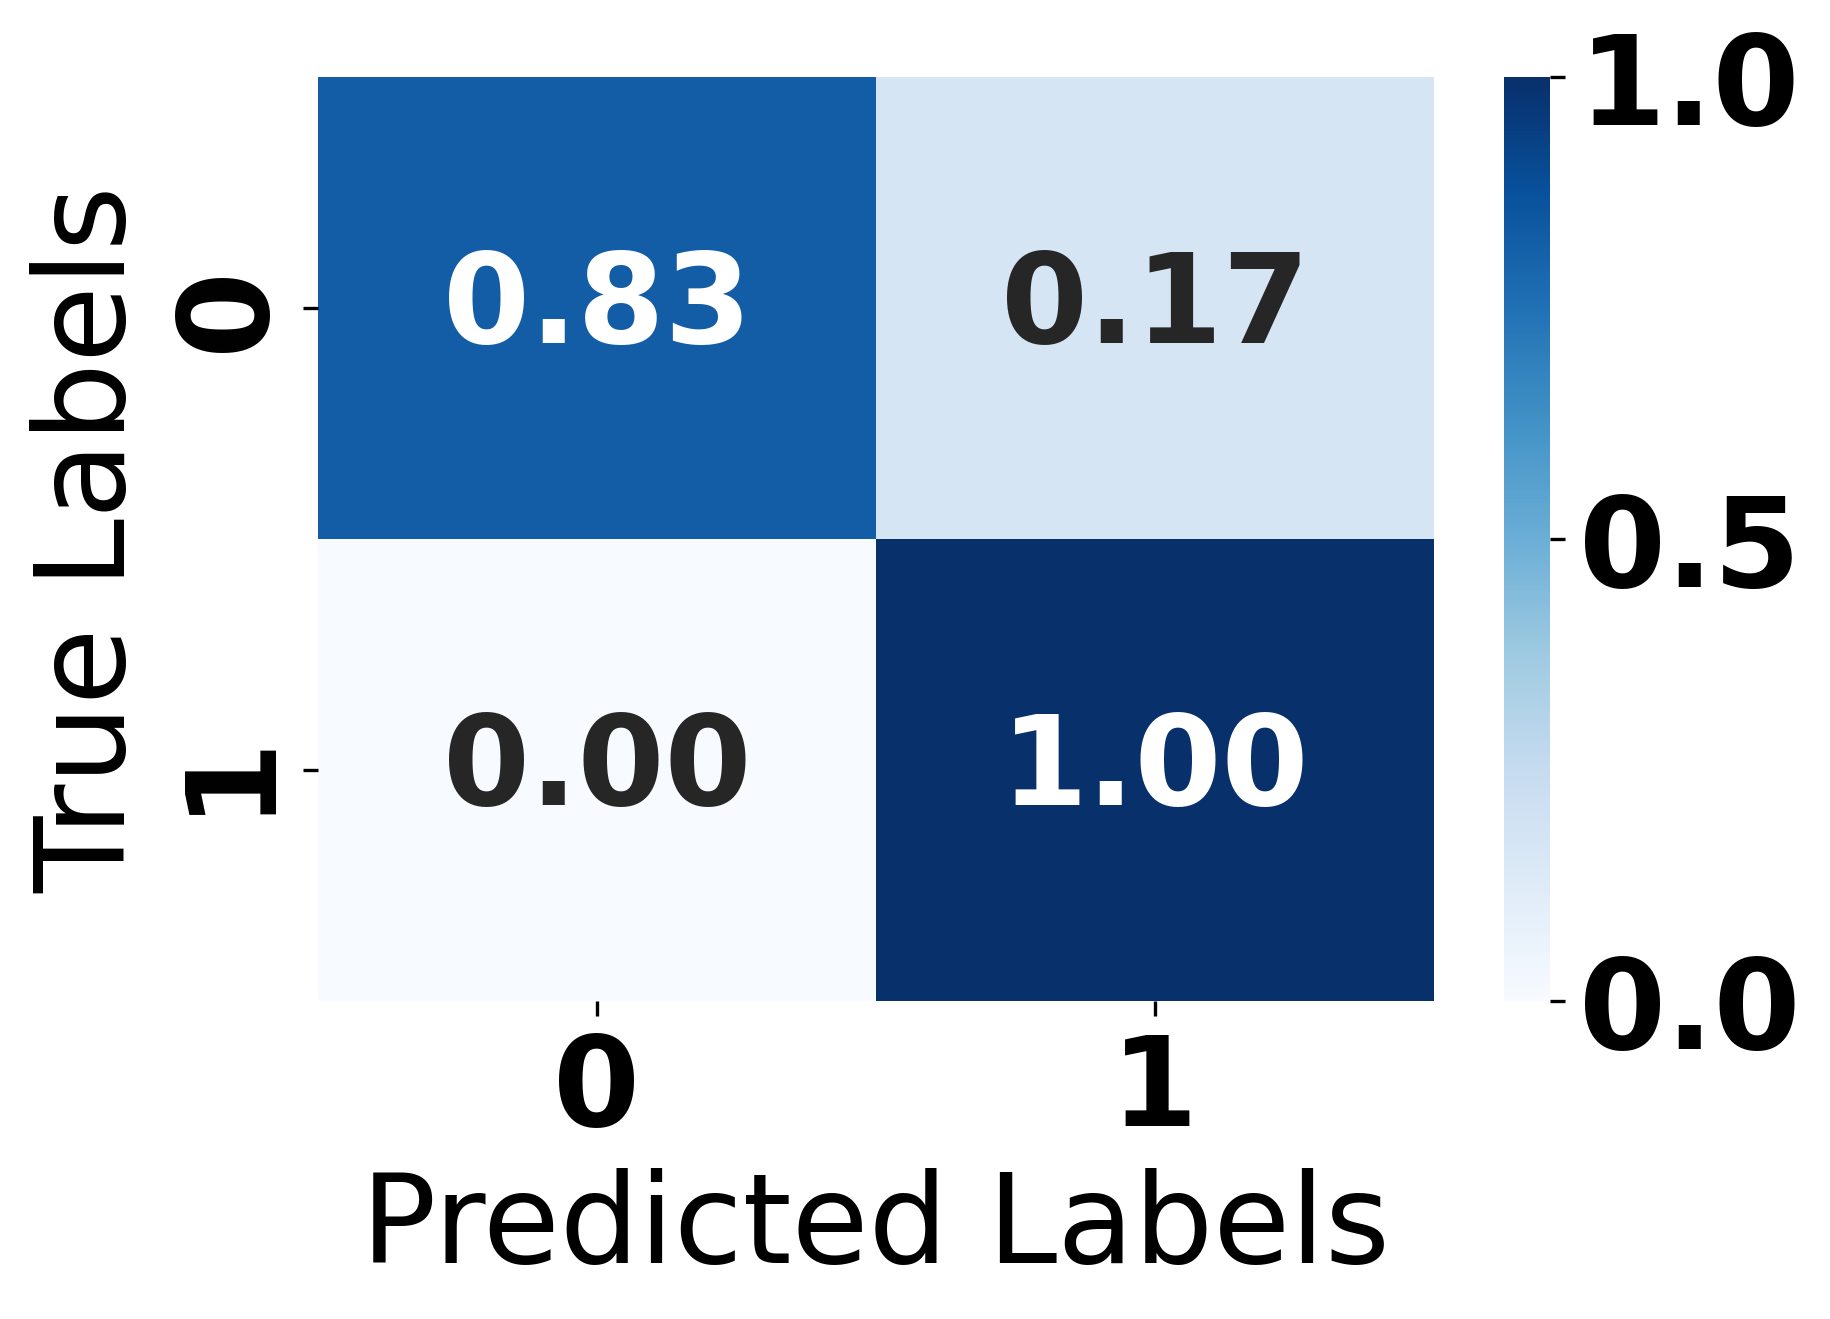

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/TVAE/Model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=96, training_loss=0.6007694617120668, metrics={'train_runtime': 544.3765, 'train_samples_per_second': 0.705, 'train_steps_per_second': 0.176, 'total_flos': 0.0, 'train_loss': 0.6007694617120668, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.7188    1.0000    0.8364        23
           1     0.0000    0.0000    0.0000         9

    accuracy                         0.7188        32
   macro avg     0.3594    0.5000    0.4182        32
weighted avg     0.5166    0.7188    0.6011        32

Confusion Matrix:
 [[23  0]
 [ 9  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Gaussian Copula (via SDV's CopulaGAN)

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Install latest SDV
!pip install -U sdv

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from collections import Counter

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from collections import Counter
import pandas as pd

# Define categorical feature indices for CKD dataset
categorical_features = [3, 4, 5, 6, 7, 8, 9, 19, 20, 21, 22, 23, 24]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Ensure categorical indices are valid
valid_cat_indices = [i for i in categorical_features if i < x_train.shape[1]]

# Add target column
x_train['target'] = y_train

# Print original class distribution
print("Before GaussianCopula:", Counter(y_train))

# Filter minority class (class 1)
minority_df = x_train[x_train['target'] == 1]

# Calculate how many synthetic samples are needed
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Detect metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=minority_df)

# Update metadata with categorical columns
for col in x_train.columns[valid_cat_indices]:
    metadata.update_column(column_name=col, sdtype='categorical')
metadata.update_column(column_name='target', sdtype='categorical')

# Initialize synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(minority_df)

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=samples_to_generate)

# Filter only class 1 (in case other classes were generated)
synthetic_data = synthetic_data[synthetic_data['target'] == 1]

# Split synthetic features and labels
synthetic_x_train = synthetic_data.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_data['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Print final class distribution
print("After GaussianCopula:", Counter(y_resampled_df))

Before GaussianCopula: Counter({np.int64(0): 92, np.int64(1): 34})


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


After GaussianCopula: Counter({1: 292, 0: 92})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
55.0    21
60.0    21
57.0    20
59.0    19
48.0    15
        ..
28.0     1
12.0     1
77.0     1
78.0     1
82.0     1
Name: count, Length: 62, dtype: int64

Counts for bp:
bp
80.0     51
70.0     51
60.0     35
90.0     18
72.0     17
73.0     16
92.0     11
74.0     11
71.0     10
75.0     10
81.0     10
89.0      9
100.0     8
79.0      8
84.0      8
99.0      7
83.0      7
96.0      7
76.0      7
86.0      6
106.0     6
77.0      6
102.0     5
85.0      5
103.0     5
78.0      5
91.0      5
104.0     4
95.0      4
82.0      4
88.0      3
94.0      3
105.0     3
93.0      3
97.0      3
98.0      3
110.0     2
87.0      2
107.0     2
101.0     2
108.0     2
Name: count, dtype: int64

Counts for sg:
sg
1.010    81
1.025    58
1.020    54
1.011    49
1.012    23
1.015    21
1.013    20
1.014    15
1.019    15
1.017    10
1.016     8
1.018     8
1.022     7
1.023     6
1.024     5
1.021     3
1.005     1
Name: count, dtype: int64

Counts for al:
al
3.0    116
0.0  

## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

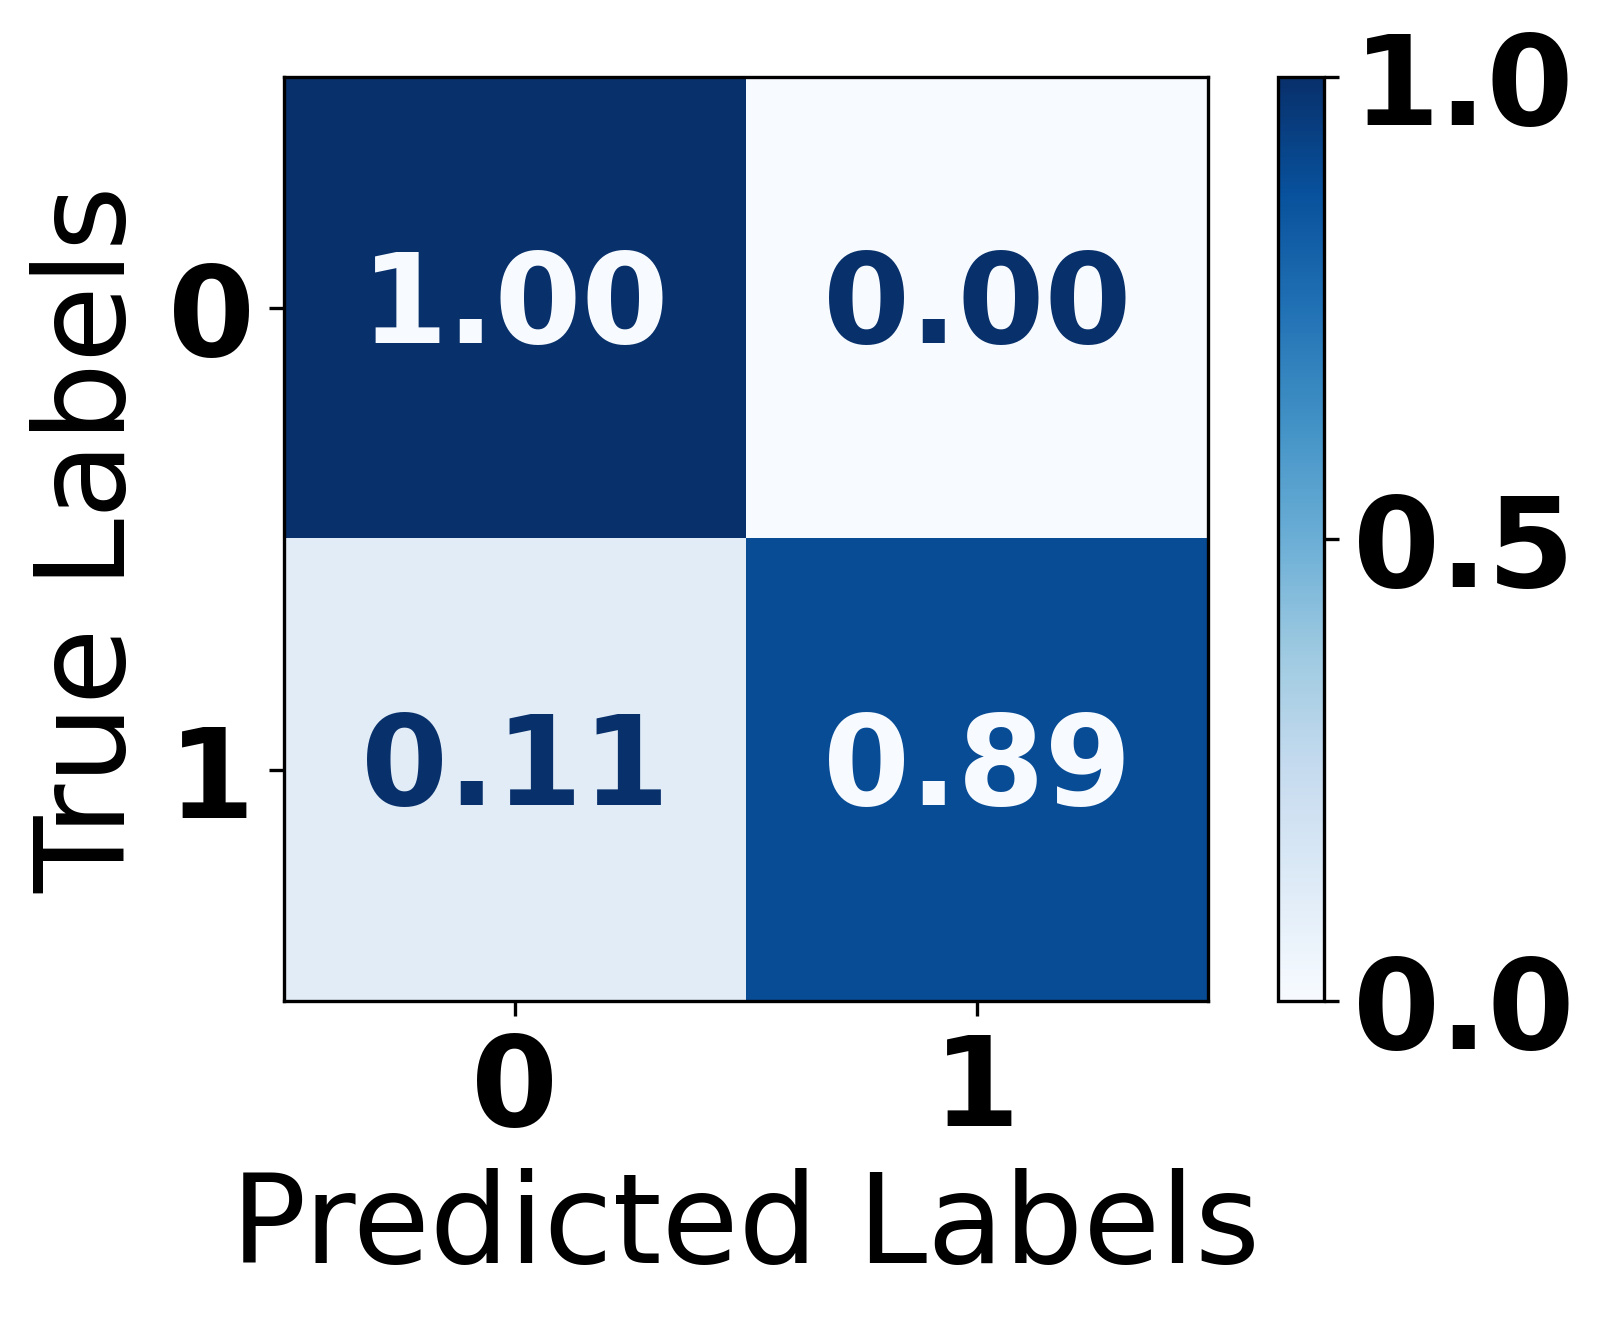

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


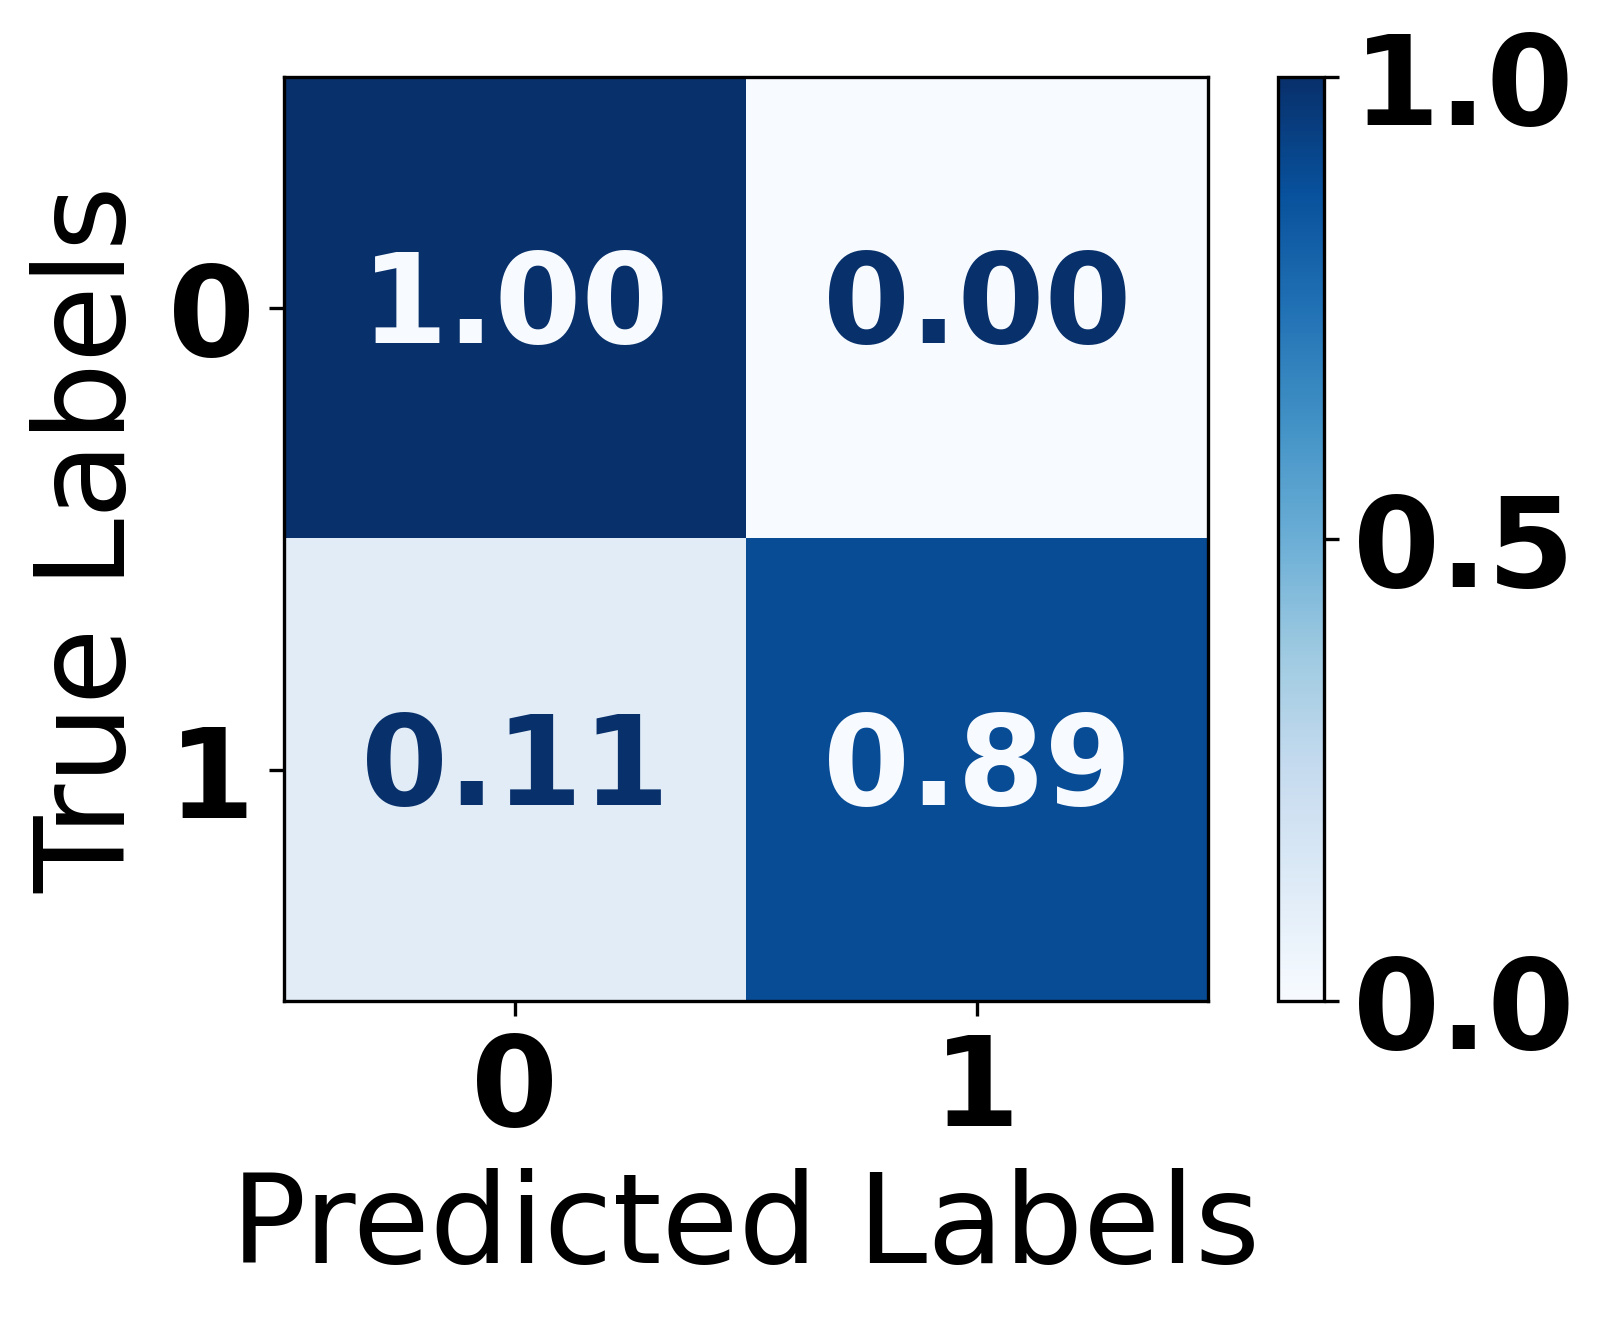

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        23
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 0.9973958333333334
Test Accuracy: 0.96875


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=1, random_state=25)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


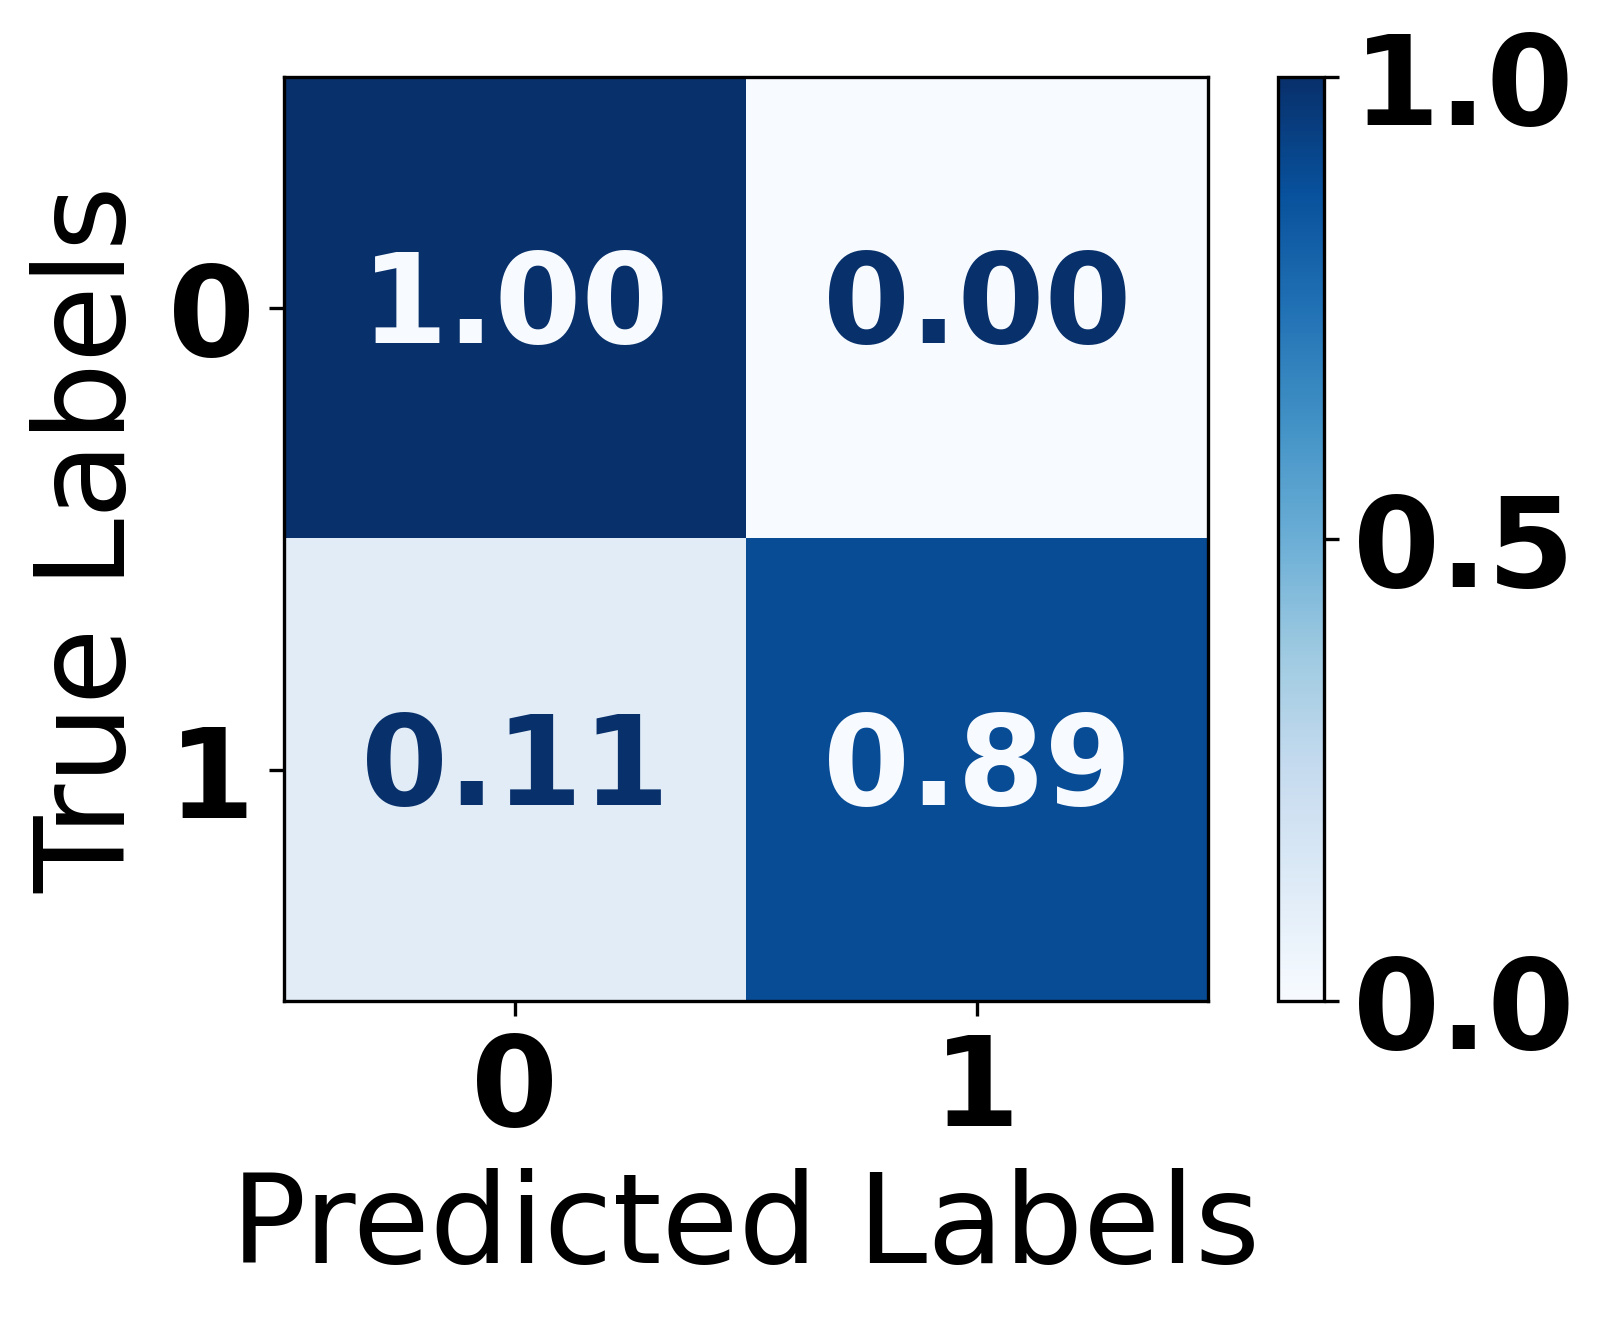

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 0.9973958333333334
Test Accuracy: 0.96875


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=1,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=2, # Require lots of samples to split
    min_samples_leaf=5,  # Each leaf must have many samples
    random_state=5
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


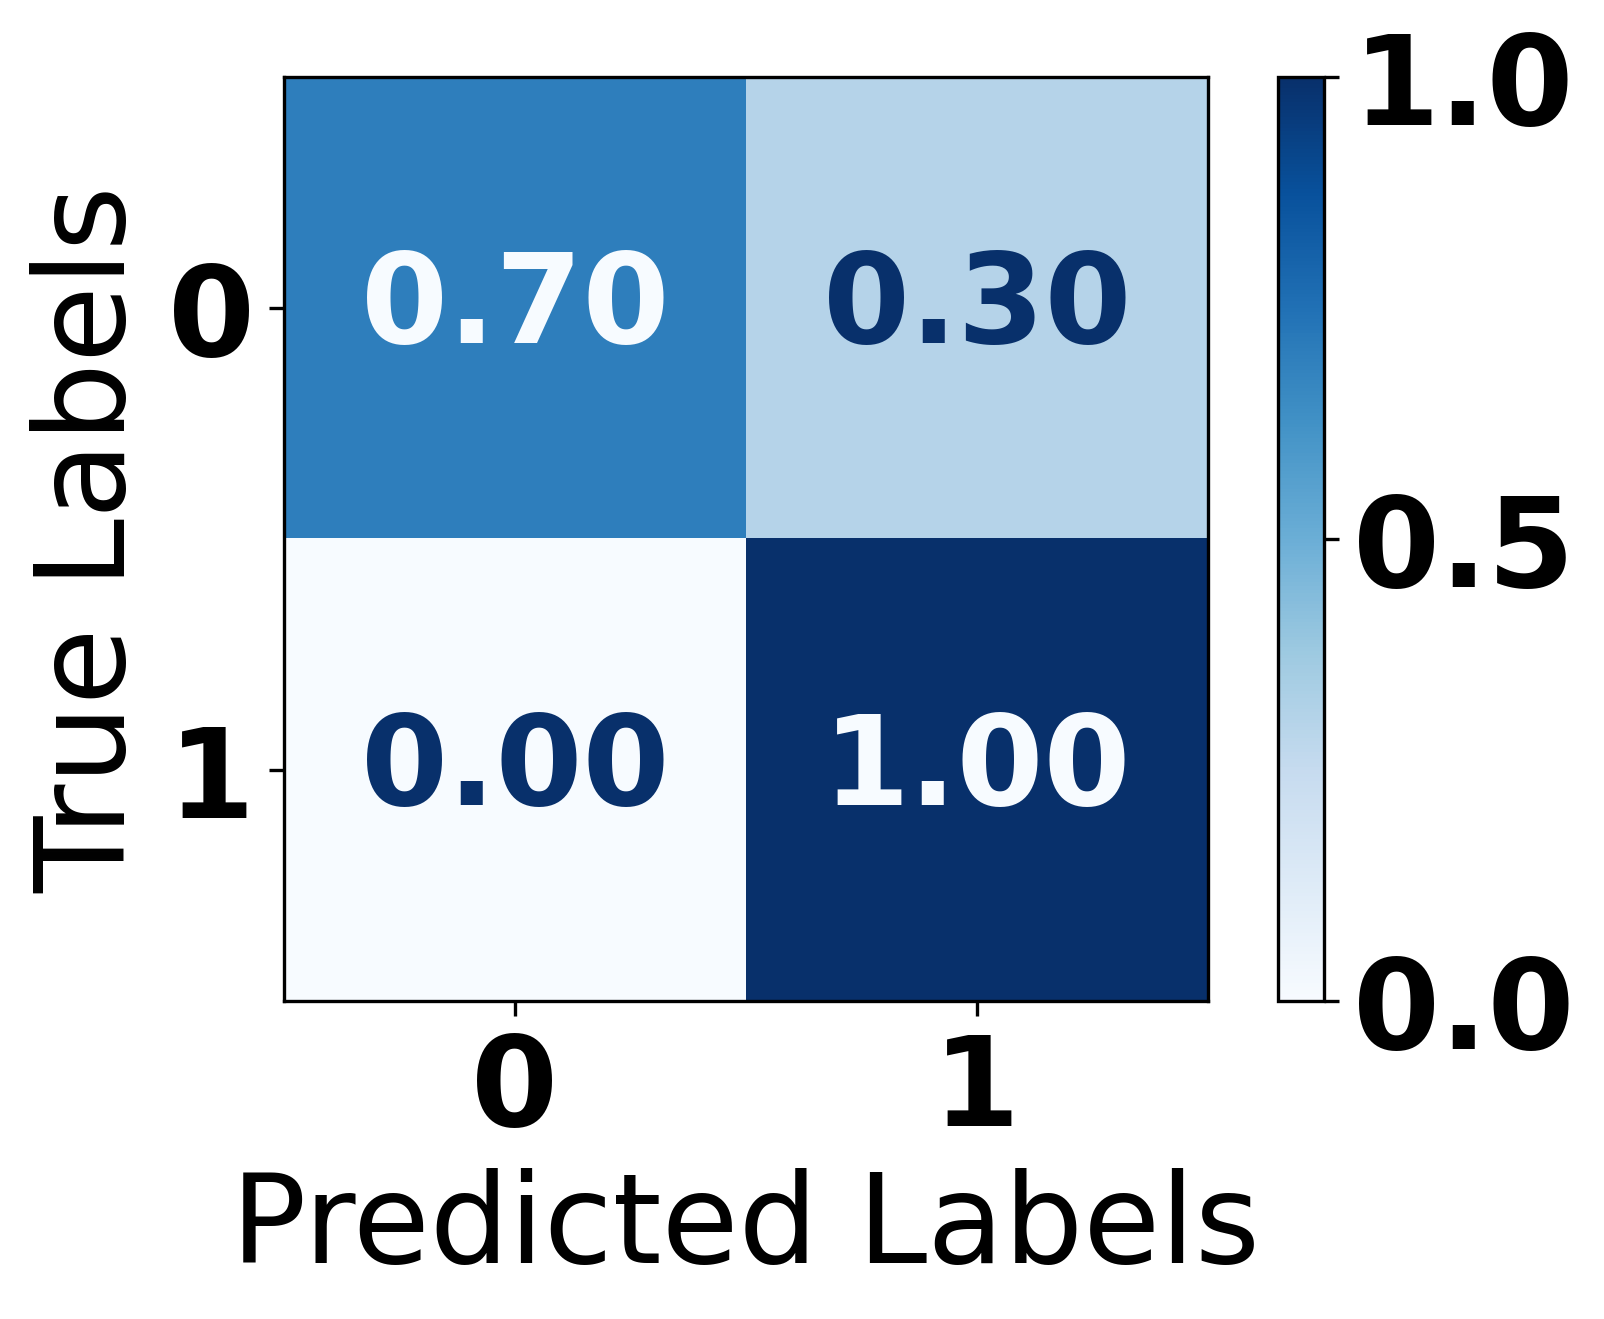

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        23
           1       0.56      1.00      0.72         9

    accuracy                           0.78        32
   macro avg       0.78      0.85      0.77        32
weighted avg       0.88      0.78      0.79        32

Train Accuracy: 0.84375
Test Accuracy: 0.78125


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.001)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


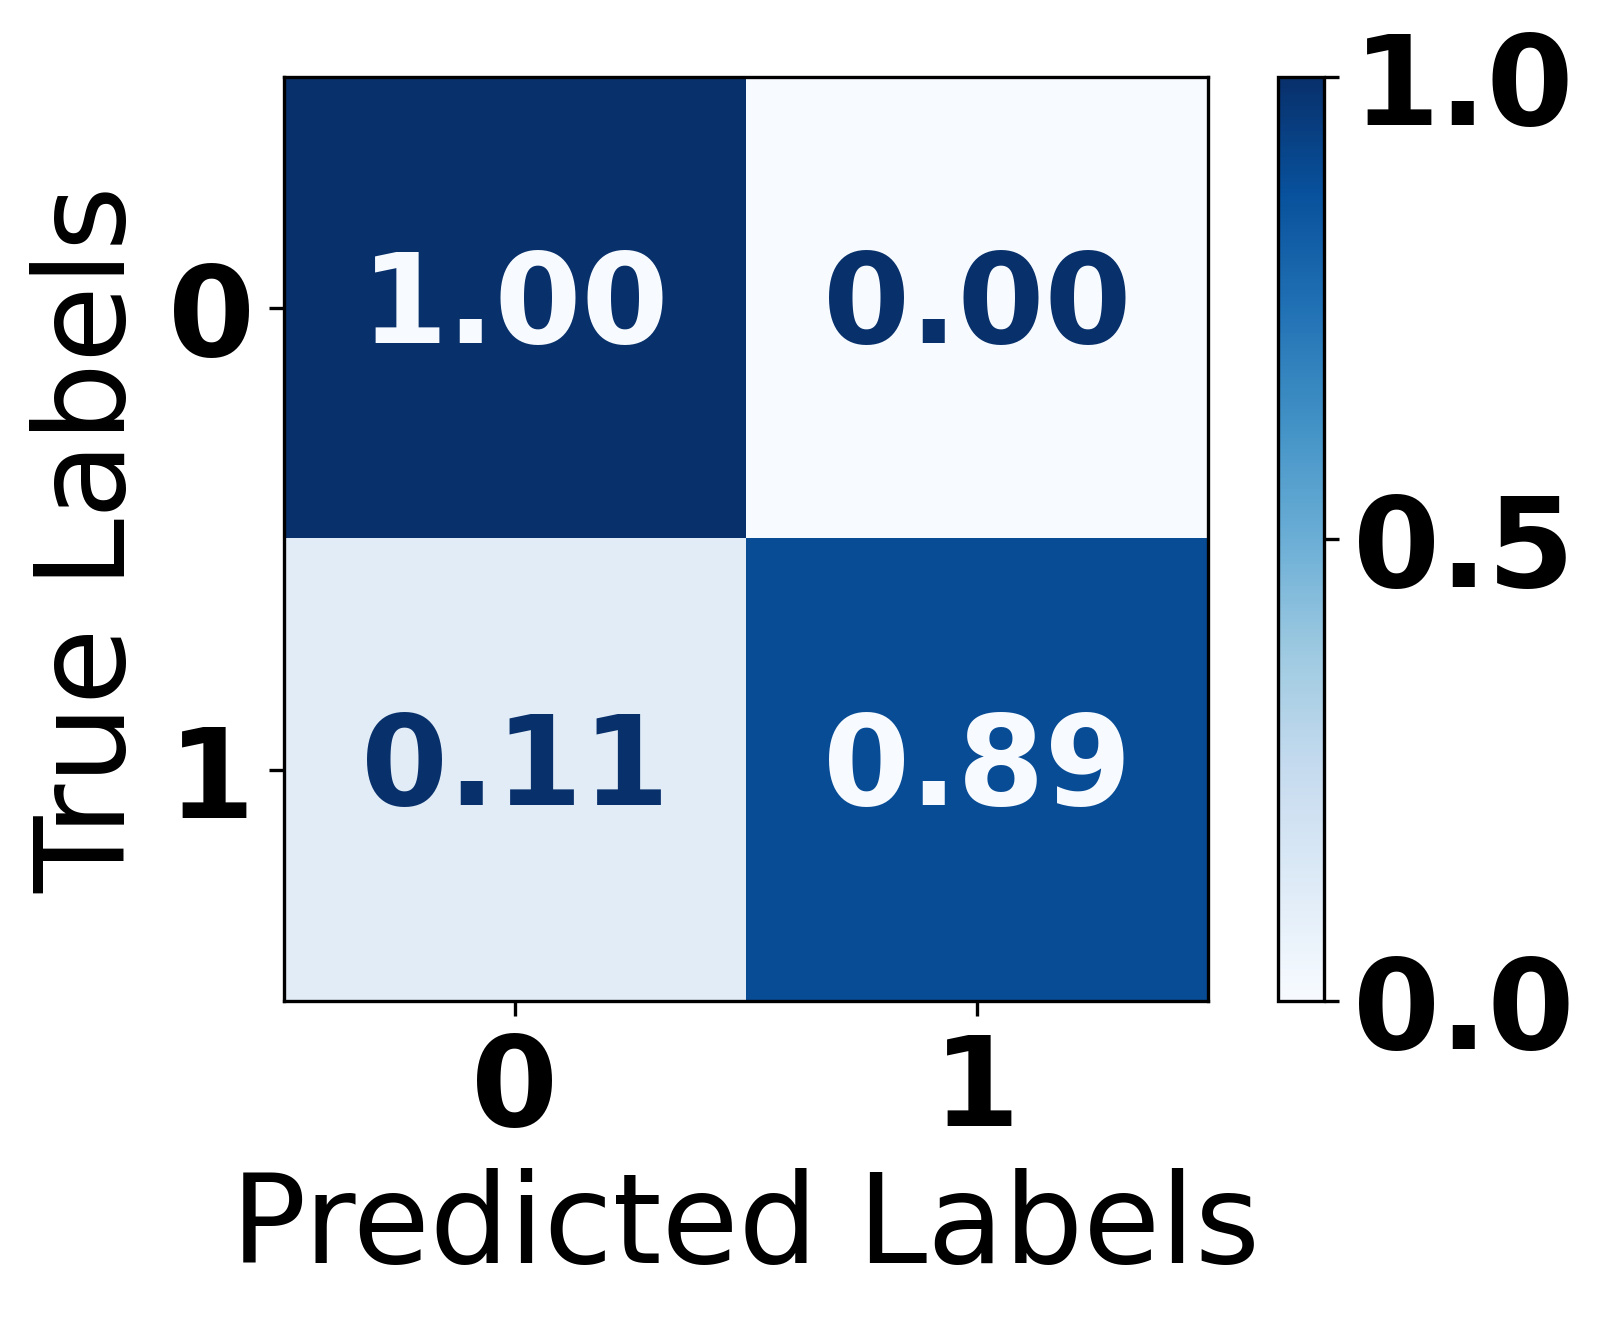

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

Train Accuracy: 1.0
Test Accuracy: 0.96875


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=2, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.13043478 0.86956522]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.13      0.23        23
     Class 1       0.31      1.00      0.47         9

    accuracy                           0.38        32
   macro avg       0.66      0.57      0.35        32
weighted avg       0.81      0.38      0.30        32



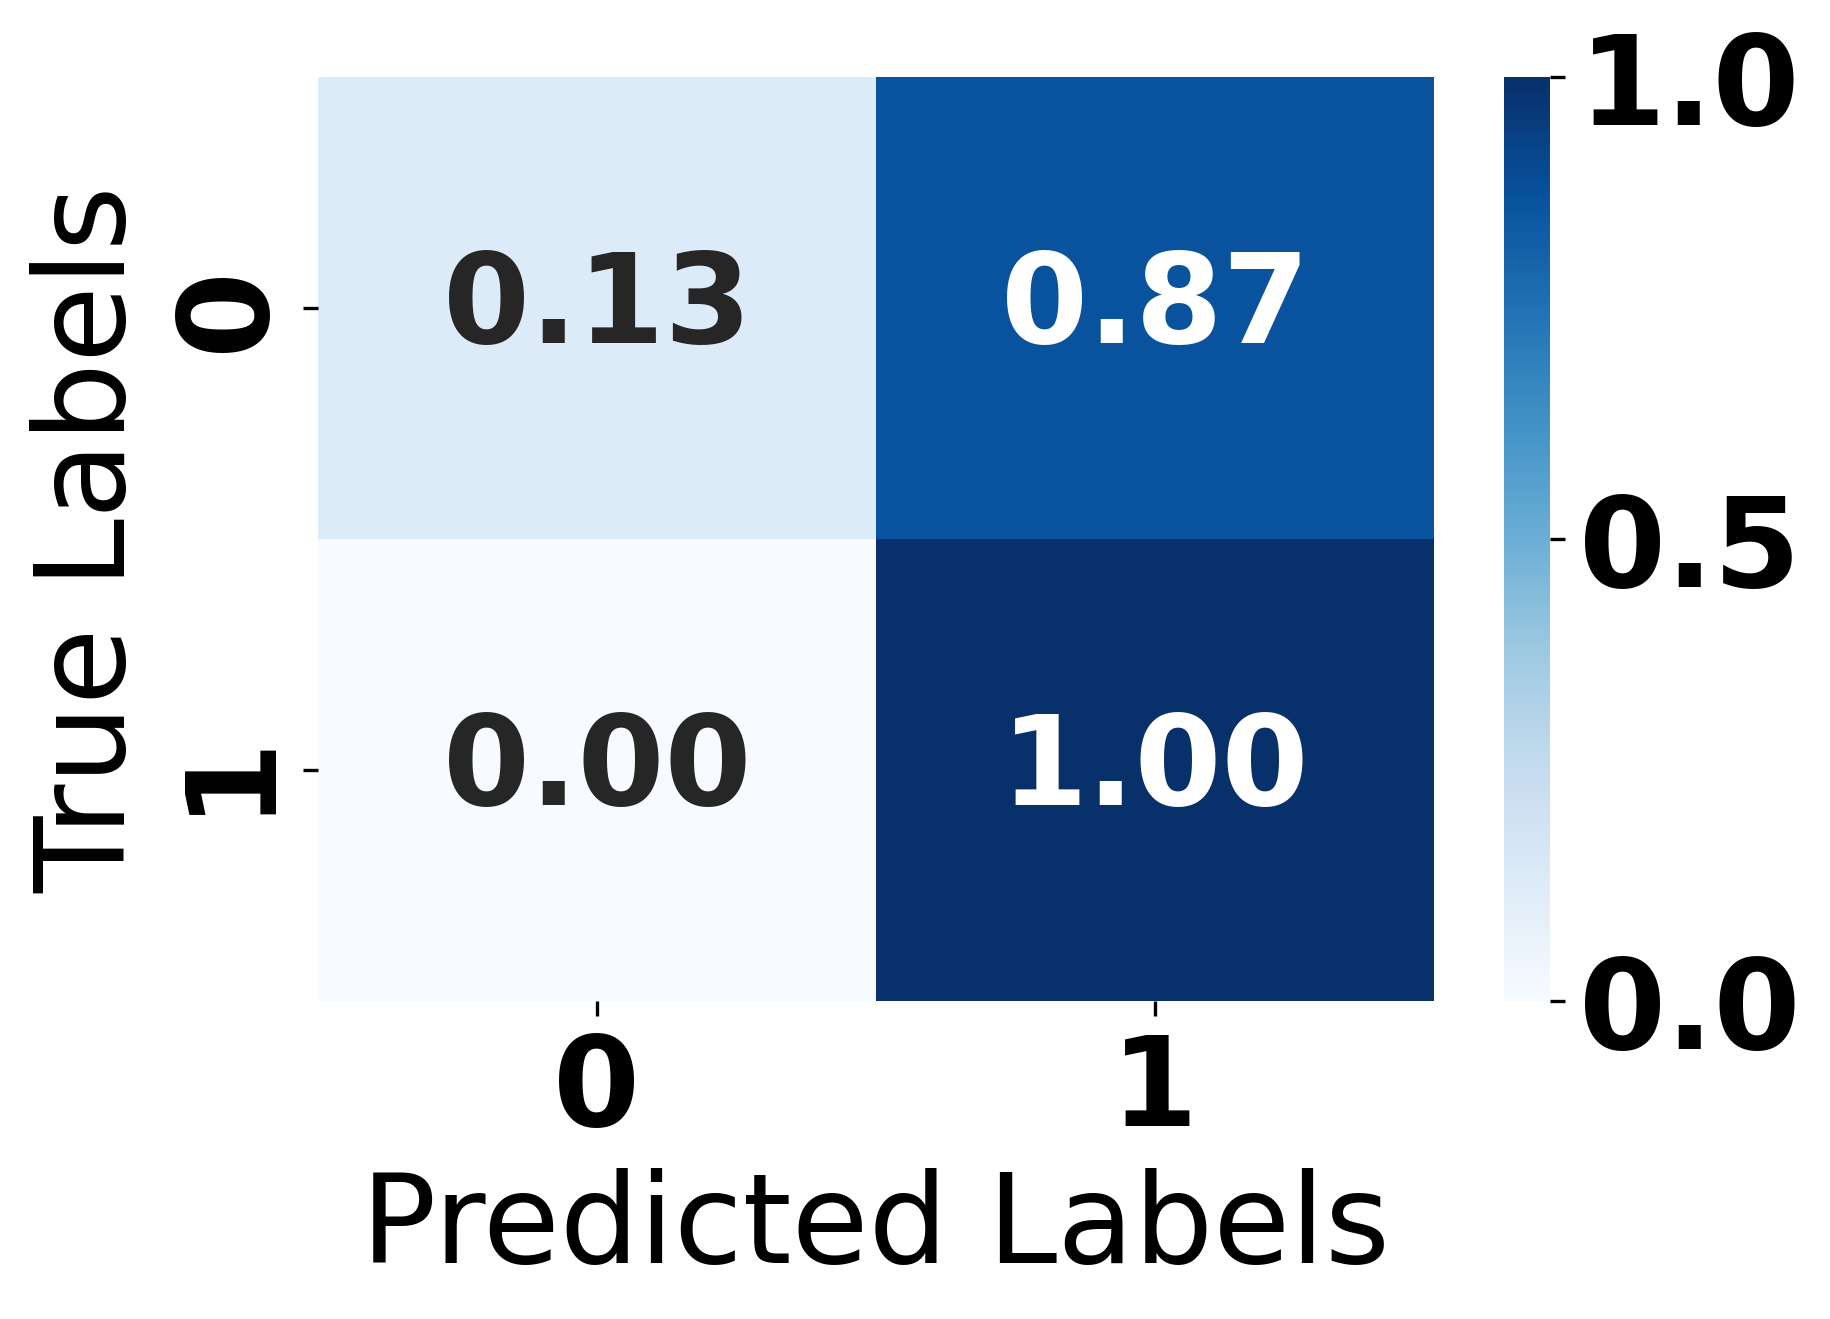

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.6188 - loss: 91.8310 - val_accuracy: 0.2812 - val_loss: 217.2759
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7601 - loss: 73.4410 - val_accuracy: 0.2812 - val_loss: 116.7687
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6689 - loss: 38.3163 - val_accuracy: 0.7188 - val_loss: 14.8077
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4723 - loss: 27.3275 - val_accuracy: 0.2812 - val_loss: 137.5281
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7601 - loss: 47.9915 - val_accuracy: 0.2812 - val_loss: 113.7329
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7601 - loss: 31.5038 - val_accuracy: 0.7188 - val_loss: 7.4702
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.4785 - loss: 9.3289 - val_accuracy: 0.2812 - val_loss: 47.6258
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7601 - loss: 16.6744 - val_accuracy: 0.2812

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        23
     Class 1       0.28      1.00      0.44         9

    accuracy                           0.28        32
   macro avg       0.14      0.50      0.22        32
weighted avg       0.08      0.28      0.12        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


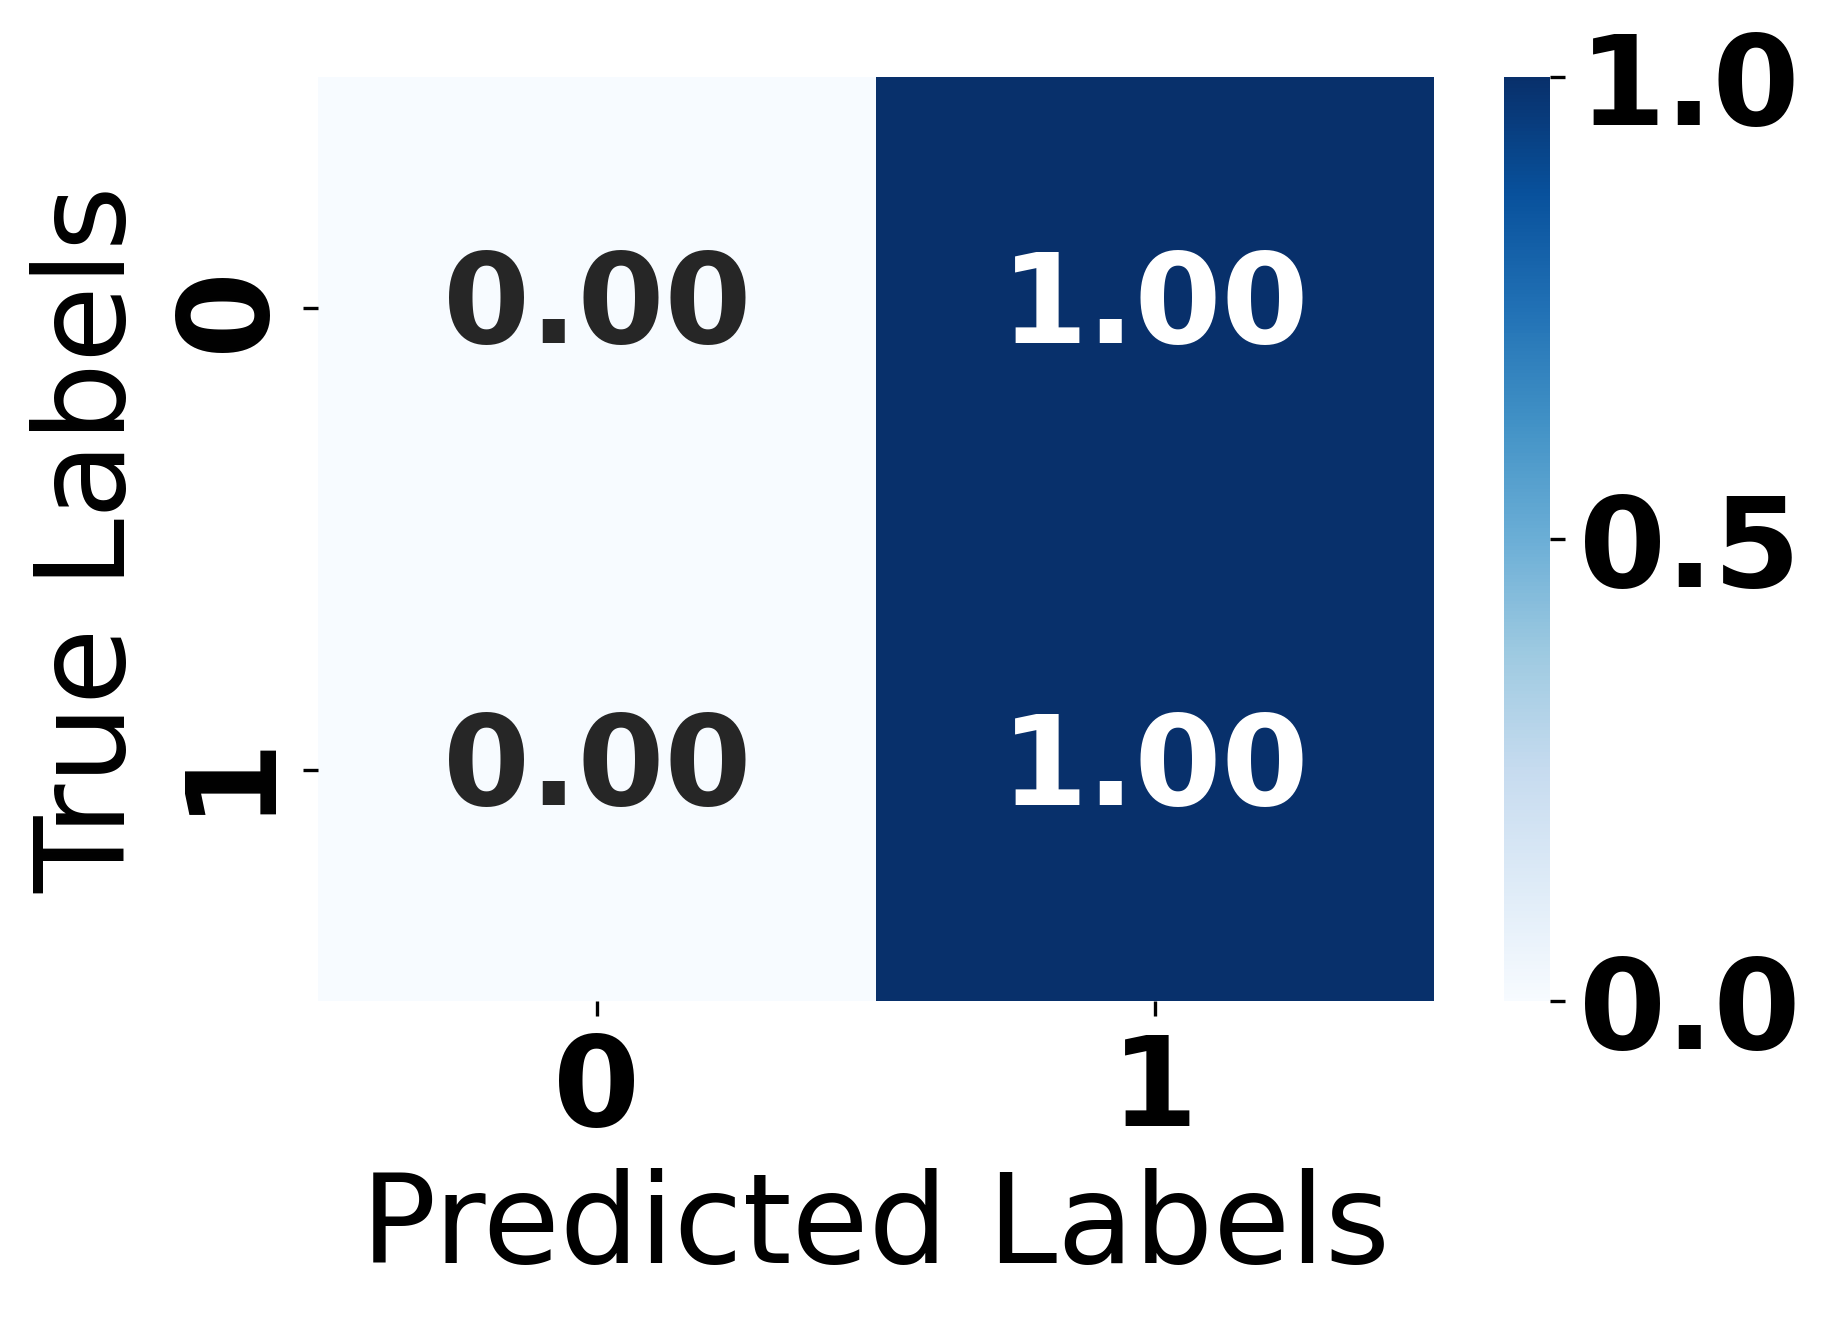

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.5303 - loss: 0.8934 - val_accuracy: 0.2812 - val_loss: 7.1972
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.5348 - loss: 0.7844 - val_accuracy: 0.2812 - val_loss: 6.1041
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6234 - loss: 0.7348 - val_accuracy: 0.2812 - val_loss: 5.2102
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6048 - loss: 0.6857 - val_accuracy: 0.2812 - val_loss: 4.8555
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6475 - loss: 0.6186 - val_accuracy: 0.2812 - val_loss: 3.9064
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7087 - loss: 0.5850 - val_accuracy: 0.2812 - val_loss: 3.4270
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7243 - loss: 0.5233 - val_accuracy: 0.2812 - val_loss: 3.1081
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7422 - loss: 0.5160 - val_accuracy: 0.2812 - val_loss: 2.72

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        23
     Class 1       0.28      1.00      0.44         9

    accuracy                           0.28        32
   macro avg       0.14      0.50      0.22        32
weighted avg       0.08      0.28      0.12        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


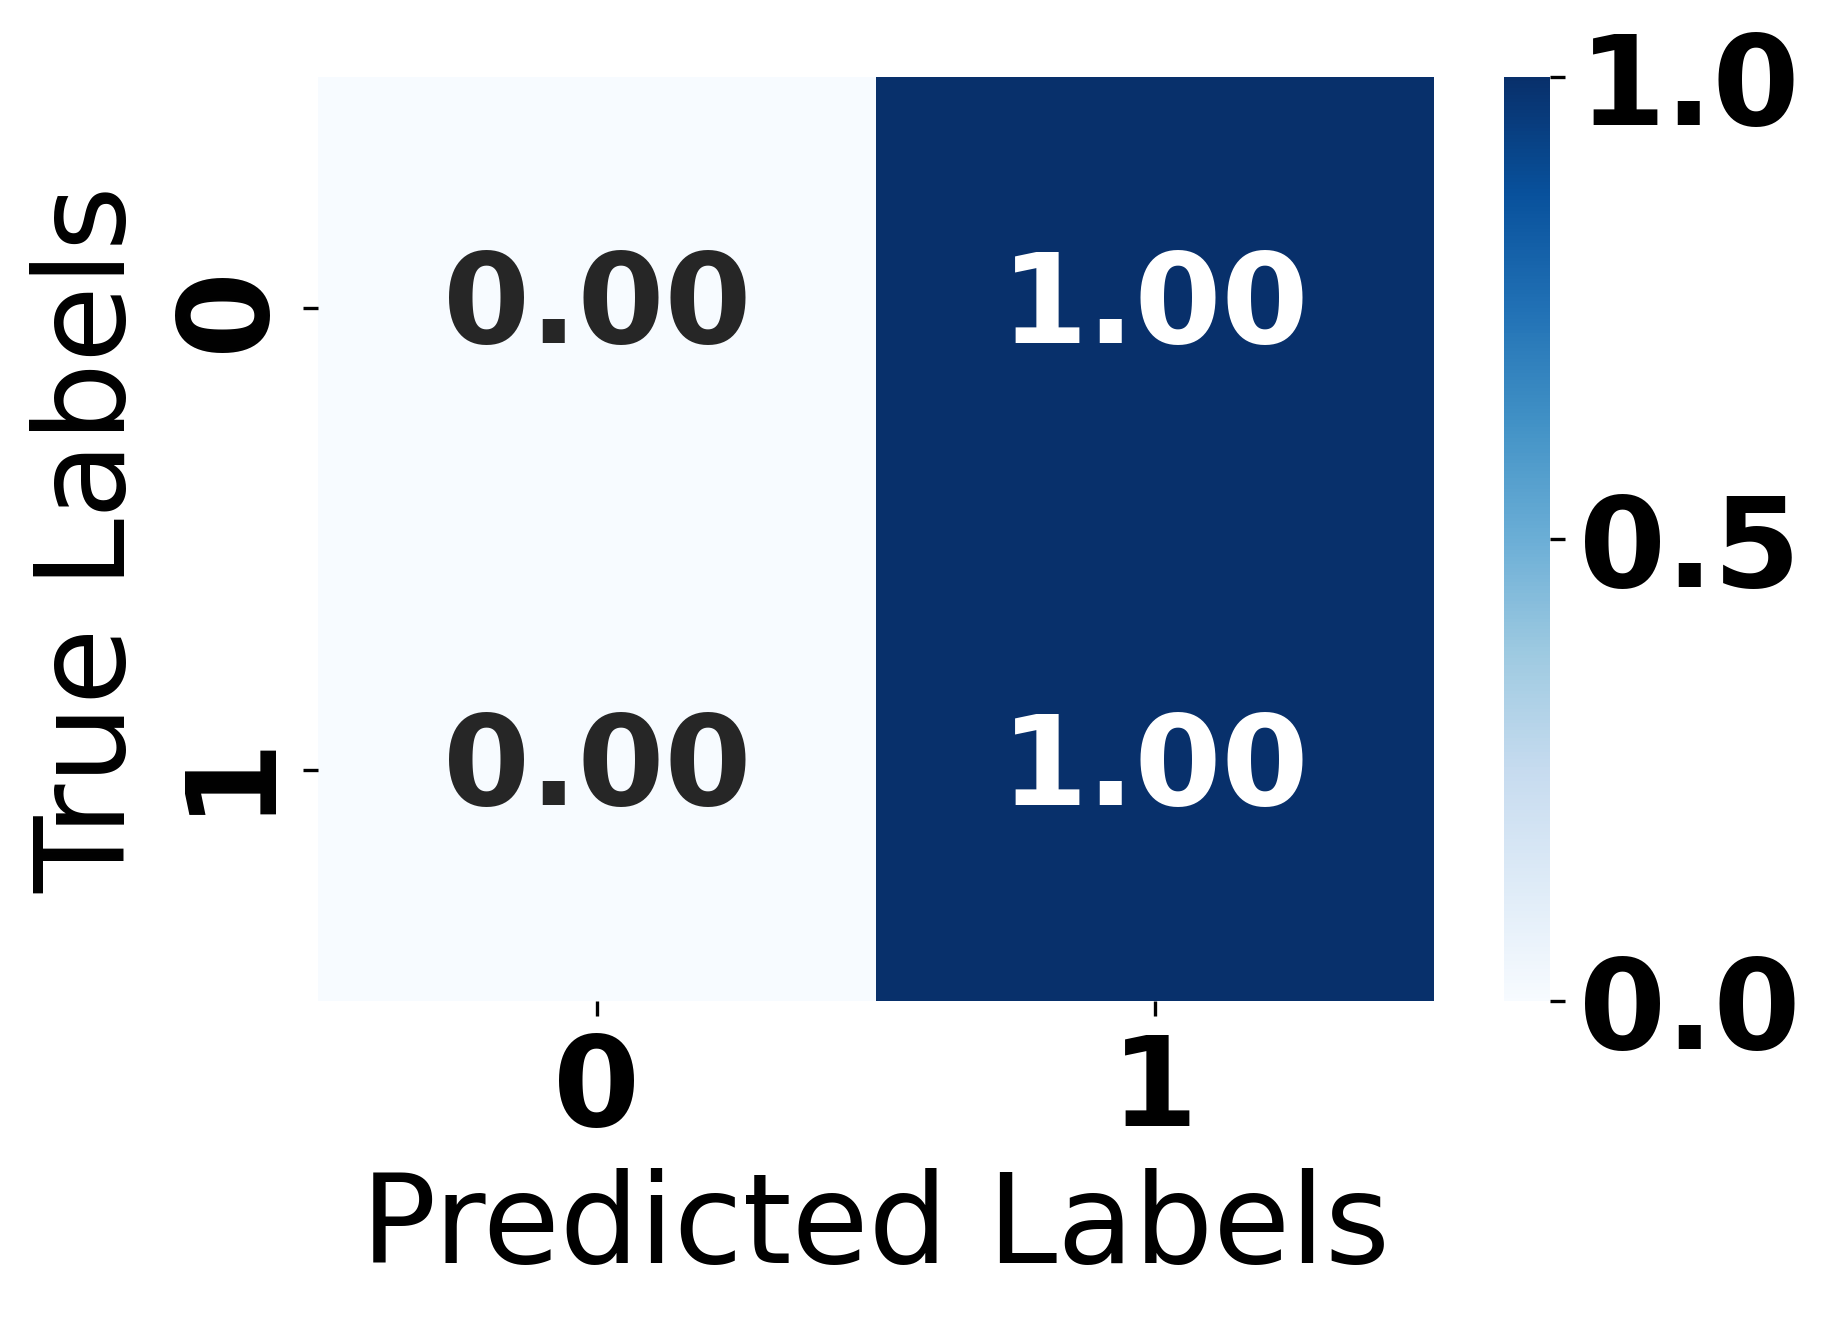

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/ANN.h5')

In [ ]:
import numpy as np
import time
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Automatically determine the vocab size from your data (ensure it's an integer)
vocab_size = int(max(np.max(x_train), np.max(x_test)) + 1)

# Optional: Clip values to enforce a max vocab size
# vocab_size = 20000
# x_train = np.where(x_train >= vocab_size, vocab_size - 1, x_train)
# x_test = np.where(x_test >= vocab_size, vocab_size - 1, x_test)

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Example: (100,)

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer (without deprecated input_length)
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim)(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Model configuration
embed_dim = 128
ff_dim = 128

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
end_time = time.time()
print("Training Time:", end_time - start_time)

# Evaluate the model
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
end_time = time.time()
print("Test Time:", end_time - start_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3132 - loss: 0.7628 - val_accuracy: 0.6250 - val_loss: 0.6783
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.5768 - loss: 0.6780 - val_accuracy: 0.2812 - val_loss: 0.7505
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - accuracy: 0.7305 - loss: 0.6367 - val_accuracy: 0.2812 - val_loss: 0.8041
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step - accuracy: 0.7546 - loss: 0.6091 - val_accuracy: 0.2812 - val_loss: 0.8433
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.7585 - loss: 0.5823 - val_accuracy: 0.2812 - val_loss: 0.8616
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - accuracy: 0.7731 - loss: 0.5662 - val_accuracy: 0.2812 - val_loss: 0.8631
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.7969 - loss: 0.5414 - val_accuracy: 0.2812 - val_loss: 0.8618
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.7829 - loss: 0.5373 - val_accuracy: 0.2812 - val_loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
Normalized Confusion Matrix:
[[0.60869565 0.39130435]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.61      0.76        23
     Class 1       0.50      1.00      0.67         9

    accuracy                           0.72        32
   macro avg       0.75      0.80      0.71        32
weighted avg       0.86      0.72      0.73        32



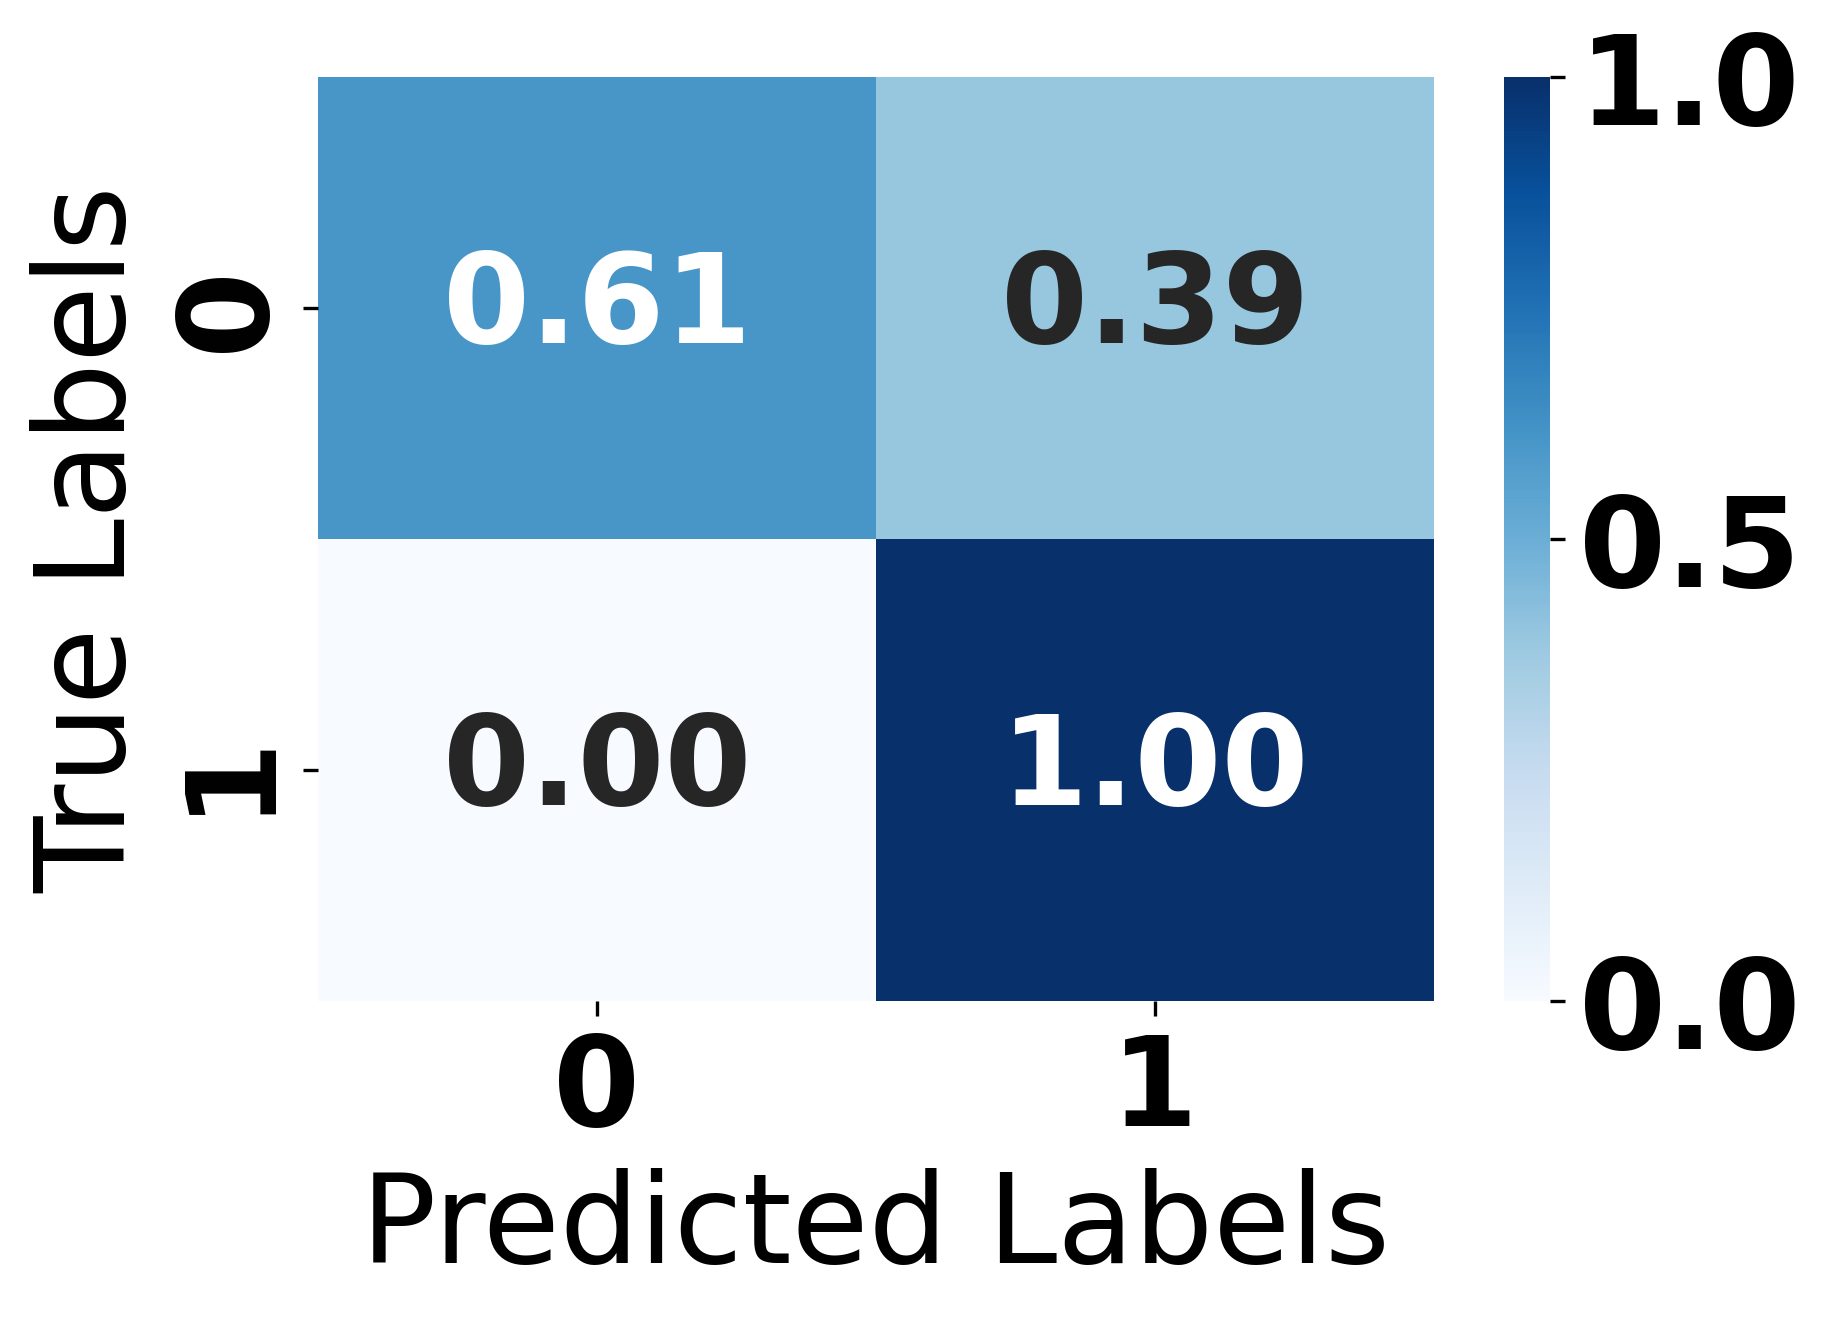

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/KidneyGPT/Table/Model/GC/Model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=96, training_loss=0.7106636385433376, metrics={'train_runtime': 366.2238, 'train_samples_per_second': 1.049, 'train_steps_per_second': 0.262, 'total_flos': 0.0, 'train_loss': 0.7106636385433376, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        23
           1     0.2812    1.0000    0.4390         9

    accuracy                         0.2812        32
   macro avg     0.1406    0.5000    0.2195        32
weighted avg     0.0791    0.2812    0.1235        32

Confusion Matrix:
 [[ 0 23]
 [ 0  9]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
